# Homework #3

## Introduction to deep learning

This colaboratory contains Homework #3 which is due **October 19 midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

## Submission's rules:

1.  Please, submit only .ipynb that you extract from the Colaboratory.
2.  Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3.  Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4.  Please, make sure to avoid unnecessary long printouts.
5.  Each task should be solved right under the question of the task and not elsewhere.
6.  Solutions to both regular and bonus exercises should be submitted in one IPYNB file.


##List of Homework's exercises:

1.  [Ex1](#scrollTo=4YtaQwccjrAL) - 4 points
2.  [Ex2](#scrollTo=tOfgGIUtIizt) - 4 points
3.  [Ex3](#scrollTo=rt6Fuo28nQkd) - 2 points
4.  [Bonus 1](#scrollTo=wT-4aQqUtDU7) - 2 points
5.  [Bonus 2](#scrollTo=lEW4oyQhnRQA) - 2 points


In [11]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

Here we will define few functions that will help us visualise classifiers that we are going to build in this class. Don't worry if you don't understand this code completely.


In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

# for very shallow models
def plot_classifier(X, y, W, b):
  st = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, st),
                       np.arange(y_min, y_max, st))
  Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# for two-layer network
def plot_neural_network(X, y, W,b ,W2, b2):
  st = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, st),
                       np.arange(y_min, y_max, st))
  Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
N = 100 # number of points per class
D = 2 # number of features (dimensions)
K = 2 # number of classes (purple and red circles)
X = np.zeros((N*K,D)) # data matrix (each row = single example)
num_examples = X.shape[0]
y = np.zeros((N*K, 1), dtype='int') # class labels

In [ ]:
# Creating spiral data points
np.random.seed(1111)

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix, 0] = j

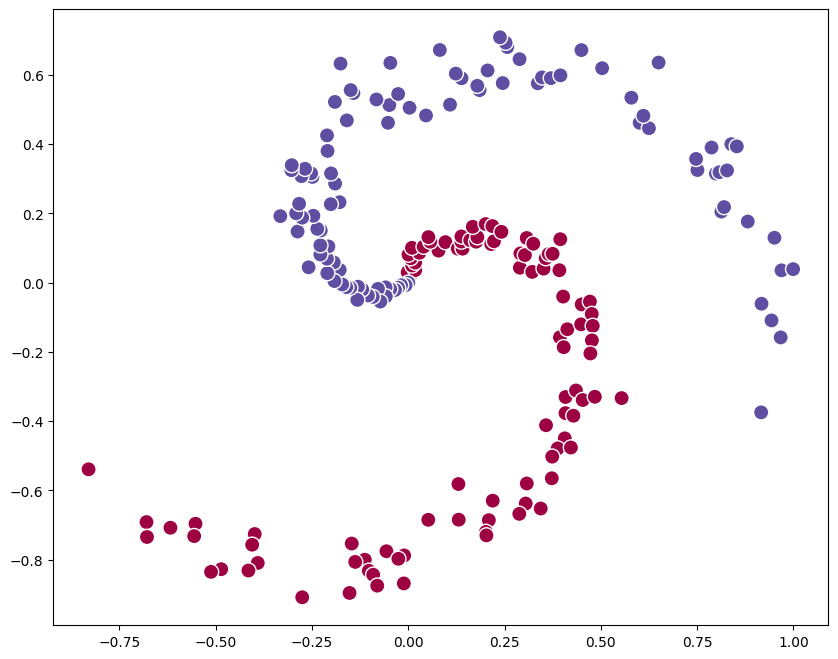

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
plt.show()

For our implementation we would need to transform the vector of correct labels `y` into one hot encoded matrix, let's call it `truth`. Сreating `truth` as one-hot encoded labels (`y`)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
truth = enc.fit_transform(y).toarray()

# first column is for red
# second is for purple class

## Homework exercise 1 (4 points): three-layer network

<font color=''>In the class we have obtained ~94% using 2-layer neural network when classifying points in spiral. This is surely not good enough for us. Hence, let's make a few tweaks in attempt to reach higher performance.</font>

<font color=''>**PS: Before you start working on this task, please read it in its entirety!**</font>

<font color=''> **(a)** Based on the code we have written in the practice session, build a new 3-layer neural network, consiting two hidden layers (each of size `h`) and one output layer. Using ChatGPT/Gemini will likely result in architectures which are substantially different from what we intended, so try to follow the code provided in the practice session. Use `tanh` as an activation function for the hidden layers. Compute both feedforward and backpropagation paths to update the model weights and produce predictions (you might want to check out some parts of [this post](https://medium.com/ai-enthusiast/mastering-tanh-a-deep-dive-into-balanced-activation-for-machine-learning-4734ec147dd9) about tanh). Answer a question at the end of this subtask. We have provided you with some tests so you can check if the first iteration of your forward and backward passes are correct. If all the tests pass, then your forward and backward pass should be correct. If you can't make the tests pass but want to still try to solve this exericse partially, you can disable the tests. **(2 points)**. </font>


In [ ]:
# 2 hidden layers should be size h
# 1 output layer

# tanh activation layer


# feedforward and backprop


In [ ]:
# test for the forward and backward pass of the first iteration

def test_feedforward(a1, h1, a2, h2, predictions):
  assert h1.shape == (200, 100), f"h1 shape should be (200, 100) but is {h1.shape}"
  assert a1.shape == (200, 100), f"a1 shape should be (200, 100) but is {a1.shape}"
  assert h2.shape == (200, 100), f"h2 shape should be (200, 100) but is {h2.shape}"
  assert a2.shape == (200, 100), f"a2 shape should be (200, 100) but is {a2.shape}"
  assert np.allclose(predictions[10,:], np.array([9.62744925, 0.5575694]), rtol=1e-4, atol=1e-7), f"The 11th row (id=10) of predictions should be {str([9.62744925, 0.5575694])} but is {str(predictions[10,:])}"


def test_loss(total_error):
  assert np.allclose(total_error, 6.816154e+01, rtol=1e-7, atol=1e-12), f"The loss should be 6.816154e+01 but is {str(total_error)}"


def test_backprop_3rd_layer(dTEdP, dW3, db3):
  assert dTEdP.shape == (200, 2), f"dTEdP shape should be (200, 2) but is {dTEdP.shape}"
  assert np.allclose(dTEdP[0,:], np.array([-0.005, 0.]), rtol=1e-4, atol=1e-7), f"The first row of dTEdP should be {str([-0.005, 0.])} but is {str(dTEdP[0,:])}"
  assert dW3.shape == (100, 2),   f"dW3 shape should be (100, 2) but is {dW3.shape}"
  assert np.allclose(dW3[0, :], [ 0.18874718, -0.55784110], rtol=1e-4, atol=1e-7), f"The first row of dW3 should be {[0.18874718, -0.55784110]} but is {dW3[0,:].tolist()}"
  assert db3.shape == (1, 2),     f"db3 shape should be (1, 2) but is {db3.shape}"
  assert np.allclose(db3[0, :], [ 2.03324054, -0.10500199], rtol=1e-4, atol=1e-7), f"The first row of db3 should be {[2.03324054, -0.10500199]} but is {db3[0,:].tolist()}"


def test_backprop_2nd_layer(dh2, da2, dW2, db2):
  assert da2.shape == (200, 100), f"da2 shape should be (200, 100) but is {da2.shape}"
  assert np.allclose(da2[0, :5], [-8.28588521e-03,  3.50276543e-03,  5.70866744e-03,  1.11401708e-05, -4.48131920e-03], rtol=1e-4, atol=1e-7), \
        f"da2[0,:5] should be {[-8.28588521e-03, 3.50276543e-03, 5.70866744e-03, 1.11401708e-05, -4.48131920e-03]} but is {da2[0,:5].tolist()}"
  assert dh2.shape == (200, 100), f"dh2 shape should be (200, 100) but is {dh2.shape}"
  assert np.allclose(dh2[0, :5], [-8.28588521e-03,  3.50276543e-03,  5.70866744e-03,  1.11401708e-05, -4.48131920e-03], rtol=1e-4, atol=1e-7), \
        f"dh2[0,:5] should be {[-8.28588521e-03, 3.50276543e-03, 5.70866744e-03, 1.11401708e-05, -4.48131920e-03]} but is {dh2[0,:5].tolist()}"
  assert dW2.shape == (100, 100), f"dW2 shape should be (100, 100) but is {dW2.shape}"
  assert np.allclose(dW2[0, :5], [-1.13389278,  0.03434872,  0.34942662,  0.44935038, -1.73964972]), \
        f"dW2[0,:5] should be {[-1.13389278, 0.03434872, 0.34942662, 0.44935038, -1.73964972]} but is {dW2[0,:5].tolist()}"
  assert db2.shape == (1, 100),   f"db2 shape should be (1, 100) but is {db2.shape}"
  assert np.allclose(db2[0, :5], [ 0.92917967,  0.13137224,  0.35206429, -0.06316375,  1.30386627], rtol=1e-4, atol=1e-7), \
        f"db2[0,:5] should be {[0.92917967, 0.13137224, 0.35206429, -0.06316375, 1.30386627]} but is {db2[0,:5].tolist()}"


def test_backprop_1st_layer(dh1, da1, dW, db):
  assert da1.shape == (200, 100), f"da1 shape should be (200, 100) but is {da1.shape}"
  assert np.allclose(da1[0, :5], [-0.02909883,  0.05524172, -0.10686681, -0.01364325, -0.09124885], rtol=1e-4, atol=1e-7), \
        f"da1[0,:5] should be {[-0.02909883, 0.05524172, -0.10686681, -0.01364325, -0.09124885]} but is {da1[0,:5].tolist()}"
  assert dh1.shape == (200, 100), f"dh1 shape should be (200, 100) but is {dh1.shape}"
  assert np.allclose(dh1[0, :5], [-0.02909883,  0.05524172, -0.10686681, -0.01364325, -0.09124885], rtol=1e-4, atol=1e-7), \
        f"dh1[0,:5] should be {[-0.02909883, 0.05524172, -0.10686681, -0.01364325, -0.09124885]} but is {dh1[0,:5].tolist()}"
  assert dW.shape  == (2, 100),   f"dW shape should be (2, 100) but is {dW.shape}"
  assert np.allclose(dW[0, :5],  [-2.54002318, -21.12403813,  8.23254390,  1.28003794, 11.45835577], rtol=1e-4, atol=1e-7), \
        f"dW[0,:5] should be {[-2.54002318, -21.12403813, 8.23254390, 1.28003794, 11.45835577]} but is {dW[0,:5].tolist()}"
  assert db.shape  == (1, 100),   f"db shape should be (1, 100) but is {db.shape}"
  assert np.allclose(db[0, :5],  [-3.46676949, -14.62367207,  4.29046912,  1.73251994,  9.30917603], rtol=1e-4, atol=1e-7), \
        f"db[0,:5] should be {[-3.46676949, -14.62367207, 4.29046912, 1.73251994, 9.30917603]} but is {db[0,:5].tolist()}"


![image.png](attachment:image.png)


In [ ]:

np.random.seed(111) # don't change this, otherwise the tests won't work
num_examples = X.shape[0]
test_mode = True


# Initialize parameters randomly
h = 100  # Size of hidden layer
W = np.random.randn(D,h)
b = np.zeros((1,h))
W2 = np.random.randn(h,h)
b2 = np.zeros((1,h))
W3 = np.random.randn(h,K)
b3 = np.zeros((1,K))

# Some hyperparameters
step_size = 1e-0

# Gradient descent loop
##### YOUR CODE STARTS #####
for i in range(2000):

  # Forward path
  h1 = X @ W + b
  h1_act = np.tanh(h1)
  h2 = h1_act @ W2 + b2
  h2_act = np.tanh(h2)
  predictions = h2_act @ W3 + b3

  # testing forward pass
  if i == 0 and test_mode:
    test_feedforward(h1_act, h1, h2_act, h2, predictions)


  # Compute the error
  total_error = 0.5*np.sum((truth - predictions)**2)
  total_error = total_error / num_examples

  # testing total error
  if i == 0 and test_mode:
    test_loss(total_error)

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))

  # Compute the gradient on predictions
  dTEdP = predictions - truth
  dTEdP = dTEdP / num_examples

  # Backpropagate the gradient to the parameters

  # 3. layer
  dW3 = h2_act.T @ dTEdP
  db3 = np.sum(dTEdP, axis=0, keepdims=True)


  # testing 3rd layer backward pass
  if i == 0 and test_mode:
    test_backprop_3rd_layer(dTEdP, dW3, db3)

  # 2. layer
  dh2_act = dTEdP @ W3.T
  dh2 = dh2_act * (1 - h2_act ** 2)
  dW2 = h1_act.T @ dh2
  db2 = np.sum(dh2, axis=0, keepdims=True)

  # testing 2nd layer backward pass
  if i == 0 and test_mode:
    test_backprop_2nd_layer(dh2, dh2_act, dW2, db2)

  # 1. layer
  dh1_act = dh2 @ W2.T
  dh1 = dh1_act * (1 - h1_act ** 2)
  dW = X.T @ dh1
  db = np.sum(dh1, axis=0, keepdims=True)

  # testing 1st layer backward pass
  if i == 0 and test_mode:
    test_backprop_1st_layer(dh1, dh1_act, dW, db)

  # Perform a parameter update
  W3 -= step_size * dW3
  b3 -= step_size * db3
  W2 -= step_size * dW2
  b2 -= step_size * db2
  W -= step_size * dW
  b -= step_size * db

  ##### YOUR CODE ENDS #####

iteration 0: loss 6.816154e+01
iteration 100: loss nan
iteration 200: loss nan


C:\Users\Saskia\AppData\Local\Temp\ipykernel_5772\2041484251.py:35: RuntimeWarning: overflow encountered in square
  total_error = 0.5*np.sum((truth - predictions)**2)
C:\Users\Saskia\AppData\Local\Temp\ipykernel_5772\2041484251.py:61: RuntimeWarning: overflow encountered in matmul
  dh2_act = dTEdP @ W3.T
C:\Users\Saskia\AppData\Local\Temp\ipykernel_5772\2041484251.py:62: RuntimeWarning: invalid value encountered in multiply
  dh2 = dh2_act * (1 - h2_act ** 2)


iteration 300: loss nan
iteration 400: loss nan
iteration 500: loss nan
iteration 600: loss nan
iteration 700: loss nan
iteration 800: loss nan
iteration 900: loss nan
iteration 1000: loss nan
iteration 1100: loss nan
iteration 1200: loss nan
iteration 1300: loss nan
iteration 1400: loss nan
iteration 1500: loss nan
iteration 1600: loss nan
iteration 1700: loss nan
iteration 1800: loss nan
iteration 1900: loss nan


<font color=''> If you have implemented everything correctly, you should see a normally calculated loss at the first iteration, but encounter a problem in the next ones. :)
Below name the problem and describe why it happens (hint: we discussed this in the practice session): </font>


**Your answer:**

Learning rate is too high. it should b scaled down for exaple by multiblying it with 0.01
![image.png](attachment:image.png)


<font color=''> **(b)** Fix the issue you have encountered above using one of the ideas that we have discussed in the lecture. Please, insert and run the updated code in the cell below. Make sure that you set `test_mode = False` as in here we don't have the same values any more that we wrote the tests for. **(1 points)**. </font>


In [ ]:
##### YOUR CODE STARTS #####

np.random.seed(111) # don't change this, otherwise the tests won't work
num_examples = X.shape[0]
test_mode = False


# Initialize parameters randomly
h = 100  # Size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,h)
b2 = np.zeros((1,h))
W3 = 0.01 * np.random.randn(h,K)
b3 = np.zeros((1,K))

# Some hyperparameters
step_size = 1

# Gradient descent loop
##### YOUR CODE STARTS #####
for i in range(2000):

  # Forward path
  h1 = X @ W + b
  h1_act = np.tanh(h1)
  h2 = h1_act @ W2 + b2
  h2_act = np.tanh(h2)
  predictions = h2_act @ W3 + b3

  # testing forward pass
  if i == 0 and test_mode:
    test_feedforward(h1_act, h1, h2_act, h2, predictions)


  # Compute the error
  total_error = 0.5*np.sum((truth - predictions)**2)
  total_error = total_error / num_examples

  # testing total error
  if i == 0 and test_mode:
    test_loss(total_error)

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))

  # Compute the gradient on predictions
  dTEdP = predictions - truth
  dTEdP = dTEdP / num_examples

  # Backpropagate the gradient to the parameters

  # 3. layer
  dW3 = h2_act.T @ dTEdP
  db3 = np.sum(dTEdP, axis=0, keepdims=True)


  # testing 3rd layer backward pass
  if i == 0 and test_mode:
    test_backprop_3rd_layer(dTEdP, dW3, db3)

  # 2. layer
  dh2_act = dTEdP @ W3.T
  dh2 = dh2_act * (1 - h2_act ** 2)
  dW2 = h1_act.T @ dh2
  db2 = np.sum(dh2, axis=0, keepdims=True)

  # testing 2nd layer backward pass
  if i == 0 and test_mode:
    test_backprop_2nd_layer(dh2, dh2_act, dW2, db2)

  # 1. layer
  dh1_act = dh2 @ W2.T
  dh1 = dh1_act * (1 - h1_act ** 2)
  dW = X.T @ dh1
  db = np.sum(dh1, axis=0, keepdims=True)

  # testing 1st layer backward pass
  if i == 0 and test_mode:
    test_backprop_1st_layer(dh1, dh1_act, dW, db)

  # Perform a parameter update
  W3 -= step_size * dW3
  b3 -= step_size * db3
  W2 -= step_size * dW2
  b2 -= step_size * db2
  W -= step_size * dW
  b -= step_size * db

  ##### YOUR CODE ENDS #####
##### YOUR CODE ENDS #####

iteration 0: loss 5.000124e-01
iteration 100: loss 1.350173e-01
iteration 200: loss 1.345844e-01
iteration 300: loss 1.337706e-01
iteration 400: loss 1.317188e-01
iteration 500: loss 1.298516e-01
iteration 600: loss 1.236795e-01
iteration 700: loss 7.834549e-02
iteration 800: loss 6.560960e-02
iteration 900: loss 4.161706e-02
iteration 1000: loss 3.325054e-02
iteration 1100: loss 2.733411e-02
iteration 1200: loss 2.331277e-02
iteration 1300: loss 2.044065e-02
iteration 1400: loss 1.833134e-02
iteration 1500: loss 1.675472e-02
iteration 1600: loss 1.555883e-02
iteration 1700: loss 1.464063e-02
iteration 1800: loss 1.392954e-02
iteration 1900: loss 1.337671e-02


<font color=''> Describe what you did to fix the problem in the cell below.


**Your answer:**

updated the learnign rate and changed weights initialization

![image.png](attachment:image.png)


<font color=''> If it worked fine, evaluate your model running the code below. </font>


In [ ]:
# evaluate training set accuracy
hidden_layer = np.tanh(np.dot(X, W) + b)
hidden_layer_2 = np.tanh(np.dot(hidden_layer, W2) + b2) # NB, tanh activation
answers = np.dot(hidden_layer_2, W3) + b3 # Note, no activation function for the last layer!
predicted_class = np.argmax(answers, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y[:,0])))

training accuracy: 0.99


<font color=''> You should get about 98% of accuracy or more... </font>


<font color=''> **(c)** Update function `plot_deep_neural_network` by altering the code of `plot_neural_network` to visualise obtained decision boundary for 3-layer network with `tanh` activation function. For that change the part in the function that calculates predictions from input (we call predictions `Z` and input `X_for_plot` in our case). How did it change comparing to the one we have observed by 2-layer models? Do you think you would be able to easily get 100% for this data? **(1 point)** </font>


In [ ]:
def plot_deep_neural_network(X, y, W, b ,W2, b2, W3, b3):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  # X_for_plot is the input data for plot (the 2 dimensions are xx and yy - yy doesn't stand here for the true labels or anything like that)
  X_for_plot = np.c_[xx.ravel(), yy.ravel()]

  ##### YOUR CODE STARTS #####
  Z = np.dot(np.tanh(np.dot(np.tanh(np.dot(X_for_plot, W) + b), W2) + b2), W3) + b3
  ##### YOUR CODE ENDS #####

  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

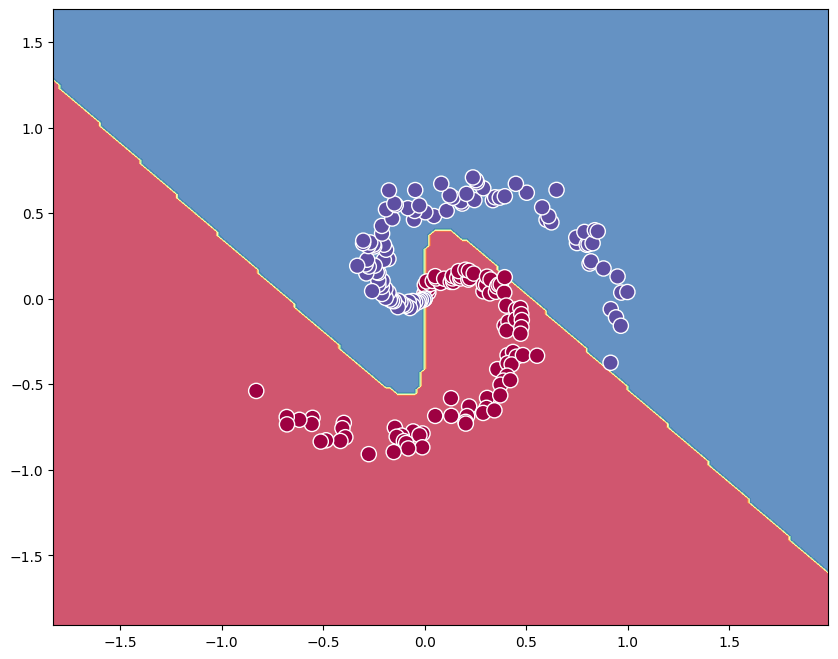

In [ ]:
# plot the resulting classifier
plot_deep_neural_network(X, y, W, b, W2, b2, W3, b3)

<font color=''> Answer to **(c)**: </font>

It became musch more accurate from 70% -> 99%. I think we could get around 100% with more layers or more neurons in hidden layers, but theres a risk of overfitting.


## Homework exercise 2 (4 points): balancing model complexity and performance

<font color=''> In this exercise, you’re going to explore how we can balance model size and performance in neural networks. The goal of this exercise is to help you understand the relationship between model complexity, resource usage, and performance. </font>


In [3]:
# A bit of setup again
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:50000]
y_train = y_train[:50000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [4]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

<font color=''> **(a)** Take a CNN model created for CIFAR-10 from the practice session and copy it below.

<font color=''>Compute and report the following properties:
<font color=''>

<ol>
  <li>Number of model parameters</li>
  <li>Memory used by the model only parameters
  <li>Training and inference times (one pass per train/test set)</li>
  <li>Accuracy on the training and test set</li>
</ol>
</font>

<font color=''> Additionally, visualize the learning curves (loss and accuracy over epochs). (**0.5 points**)

</font>


In [23]:
##### YOUR CODE STARTS #####
x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)
f2 = Flatten()(d2) # tensor into vector
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3)
p = Activation('softmax')(z)
##### YOUR CODE ENDS #####

In [24]:
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# model.summary()

In [25]:
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4048 - loss: 1.7063 - val_accuracy: 0.6344 - val_loss: 1.0535
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5954 - loss: 1.1453 - val_accuracy: 0.6620 - val_loss: 0.9711
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6378 - loss: 1.0296 - val_accuracy: 0.6754 - val_loss: 0.9352
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6656 - loss: 0.9510 - val_accuracy: 0.6856 - val_loss: 0.9146
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6823 - loss: 0.9007 - val_accuracy: 0.7002 - val_loss: 0.8458
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7019 - loss: 0.8421 - val_accuracy: 0.6882 - val_loss: 0.8847
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7175 - loss: 0.8025 - val_accuracy: 0.7048 - val_loss: 0.8301
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7308 - loss: 0.7696 - val_accuracy: 

Text(0.5, 1.0, 'Accuracy')

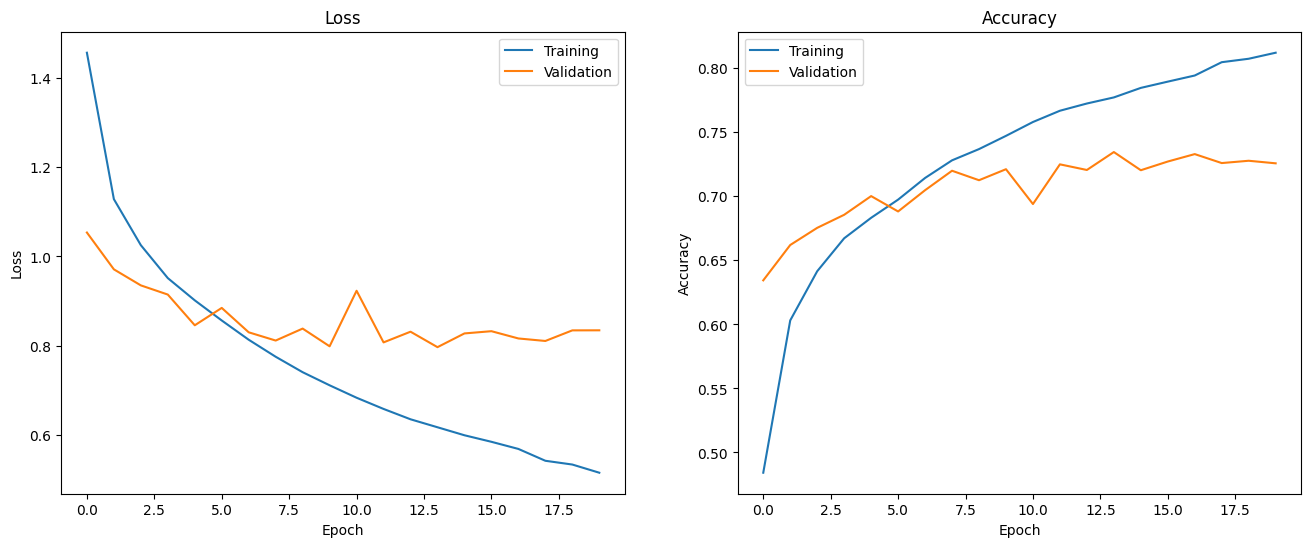

In [26]:
# Visualize the learning curves
##### YOUR CODE STARTS #####
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
##### YOUR CODE ENDS #####

In [27]:
test_acc = model.evaluate(X_test_norm, y_test)
train_acc = model.evaluate(X_train_norm, y_train)

print(test_acc)
print(train_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7216 - loss: 0.8436
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9438 - loss: 0.2293
[0.8522369265556335, 0.7172999978065491]
[0.28686031699180603, 0.9236800074577332]


In [14]:
import time
start = time.time()
_ = model.predict(X_test[:1000])
end = time.time()

inference_time = (end - start) / 1000  # per sample, seconds
print(f"Inference time per image: {inference_time*1000:.2f} ms")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Inference time per image: 1.38 ms


In [28]:
# Report the properties
###### YOUR CODE STARTS #####
print(f"Number of parameters: {model.count_params()} ")
print(f"Memory usage for the model parameters: {model.count_params() * 4 / (1024**2):4f} MB ")
print(f"Training time: 1 minute ")
print(f"Inference time: 1.38 ms ")
print(f"Accuracy on the training set: 0.9438")
print(f"Accuracy on the test set: 0.7216")
##### YOUR CODE ENDS #####

Number of parameters: 731910 
Memory usage for the model parameters: 2.792015 MB 
Training time: 1 minute 
Inference time: 1.38 ms 
Accuracy on the training set: 0.9438
Accuracy on the test set: 0.7216


<font color=''> **(b)** Now, create a new model with approximately twice the number of parameters as the previous one, aiming for higher accuracy. You should start with simple tweaks to the hyperparameters in the existing layers. Report the same properties as in **(a)**. Do not forget to visualize the learning curves. (**1.5 points**) </font>


In [15]:
##### YOUR CODE STARTS #####
x = Input(shape=(32, 32, 3))
c1 = Conv2D(32*2, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)

c2 = Conv2D(32*2, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)
f2 = Flatten()(d2) # tensor into vector

h3 = Dense(100*2)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)

z = Dense(10)(d3)
p = Activation('softmax')(z)
##### YOUR CODE ENDS #####

In [16]:
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [17]:
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.4447 - loss: 1.6168 - val_accuracy: 0.6428 - val_loss: 0.9940
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6474 - loss: 1.0083 - val_accuracy: 0.6822 - val_loss: 0.8959
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6939 - loss: 0.8683 - val_accuracy: 0.6844 - val_loss: 0.8983
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7321 - loss: 0.7658 - val_accuracy: 0.7166 - val_loss: 0.7983
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7592 - loss: 0.6925 - val_accuracy: 0.7214 - val_loss: 0.7950
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7837 - loss: 0.6111 - val_accuracy: 0.7454 - val_loss: 0.7549
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8050 - loss: 0.5579 - val_accuracy: 0.7512 - val_loss: 0.7384
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8305 - loss: 0.4918 - val_accuracy: 

Text(0.5, 1.0, 'Accuracy')

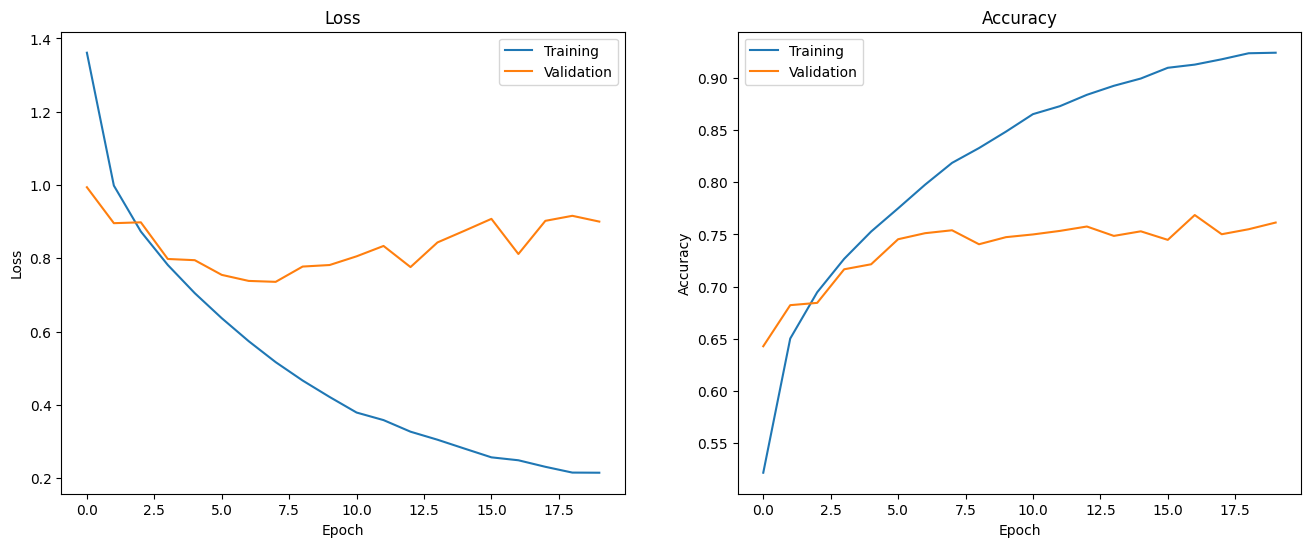

In [18]:
# Visualize the learning curves
##### YOUR CODE STARTS #####
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
##### YOUR CODE ENDS #####

In [19]:
test_acc = model.evaluate(X_test_norm, y_test)
train_acc = model.evaluate(X_train_norm, y_train)

print(test_acc)
print(train_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7524 - loss: 0.9220
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9953 - loss: 0.0362
[0.9117350578308105, 0.7524999976158142]
[0.11802373826503754, 0.9733200073242188]


In [20]:
import time
start = time.time()
_ = model.predict(X_test[:1000])
end = time.time()

inference_time = (end - start) / 1000  # per sample, seconds
print(f"Inference time per image: {inference_time*1000:.2f} ms")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Inference time per image: 0.98 ms


In [21]:
# Report the properties
###### YOUR CODE STARTS #####
print(f"Number of parameters: {model.count_params()} ")
print(f"Memory usage for the model parameters: {model.count_params() * 4 / (1024**2):4f} MB ")
print(f"Training time: 2 minutes ")
print(f"Inference time: 0.98 ms ")
print(f"Accuracy on the training set: 0.9953")
print(f"Accuracy on the test set: 0.7524")
##### YOUR CODE ENDS #####

Number of parameters: 2922242 
Memory usage for the model parameters: 11.147469 MB 
Training time: 2 minutes 
Inference time: 0.98 ms 
Accuracy on the training set: 0.9953
Accuracy on the test set: 0.7524


<font color=''> **(c)** Finally, create a third model with approximately the same number of parameters as the initial baseline model, but aim for accuracy that matches or even exceeds the second (larger) model. Report the same properties and visualize the learning curves for this model. (**1.5 points**)

HINT: To get higher accuracy, focus on applying changes to **the model architecture only** about which you have learned from the lecture and practice sessions.
</font>


In [32]:
##### YOUR CODE STARTS #####
x = Input(shape=(32, 32, 3))


# First conv block
c1 = Conv2D(32, (3, 3), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)

# Second conv block (added depth)
c2 = Conv2D(32, (3, 3), padding="same")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)

# Third conv block
c3 = Conv2D(32, (3, 3), padding="valid")(a2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)

p3 = MaxPooling2D(pool_size=2)(a3)
d3 = Dropout(rate=0.25)(p3)

# Flatten + dense
f = Flatten()(d3)
h = Dense(100)(f)
b4 = BatchNormalization()(h)
a4 = Activation('relu')(b4)
d4 = Dropout(rate=0.5)(a4)

# Output
z = Dense(10)(d4)
p = Activation('softmax')(z)

##### YOUR CODE ENDS #####

In [33]:
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [34]:
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.4035 - loss: 1.7163 - val_accuracy: 0.6340 - val_loss: 1.0340
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6147 - loss: 1.0964 - val_accuracy: 0.6752 - val_loss: 0.9159
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6598 - loss: 0.9737 - val_accuracy: 0.6934 - val_loss: 0.8875
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6819 - loss: 0.9058 - val_accuracy: 0.6976 - val_loss: 0.8450
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7055 - loss: 0.8383 - val_accuracy: 0.7022 - val_loss: 0.8256
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7232 - loss: 0.7865 - val_accuracy: 0.7128 - val_loss: 0.8019
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7382 - loss: 0.7453 - val_accuracy: 0.7232 - val_loss: 0.8031
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7518 - loss: 0.7024 - val_accuracy: 

Text(0.5, 1.0, 'Accuracy')

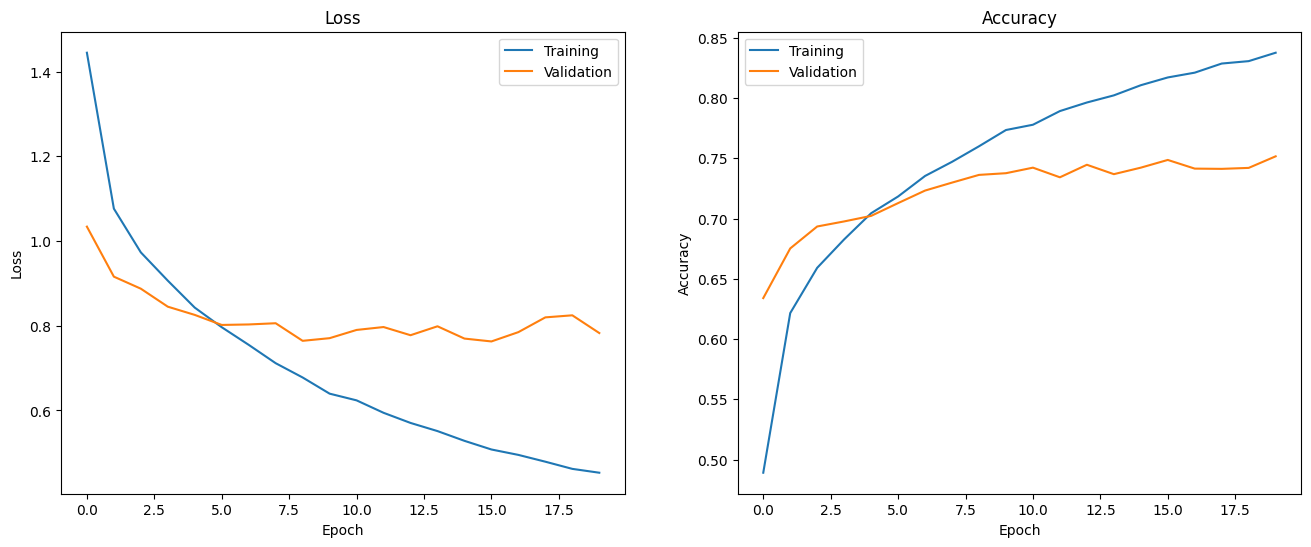

In [35]:
# Visualize the learning curves
##### YOUR CODE STARTS #####
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
##### YOUR CODE ENDS #####

In [36]:
test_acc = model.evaluate(X_test_norm, y_test)
train_acc = model.evaluate(X_train_norm, y_train)

print(test_acc)
print(train_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7510 - loss: 0.7763
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9599 - loss: 0.1705
[0.7923641204833984, 0.7479000091552734]
[0.22879910469055176, 0.9408000111579895]


In [37]:
import time
start = time.time()
_ = model.predict(X_test[:1000])
end = time.time()

inference_time = (end - start) / 1000  # per sample, seconds
print(f"Inference time per image: {inference_time*1000:.2f} ms")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Inference time per image: 1.23 ms


In [40]:
# Report the properties
###### YOUR CODE STARTS #####
print(f"Number of parameters: {model.count_params()} ")
print(f"Memory usage for the model parameters: {model.count_params() * 4 / (1024**2):4f} MB ")
print(f"Training time: 1 minute ")
print(f"Inference time: 1.23 ms ")
print(f"Accuracy on the training set: 0.9599")
print(f"Accuracy on the test set: 0.7510")
##### YOUR CODE ENDS #####

Number of parameters: 741286 
Memory usage for the model parameters: 2.827782 MB 
Training time: 1 minute 
Inference time: 1.23 ms 
Accuracy on the training set: 0.9599
Accuracy on the test set: 0.7510


<font color=''> **(d)** Summarise all key properties (such as number of parameters and memory usage) of all three models in a single neat table (you can use a Markdown syntax). Also, additionally add a figure with all three pairs of learning curves (perhaps, using a different panel for each pair of curves). Explain how changes in the architecture affected the behaviour of all three models during training and inference. Which model would you choose for real-world use? Feel free to discuss different use cases. (**0.5 points**)
</font>


<font color=''> Answer to **(d)**: </font>


I would use model 3, becuase it has best accuracy between test and train data, its memory usage is quite small as well.

| Model                  | Conv layers  | Total params | Memory usage | Notes                                         |
| ---------------------- | ---------------------- | ------------ | --------------------- | --------------------------------------------- |
| **Model 1 (baseline)** | 32, 32                 |  731910      | 2.79 MB               | Original model                                |
| **Model 2 (wider)**    | 64, 64                 | 2922242     | 11.15 MB               | ~2× parameters, higher capacity               |
| **Model 3 (deeper)**   | 32, 32, 32             | 741286      | 2.8 MB               | Same parameter count as baseline, added depth |


Model 1
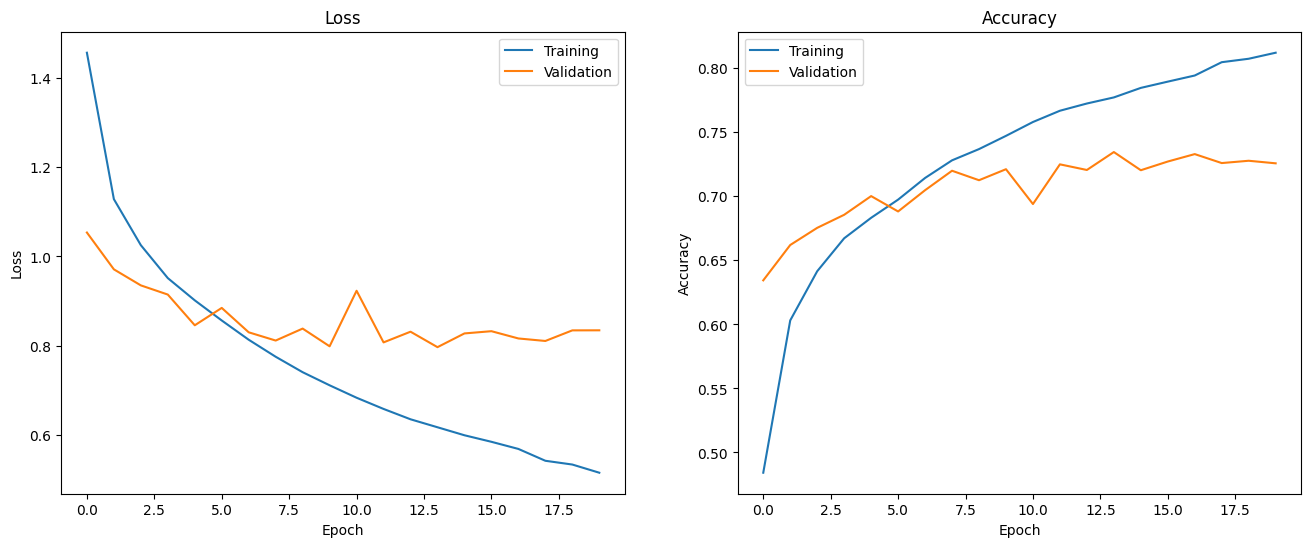

Model 2
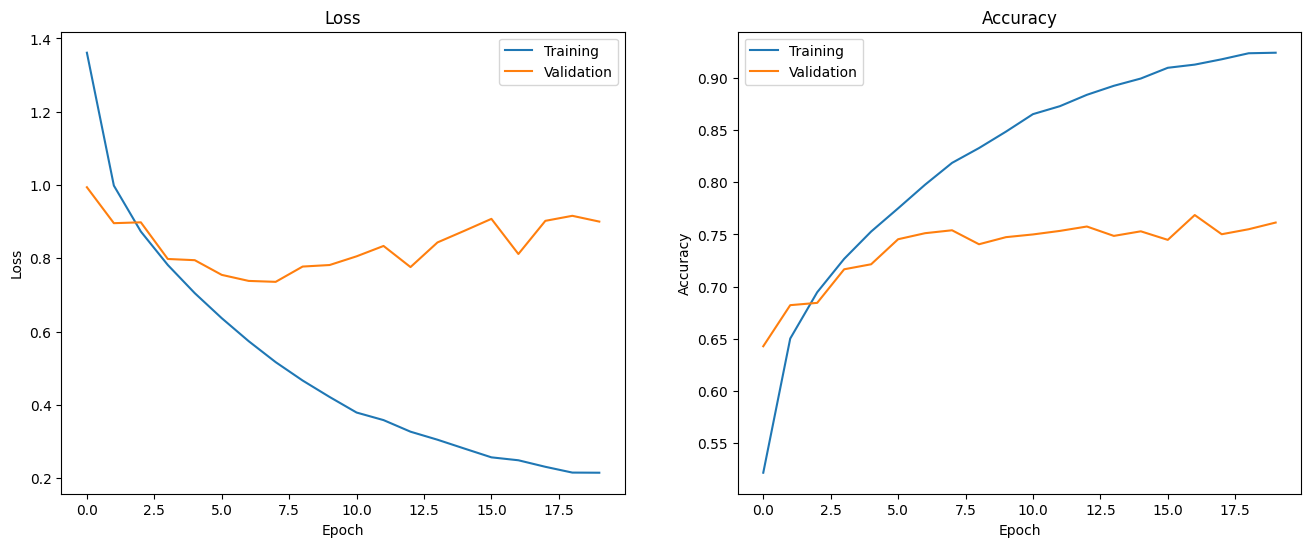

Model 3
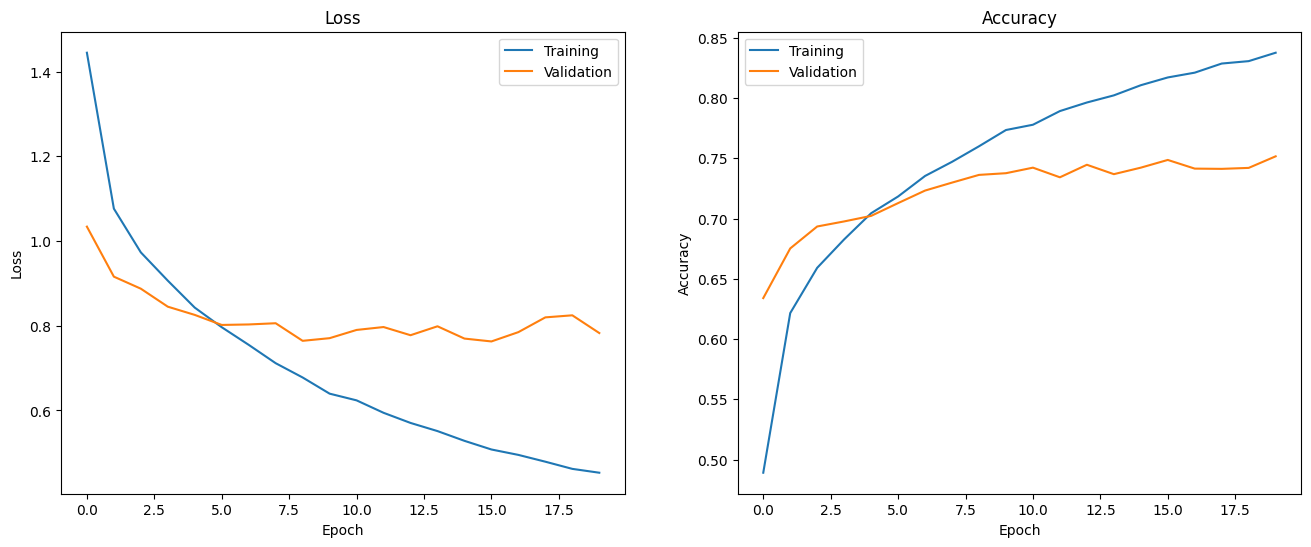

## Homework exercise 3 (2 points): Create your own dataset and build a CNN model using fast.ai API

<font color='red'> In this exercise, you have a chance to test if CNN can distinguish between images of your favourite objects. </font>


In [41]:
from fastai.vision.all import *

from pathlib import Path
from PIL import Image
import requests, io, re
from tqdm import tqdm

# We don't like warnings
import warnings
warnings.filterwarnings('ignore')

from urllib.request import urlopen

<font color='red'> **(a)** Create your own dataset with two or more classes using the same approach we used in the class. But this time choose classes yourself. **(1 point)** </font>


In [42]:
def download_images(csv_path, label='', max_images=10000, timeout=10):
  out_dir = Path('./data') / label

  out_dir.mkdir(parents=True, exist_ok=True)
  df = pd.read_csv(csv_path)

  max_images = min(max_images, len(df))
  df = df.head(max_images)

  for i, row in tqdm(df.iterrows(), total=len(df), desc="Downloading"):
    url = row[0]
    try:
      r = requests.get(url, timeout=timeout)
      r.raise_for_status()
      img = Image.open(io.BytesIO(r.content)).convert("RGB")
      fname = out_dir / f"{i}.jpg"
      if not fname.exists():
          img.save(fname, format="JPEG", quality=90)
    except Exception as e:
          print("Broken url", url, "->", e)

  print(f"\nDataset ready!")


In [43]:
classes = ['cat', 'dog']

In [44]:
for _class in classes:
  download_images(f'./{_class}.csv', label=_class, max_images=500)

Downloading: 100%|██████████| 500/500 [00:07<00:00, 67.68it/s]



Dataset ready!


Downloading: 100%|██████████| 500/500 [00:07<00:00, 70.29it/s]


Dataset ready!


In [45]:
def verify_image(fn: str, min_width: int, min_height: int):
  try:
    im = Image.open(fn)
    im.load()
    width, height = im.size
    if width < min_width or height < min_height:
      return False
    return True
  except Exception as e:
    print(e)
    return False

In [46]:
def verify_images(fns: Path):
    image_files = get_image_files(fns)
    for img_file in image_files:
      if not verify_image(img_file, 100, 100):
        print(f"Corrupted image found and deleted: {img_file}")
        img_file.unlink()

In [49]:
for c in classes:
    print(c)
    verify_images(f"./data/{c}.csv")

cat
dog


In [50]:
dls = ImageDataLoaders.from_folder('data/', valid_pct=0.2, item_tfms=Resize(224))

In [51]:
dls.vocab

['cat', 'dog']

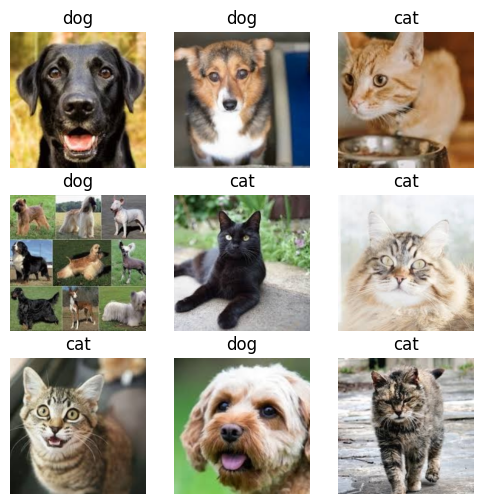

In [52]:
dls.show_batch(max_n=9, figsize=(6,6))

In [53]:
dls.vocab, dls.c, len(dls.train_ds), len(dls.valid_ds)

(['cat', 'dog'], 2, 800, 200)

<font color=''> **(b)** train a neural network on images you have acquired **(0.5 points)** </font>


In [54]:
##### YOUR CODE STARTS #####
learn = cnn_learner(dls, resnet34, metrics=accuracy)
##### YOUR CODE ENDS #####

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 96.9MB/s]


In [55]:
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.439100,0.252462,0.930000,00:04
1,0.299941,0.206033,0.940000,00:03
2,0.243773,0.166767,0.950000,00:04
3,0.193160,0.172704,0.955000,00:03
4,0.157769,0.145397,0.960000,00:03


Plot the confusion matrix to make sure that you model has learned something:


In [57]:
val_loss, acc = learn.validate()
val_loss, acc

(0.14539732038974762, 0.9599999785423279)

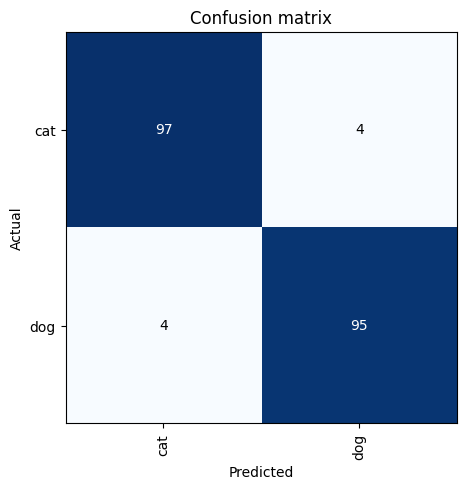

In [56]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

<font color=''> **(c)** Test your model on one or more images from the internet that represent classes you have chosen, but unlikely to be in the training data (you can change your search query). Print out class probabilities for one of these test images. **(0.5 points)** </font>


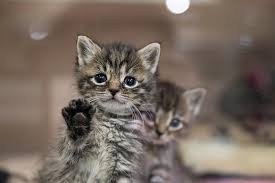

In [58]:
##### YOUR CODE STARTS #####
img = Image.open('./data/cat/14.jpg')
img
##### YOUR CODE ENDS #####

In [61]:
# What are the probabilities of different classes for this image?
##### YOUR CODE STARTS #####
pred_class,pred_idx,pred_idx = learn.predict(img)
pred_class
##### YOUR CODE ENDS #####

'cat'

In [62]:
# @title
img = Image.open(urlopen("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEAYABgAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBxdWFsaXR5ID0gODUK/9sAQwAFAwQEBAMFBAQEBQUFBgcMCAcHBwcPCwsJDBEPEhIRDxERExYcFxMUGhURERghGBodHR8fHxMXIiQiHiQcHh8e/9sAQwEFBQUHBgcOCAgOHhQRFB4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e/8AAEQgB7wNwAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A8PJ4phpx6U2vmmjgiJTlpKcKk1sTRmp1biqqmpUNBDQ9+arTKTVoDNMdM1UWJmc6EnpSJFz0q60XPSnLHitOYm5CqACo5iAKsSEKKzbyYAGnHUncp3rjmsmc8mrN1NknmqLtk1301Y3hEjNOHNMLDNKrc1vc6IxH4pMUoPFDGmmEo6CrUqGq+7mnrJWlzKxPmonakL+lRO2aTZfKKZOakik5qqT709WpbmbRpRS+9SiUetZiy470pnx3p2MnE0JJR61D5maotP70gmHrUWGoF5mFQTHiohLnvTXkyKuKK5SrcHk1nSnmr1w2c1nyHJNbJaGsENzQDTaKLG1h+aN1N5pdtKwrIcGqeJ6rAU9DipkrktGlGwxjNSCqcL9Ksq2RXPJWJsOY4FM3UOeKjzRFAokyNipUbNVVznFWIhgVTiPkJQaM0YpKzaI5RSaYxpxFMccUWLUBjP71GZPeklzUXNUkQ0TrKacZPSq4FPUU7EsfuzQrHNJjiikQ0TJIR3pS/qahBoJzWkYXKjAeW560oNRDrTlNbKmaqJMKCaYGoJq1Gw0hCxpAeaDQtapFpFiKrMfSqsVWohTGWF6UuOKEBxTwKBkZFNK1Pto20AVwtLtqcJS7aYiAKaXb7VNijFAEQWnBakxSgetIZEVqvMDV4rxVeZOtJsDKn61SkY5rTuIie1UZYST0rNsaK+40ZNTC3Y9qkW1Y9qBlbJo5q8tm3pUq2LHtTsFzNANOCMe1aqWBPap004/3afKxXMmKNvStXTojkcVZi045+7WlZ2JXHFXGLuJsuaXH04rpbGMYFZdhb7ccVuWiYArup3SMZFyKMY6VKIx6UkfSplra5AiRDPSrMMYHao0xViM0ahcniQVYVRUEbCplenqO5IFo20gYUu8VSTFcCtIVoL0hf3q1Fk8whFMYClZxUTOKfKyXIXNNJFRtJUbSj1q0iWyZiMVGzjFQtL71E8tXEhsmd6YXGarPLTBLzW8ZGTReVs1KuDVKN81aiNVziUSYKCKd5WadHzUyjisJzuaRieU5paatSgZr8vbNUrDQKXBqRUpSuKm5TkRipENMahTimkQ2WU5p4FQo1SbxRYnVisBULsAKV3qrPJVJNhYiu5evNYl7Ocnmrt3JnNY902Sa66UC4xK00mTUDNTnFRtnFdkUdERpalRuaYaVRzVm0WWFNDUiCnkUimrkTH1pAac4pFXJqrmXLqLk4prGpAtMkU4pXKuRbqTfUZyDTS3NUjJkpfiml81HnimjNVcViTdSbsGgAmhlNCKsPD8Uu4mmIpqeOPirSJZWkUkdKqyR1qtDkdKie3PpWlwTMooaURE9q0vs2O1KIMVm5F85QWGnGLAq75OKa8Zpc1xc1zPZcUzpVySKoGiOelWi0ETVaiaq8MRq5DEazmirCkZFRhTmriQnFKIeeayTsK9isqc1Ogp/l4pQvNNu4Bjml20oFOUVmxqI0Kaa6VY201l4pJmnLoUJV4qHHNXZlzUITmrMJxIlWnhcHFSbeKQ8UbkcoxhgUgpzdKaOtaRhcXKKOacFoUU9RXTCNi0hu2jbUlBrZItIZtoxT8UtOwyPbSheelOxSgUxEkS1ajHAqvFVmOgZMopwpq9KXNSwH9qcBUeacrUmxj8UGkzTWNLmELSZxTeT0FKFY9qbkMXNOBpFjY1MluxNTcdhg5oaIsKuRWrVbisie1S2OxiNaFu1MNhntXTx2Ge1SiwA7VLA5VdP/wBmp49P9q6X7CPSlFmPStacbkSlYwY7Af3asJp49K20tcdqmS2A7V2QpIxdQxo7Af3anjsB6VsrbipVgA7VuqKJ9oZMdiP7tWYbLH8IrTSIelSpGKtUkiXUKsFtt7VdijxT1QCngAVooInnHKKkWmA04GqUELmJVqVDVcNTg1VyIXMW1epBJVMPTvM96aihcxc8yl8yqYk96XzKtJC5i35lIZPequ80harshXZO0nvUTvTCTTSTSdguI7VGzU5gTTSppaAMLGo2NSFKaUo5kFiBqaOtTmOgRVDqDURIiauQt0qukdWI1xUe0L5C3G1Tq/FVE4qQNRz3DlPM1FTIKiSpAcV+aspomFNYjFRmSmNJ70KNyLDmPNM3UxnzTc81qojUSdXp/mcVW3YoLU+W5SiSySVUnfNSNk1EyE9q3p0wsULjJJqhMhNa8sXHSqc8Y9K6opIFoZTpURSr0iVCU5rRFplTy80+OE56Vcjh3HGKuwWnHSqLUihHbn0qT7McdK2YLPI6VObD5elFivaHNyW5AzimJCR2relsznpVaS329qTQnIzfKqKSPFagh45qG5hwvAqSeYw5V+Y1Cymr8seSeKjMftWqKKQWpFTintHg0qjAqxgq0/y6cgqUJmpJZEseDVmJBSpHU8SCqvYzbBYQRQ0Aqyg4pWTNQ5k8xQaIelN8r2q/5XrTSnNZuQrlFosCoXj9K0jH7U1oR6U4yKTMtoc9qQ2wI6VpmIDtSGIelbxmbRkZqQAHGKsxwgdqsLDzmp0iAGamcrj5yBYsCkdKuKgxUciVhcyc9Sky1GQc1bMfPFRsmD0potSIsU9eop2zI6UY5pHRFj8cCkIyKfj5aXBxU3KbRWkTiq5U1ekHFQlc1aMpFb8KYwbPSrgjFOEYParihWM4qxPSlWNvStNbcHtUqWw9K6Y2Q1EygjelPCt6VqG2GOBSC2FacyHYzNrelJg1qfZvak+yZPSnzhYzAD6UYb0rUFn7U9bHPampCMjDdhTlVz0FbSadnnFSpp/tT5gMaJH9KtxRN6Vqx6eB/DVqKw9qiUwMYRuR0o8l810KaeMdKGsBnpWftLhcwBCxqSO1Y+tbyWA/u1YSyA7U+YLo55bRvSnrZk9q6NbEelSCyGOlCFc5xLE+lTx2HtXQJZj0qZLQelXYfMjBjsParMVj7Vtraj0qVbcDtRYXOjJisunFW4rQADitBYQO1SBAO1OwnUKkdqPSpDbgDpVkYFMdx0qJNIh1So8QqMoM1YkaoGPNONVIxlUuNwBSrTeacoNbxxKRm2SAjNO3VHg0hJFafXEiWydZBTxLVMtzQZKh49EORdEtOE1Z/m+9KJKaxyGpGkstPElZyy+9SCX3rVYxFXRe8yl8yqQlpwk4p/XEF0XA9OD1TWQU9ZRU/XAui4rUu6qolFHmjHWrWLC6Le6l3VT84etKJqr62F0XAfelqoJxTxPVrFILos4oIFV/OHrQZh61X1hFIlIFIQKhM3vTDN71DxCHcsYFAAqt53vTvOFR7dDTLIxS7sVV84etIZqPbIrmLokpfMqj5/vR5/vTVZCucQre9DPVQS+9I0vvXwyiyid5MVEZfSoHl96YHya3hAaRaVyakBqtGaspzVNAxec09VzSotWIo80JE8xGkWe1S+RkdKtRRe1TeVx0rVSsS5GPNAQOlULiE810MsOe1U5rU+lNTM+c5yWAk9KYtqSelb/2Mk9KljsfatFMfOZFtaH0rTtrM8cVo21mAQcVoQWwHatoMfOUILQAdKnMAx0rQ8sKOKjdSe1a3Qc5kz2w6gVnzW4J6VvypkdKpSw8nipk0DmYr2+O1VbiDcMYrckiPpVf7PknIrByJ9qc7LaYHSovsmeoropLbnpTRaZ/hpqoUqxzMtrjoKrtbkHOK6uSyGM7arTWI9Kv2harHOrEfSpY1IrUez29BUJtyD0pqZXtEQKuKlRRSmMgU6Me1Dlclu5JGtOOAKFFOZSRWTZm2RHrTR1qTy2z61J5NFwTIwAe1DJ3qwsfoKVoz6UguUmUAdKZVmSM1GY+eRVKRrF6EOKmjQkU5Yc1Yii29qHIUiIRcU148dquMvtTSmai5ncoeVmmPDk9K0hCccCm+SepFNSLjKxneVSCHnOKvmHNAhIPIqrm6qaFURAjpSeVxVwxHsKQx4qRe1M+RM9Ki2H0q/JFz0pEhz2qkx+0KiQknmpFi56VeSHjpzTvKx2q1NFKoivFEM5IqfyhinBcVKgBqvaGimit5eD0pQg9Kui2MkTyAHCDsO9Vgpzgg5qlUuF7iLGKf5IIzipooyxwFNWFiYdVo5xN2KiQc9KsxW444qxFEM8ip1jA7VoqqEpIgS3HHFTJbDHAqeNRkVaiUbsAUpVkHOiqlqPSrEVuuelXooQV4FTLb4bgVjLERIdRFIQD0pwtcnpWglvntVgW5HasJYmKMpVEZaWYz0qVbQDtWmIML0pGj4zimsUmR7VFJLUf3aebYAZxWkkXyDikeP2qfrquL2xmCIDtTgg9Kszx4GRUBBArZYxNEOsNIx2prNiiTNQSE+tNYtE+2JPM96aZfeq5Y5pCT1zTeJF7UnMtRNKajJpprGWIJ9oPLZFNJpMUoFZOuHMKOtTxR5qOMcirkK8dKmOIuCkRmMAVDKlXioxUUycdKJ12OTM5+DUTGrckdV5E9qw9u2YORCWNJvpzJTCtUq7QuceJCO9OEh9ahwacAa0WIZSmTiQ+tOEnvUABpDkVSxLDmLIlPrThMfWqRYjvSbz61X1hj5zQ84+tNMx9aohz60hc+tP6yw5y8Zz60n2g+tZ7Oc9ab5ho+tMOc1BcH1p4uD61kiQ08Sn1qli2HtDUFz70v2j3rLEppfNPrWqxjGqhpG4PrTTce9Z/mn1pPMJpfW2P2hoef70on96z95pQ5FH1oaqGh59Hn+9UPM96PM96f1sftC/51NM/vVLfSF6f1sPaHIed70hl96qF6bvrhUDvsWvM96cr81UD0+Nq0USrGjC1XYKzIG5rStjUNGM2XY1zVqFKhg5FW48Y5p8uhzSkSIMVOgBqAHmpoW55rKVyeYnWEN2p32NT2qWEjFWlIqVJj3M/7CD/AA05bIA9K01xTjgCqUxqJRS1A7U/ywvap2dQKrSyjPWuiEyrBtzTTHk0gkB4zUseDV+0BIrvFkdKqzQ47VrFcjpVWdB6U+a5M9DLkj9BURhFXnFM296ybOZspiDJ5FWIrQEdKnVOc1ahWoTGmUvsA7iq9zYjHArdVaZPGCvQVWpXNY5aWzxnIqpLZ8H5a6SWHLc02Oz8w9KSk0NTZyxsSei0fYsD7tda1gMH5f0qlcWu04xVxqXNFI51rbFKkJJ6Vrvb57VE0O3tQ5A5WKP2bJ6U9bftirqR89KmSIVKkRzFFLbjpTjag9RWmiAjp0pfLGelHOLnMlrUHsBVaS1APAreMQ7VG9vkdKakaRqWMRLcjnFTCA7elaqWhPIFSLanuKfOW6lzG8k+lJ5ODWw9r7UJZ+1LnRPMZ0VuSvSlktsHpxWzHaYAyKdJa5/hqeexHPqc68OO1NSL2rbezOelOFhnoKaqI0UzFEXPSmSwccDFdAunnHSmzWB25C5olUQcxzX2cselSpa9OK3Usc9RzUy2XI4qXUHzGPHZZXpTjY4zxW/FaEDpUhs8/wANYurYj2tmc2LEEdKmtNLaaZI0QszHAUDk/SuhjsNzBQBzXX+CNPt7Q3Ouyxx+Vp6h0393H3SfxGfwrSnN1JKK6m9Kbm7I2/D9h4b8NWEPhnVdEs737UEXVriZd0kTnqIj/Dsz17kGvKPFHh46Z4p1PTmbzRb3ckYkx98Bjhh9Rg1sRarcXutvNKzkyOc5JwM11/xGis7y60u9jRvtE9hE1wSuAxA2g+5wtddSpaLtsjrr0/YxUjzSGw2rwoFStY8ZC10a2o9BStbADkVySxGhySro5gWWG4WnfZCeMV0DWy56U5LUEjiuKWLae5h9Y1MFLNv7vSrlrZHPSt6GwB7fpV2CxA7cVlLGO243VbMa3sjkZFXY7EHtWxDZjrircdoPSuSeLa6kqbOfWxPZamWzOPu10K2gA6Uq2oB6VzSxjZdmc6bX2qNrPjpXSSWnPAphszjpVrGOxLizBSDgDFK9tgdK2RaYOcVHcQ4GAKhYluWhFmc9cxdsVUeA9cVvvb57VG1rntXbCu7E8rZzssRHaqksZz0rppbLPaqU9kQfu1tHEoiSaMExnrik2Y7VqPbEdqYbfB6VqsRcm7M7y6aYz6Vp/Z6BbZpe2KTMwRn0p6xH0rVSzz2qQWR9KzliAuzKWI+lTxAitEWZ9KcLTHaojiLMauUgOKRk3dKvfZsdRUiW/tVyr3RpZsyGt81BLbn0roTbZ7VDJaZ7Vkqxm4nOvAfSoWhOeldE9n7VC9n7VXtyLMwvJPpTlgPpWx9k9qctpx0qvalJGMYT6Ux4T6Vum19qiktfamqpVjAkjI7VCUNbUtrz0qtJb47VvGdyeUzgppCDVxoiO1MMR9KrmCxRYUm2rhgJ7Uotz6UnMGioAaXFW/J9qaYuelCkLlKxFJ261ZMRx0pjRn0rRSBRIM04ZpxQ06NMnpTuNRBVNKRirCR8U4xe1Q6hXKUmpKtNDz0oEB9KOcOUrinhc1YW3J7VZjtT6Uc4+U8uJpuaMGl2nFelY9iwA1LEeah2mrFuhZgKpRuJlq35NaVuCKXTbMHBIzWutmoTpWioNq5yVGV4GxVlJOMZqrPGYzkUxZKzlCxzSNAPxUiSc9azhJ71NG+aycCdjYgmAA5q2k6461iI5qZXI71k6YcxsCcetOM4I61kLI3vTxIcZ5qOQtVC5PLgE5qhLPz1ps0jEY5qsVYmtFEfPcuQTEnrWpasCOaxoUIrStSQBk1UY6k+0saORiqtyOuOTU65IoaAsM4rqaSWonK5lN945pwHpU1zCVOcVHGK4pySZhIAAOtTwNzURUgUgJXmiDuEWXtwxmo3YE1TaVs4qeBWcZ5rScrIpsQoSeBWpp9i3lAkcnmnWFpuIyOtbCxeXjI4xXPOaasOKMya1AH3ayL+JQ20da6i4AKE1z1xGzzMcHk1nTuncbdmZMkI9KrPAcnitz7MSOlRSWxB6Vvz3FzGOIO2KlSLitH7NkZxSrbmk5CbM3ZhsDNTKoParptR6U5bYgcCsnUJ5imsWW6VoWOj3N6P9Ft5Z3zjZHGWY/QDrT4LbnkV6TY6k/g/4d20mlztBqmqySSSzAbZEgQ7VVT2BbJz7VrTam9XojpwtB4ifIjzi50e6spfKurWaB/7ssZQ/kQDTDagfw81tt411bzm89pr2BzueG7JmRvfBzj6jBqzGmn69CbrRVEdyozNY5JYf7UZ/iHt1HvVShdXg7nRicvrUFzbnLNbD0pY7bnoK1Hi5wVwaFixzXG6p5vOUPs49KcLcEcir3l809IST71nKrcnnuZn2TPanx2mD939K1kg9qnjhXPShVrFxkZK2f8As0klp7fpXQxWbzMiRryflXPAJ+tILH53VsfISCQwIz9aftG2aPmOaFlz0py2mO1botm+bjIzinrYszED+7u6ZzVc7JvIw1ttvVaUQj0rcexLw70iYOFGV/qPalstFvLq4WGGPeWIHHIye1Zz5m9CZRm3oivpWi3t6FFtaSy+Y20FVyP89qu/GB28M6LZ+EoNouZVE93tOSXI6f8AARgV61oGhweFrSbV9ZKebFECkYORGqgA+wzj9a+ZPE+vya94wvNTmkeRXnYoQM5Gf5dq9bD0PYwc3uz3cHheRq+5PplpIsSzTJJGxGdx6nPUnNei+M4Y0sdBO5TMdNQyDAB5ZiD75FcVZztNbhVicgDkkDNeh+N1ge00xFZw8en267NgAPyZJ3d+vSlUhL6vJs1zlr2aUTkVximvk08rg0Y9q8GU2z5rmZEqfNVmFBnpUYGDUsRxXO0xJmhbIMVfhjXHSs62kwAK0IZR0zWU7o6IstRRj0qykYIziq8UgwKsRyD1rjne5qrEyxjHSl8oUCQY4NKJR3rJxZurAYge1OFuCvIpyupqdWGKh3KSRTe2GOlU57celbDYIqpcgVUG0yZRRjS2/tSJbZ7VoFAaVUArp9o7EcpntaDHSq09oD2rZOKhkVTUc8rkuCOdmsuTgVXazA7V0Esa1WeIV0wqyM3TMR7XHOKdHa57VoyIKSNQK6lN2JsQxWvtU62w7irUIGKkO0CuebZoolEWw9KGtwB0q7kUxyOalNgoooNAM9KRYRmrLkZpFIzWyu0aKwwQjHSg24ParK4xS8CplcGkUWt+elRPbDuK0Tio3xUJu5m4ozDbjPSjyB6VcfFMJFdCbZOhWMI9KhkhHpVxmFRSEVtGLGZ00I9KpTQ+1asmKrSJmt46CMp4fami3J7VpGP2oWLJ5FW5ElBbbPanG19q00iHpT/JHpWMqg9DFe29qj+zn0raeEelRiEelCqCMr7MfSmPa+1bYgHpQ1vntTVYpHPPan0pEtyD0rea19qj+y4PStVVuhmdHCewqYW+e1aEdv7VYjt89qxlUEZK2mT0qZLH2rZjtvarEdsPSs3WKMSKw/2atJY/7NbMVsPSrC24x0pe2ZSPnSO3PpUn2f2rXjsz6VMLPI6V9A6h0usc+0Bz0qxZQ/vBxWsbL2qSGyIYYFXCqg9qXNMi4HFaqx4XpVaxiZQOKvEsRjbXZHExsYSlcx79OoxWaUOa3ri2d85U/lVc2Lf3a56lVMybM1FJNWI1NWxaH0qRLc+lYe0Rm2Qxg96sKue1SJBU0cXShzRNyJI6k8o46VYSGrEcGT0qOdENmf8AZye1IbU46Vsi3wOlI0PGMUnKw+ZmSsRHGKniUg1ZeE54FSRwHHSoVdInmH2uGIGMmtqCzyg4rMsYSLlMjvXWWsalBXNicY0rI3pWZz1/p+UbisJYcOVxzmu/uoV8tiR2rlUtmM7Hb1NY0Kzne5FWNpFJbUtxjNNmsnUE7a6mw0xtm5l61YuNNJQjbWn1lRdgVOyucG1uc9Kv6bEc7SOa3JNLCvgrzTRZeWwdRRPEKcdCWmTWMIUirs0eYuOoplsvGasEEjFcH1mz1BTsZk33CKzzCNxrVuYiGxUQh9q6niE46ESmUPK4xio5IfXpWmYgPwqKWOiNVkcxRWEdxQ0IFW1j5p4izV+1DmuZwhAPSpEh5zirog56U8Rbe1YupqK5FaH7PcpMsUcu052yLlT9R3rV+I9zJe6npFrOq4XToSFUDaMgnjBPcmqaxg9q0vGNqIIPC19jAeGSFnOOQknA/Df/ACrtw8m4yR7uQSX1pJ9Tk9X0sxoGBbK8kAc1zEl1d6ddx3FnK1vLGdwwcE/jXqGt2rXluscTiIEE8dW/GvNdetI7C4ZZIxI2fmJbJqqE3c+wxtJLY7nRr2z8XRvPbMsWqDma2P8Ay1Pdkx39R+PrUtxpl1bbPNhZd/Tvn8q8jhu7jStQivLGWSCWFt8bgkEV798L/EXhzx7bG01Z/sGugAs6/cnx/EFPf1roq4RVfehoz5HFZfGTbhoc19ilSUpLGykHkMMGp1sSW3KCD1C4r2K0+HcibWluLe4iWTeRuPzDvmqt14RjtJBtcEEfeUZ49cfjWccsk9zGnl3dnmEOnyfLxkkdBVu30xlSZ5EI2KMHHBya7/8AsOBLRLkRgvycqNpA/wD1U210VbrzJI18yHsGPPPeuhZZDubxy+KOJSwuZdiKhdPMAfA4XjOa0ZfDVwhDoAyDGM8ZFdrp2myRKxaHcN2QmOeR/SrVzH5EEbzxjyTgHd2BODn2rpjg6S6HUsNA4/8A4RVw4CsgByM56t61f0PwnLb232m4CCVjsA67cev1rpdsL6pFBkmDZuG3qzDgCtG/uY4tOhmUiME5wecdf/r1osNSWthfV43Whl2nglLq3dzcCKeTjfjoPStRLTw/4WtkjEcZmIy0jr27k+grEutbvnu2No6xQmDcrk8Fyw4H51ia5fy37S/b544okQvcz/wRoBzn34q/ZQi7pFxpRTuc18c/FvkeGxbmVhJqLFYivUxjrgdRzXgNg7QzHLAMSQR1x+VafxW8Trr3ix72KcrZwr5NrEBjy41G0dfXGfqa5/Tp42xskKnPTFZ1NdDaDs7neWNzE0KtI4c7ewPX8Old7qCGWS2j8tA4tIVbYCQTsHP1+leZ6OjFP3fykDLyHAVfck9q9TF2lvrEUkayzqVj2yS4BK7R90DoPc8+wosnTcTkxvvpXMm70e8tgJLhEgiflGlcKGHsD8x/AVQZAHZQwcA4DAEZ/Pmu08YaRA7C+tJFYuMyeZOWbPoN3JrkdnPNfOYij7OVrHz1WHJLlIgntQV5qcKBTWWuVozY1GxUqzbT1qIrTGJqeS4c5ox3XTmrKXXvWEZCDT0nPWs5UUaKqby3fPWpPtQ/vVgiYk9acZz61m6SL9sbyXnP3qsR3g45rmfPPYmpUuSB1rJ0ClXOmF2McmopblT3rCF2e5psl0e1OOHL9sbnnDFHmgjrWMl1x1pxuuOtHsdSvao0JrgZ61EbjJ61kzXHPWovtJrdYdWMXW1Nhpge9RSSjFZv2k+tMefPehUR+1Lcko9ajWYZqlJKT3pFkxW6p2IdQ1o5gO9K0/vWWs1O82pdK7LVUvmf3prTA96oGWk8yn7BIXtC4ZPenI4qkJOakWSqULDVQvCSkaUetVPM4qN5M0SgmU6hcM3vTGmGOtUWlNNMn1rL2ZHtCy8oqNpars2aYzGtIRIcyw0tRPJnvUJY0xmrqilYOckL5pCc1GOtSCiwKY0inLSHNIDUyQnMnSpahQ1IDWMoj5gYD0pgHtTiaQVDRPOOUVIFFNFPTrWbKUxPLBpDD7VYQZp2zitFKyNUyssXtU8cftT1Spo0rOTuK4saACpkQUKuKkHSoehVxUAzUwHFRKDUoBrNyGpHlY0/H8NSLYE8Ba6z+zfnxtqeHTPmGVr1Z4pIltnKJpWeSKlXScHIFdd/Z+P4akjsR/drn+usLtHNWul57VrQaICoO3n6Vt2VgCw4rqNP01FQHaCcVX1pt2TN6ceY4Q6DlOU/SqE+ihcjbXrX9nKyYKj8qxNU0sK5wtN4lx6l1KdkeXTaftJ46VB9k9q7S+08iUjFVDpbYyFrRYpdzgknc5cWntT0tueldINOOPu/pUTWW09Kv6ymKzMqG0z2q0tmw5ArVt7TpxWjBp5Zc7f0rF4qzKUGzmxCKaIAeMVv3emFCSvftVMW7BhkVt9Zi1clprcpQ2QdulXP7LITIFa1ha9DitaO1GOleTWxjUjSNO6OSisSHB29DWtbKQo46Vs/2buwwFSJpRA6VDxKmtS4U5J6GHcnKEVVtNOaWQNjC1vS6U5focVct7IptUDpWtOvGC0Zahd6jbSyURgBe1TCxy3I4rTtIDjGOat/Zsr05riq4iz3OlU9DkrvTQ0hIWqNxpzKpJXtXcNYnHSoG08OcMuc04YvzMp0bnE2Ngz8YOBV8adtH3K6yHS1jONnB9qkmsAF+7USxcbkRw9lqcDf2BXkCoIrFiu48V2F3YgnBHvVZrHDcDiuihiFN2MJUVzHKyWbAE4zVGeIr1FdtJZZTpzWDf2RDNxXf7SJlOlYwlQ5qeGPNTGEhsYqaGPB6Vo3oZJakSQj0pZIOOBV+NBinNHkgAVzOepfLczlgb0q7rytdeCNlwGkGnXiyxkEAqJFKnr23InHvVhbfParcFnLc2F7YxoHNxAyqrLkbxypwe+R+td2GrKNRLvod+Xz9liIy8zjZNVmNkpeNkZRzjBIH+NYuo28V8rTOAsZGVUt8zn1I/xqxcxSRWBeRfIcZDqx5BHXJrkdQv2iLmJBg9N3QV6qoWPta2JUm0U9ci8rcr+WoPTaeAaw7TUrrTb+K4tpZEeOQGJ1bGD257VcvZo3iLvKXkbqD2+lYd9MTAwESj5s55yPeuykrI8yrqz65+C/xVXxFpsFlqk0dvquCgDNgXBHGR7+o716FbNc3juQjEJkbgAM+1fCOlXl0t7bSoxSRFTyypIOR3B7HOTX1V4Z8e31xptvHuJuZY03oBhjwNxz09/xrsjqjLY7i5ElpA8UyrIgOQV52jPStHRfLE8jBkMcowAMYGeQBXHP4igDSQSSh51blAf4hjIJ+mauQ3zm3uLeMNbyIwMZPVM4+Ue+O/vioStqW3c666maC+t2xAtvyGLN8+7PGFHt64qlqMun6pBOkhYJsJ2v0IBznj/PFcW1/drraxO0RhSMhgx5LnHP4Zz+dPtbq+e2LvGu9lYAhsKvHcdz/jVEpdyxqwEFn9ps7p90T/u8j73B4z+tRQanJd20aEu/lsVwRgAd+P8APWsq5S5XU0t5J/IRuYxngNjA/CrF/r8Ol2MiyzfvchC3foQSB/X6UnojRWubdrrek2TGC5geWJNuxlIO0mvP/jN40sG0i50bTUgM8jq9wEzgrnIGR36cVzt/4iaO7wxWU72kz0/dYyOO5JxXM6nfWF3ffa5Q4QuDsGC0rAAHp0HQfnUc1kDjc861Qxtfs7q5ZgCwxjH0Fa2jRqtsLmb9zAvVgMsx9BnjP8qdrlpYyalNdvPGEyXlW2UBFYnPlp79sk+9UmuLq9mRP3ccSDbFEi8KP6+5PJqOUhG+t61y4EiCK1Q5WMH+Z7n3Neq6I0GoeHoNQiJdlQRSKoPysOMk/lxXj0VzEiG1jVmkfK7Rzk+v0r1D4BXGpy32qacLcTwm33MAxGCO+f8ACpqQ5qbRz4umpwNS/mMkaIc5QYPvVAitDUWVbmQKmDk5BXAU+gH+NUieMmvk6tb3z5iq/eZCaaTQ/wB6mhSTQ6iZm5DieKYRTyhxQFppphuV2TJxSbcVbCDrUbrya15VYZDQTTmFM71zydmTzCjOKXJoUc04jitFG6GmNLGmsx9aD60hFS1Ydw8xhThKT3qIjNKP1qbC5mKxJ5qNiRTjxTSM1cWFxhY0bjUgTnNBQVqrIsZmnAUqrk1Js4o3YIixRk09hTcVoojGs1N3U4qTTCKTYm2PVjUgaoFzmpR0osCY5nxUZcmnEZpEjJcCspOw22JtJ5pShq/Db5HSpJLb5elYe1V7FWMsqcUwrV5oeOlRGGtoisUyppuxqvCDPapo7Qt0FXzWK5WzNERqQJxWp9hIGcVBLBt7VUZXBxaKDLTAtWmjpnlmqZAxBTwKkWPinrHWUmBFtpwWrCxcdKGjx2rO9wIMYp6daCtPQVLiCJolqdUqOKrMYzSaNosYI6lWPFTpHUhSs2y7FfbilA5xUpWhE5rOTEwRc1KE4p8UdTiOuaU7FJFYWg3Hipo7QdQK1HtsN0p8cPtU+25kdCiZptAR0py2gxgCtqO13AcVahsR6Vl7SxSpXMiysirDiujsYBtHFLb2eG6VoRwbOgqXiuVm9KnyjTB8tZd/b+YTgVuMjFcUwWnmcYqXi3PRGk4cxxV1pu6TOKQ6YoX7tdudNj6lc1WutPCjgcVtOtKMdTF4e2pxUmngDpVOTTAzZ212Mtn7UxbJT/DWX1yxi6NzlrPTwZAhWtqKwUKABWhHZBHzircUHtRLFcxrTpJHP3Wnbh0rLl0z5uBXdG2UjGOahOnAtnFZfXmtBTw/McnZ2hQ421pRW4wOK1msAp4FAtiO1Q6vPqEaNtCG1twxGRWjHZKR0pbSLbWnBH8vSuKrWcWbwgjHmsFH8NRRWQDdK6CSIFelRR243dKVPETaE6dmVLazHGBzVz7JgcirtrB61bMIxyKzqVpdTpjTVjFNuvIxTEthvzitWWLngUwRY5xUKvJakOBV+zgr0qvcw4UitVU4qvcR5rF1pNkTjoc9Pb/NnFNS1Qjla1ZowD0pqoMV24XEOOpz+zszIuLUEEKKw9RswMgiuy8sFay9QtC5JUda9SjiJTmRVpaHCz221icVEIsfWugvrQqcFaz5LcLz3r21VurHnShZlJF5q1BFubNRhPn9qv2kfIrKacdQgSxWoODitHSUmtrpJYZBGynILdBU1tBkCtCKNUKqUQrnuuTXGsRL2isd1OlfU8N+MQmh8caxeGSWSIlXdCBhGIBwMevXNeexTrfE+fEUQNtDA9PSvav2nbEQGLU47drcTWcKviPb5gVmGT9OB+IrxuzkiltWW3YOCASo6ivvqV2ryPoINcqSMq+sY1kJAcY69OR7VkyIpnBTzOD/ABAfrW1qHlgKJwfYg1l3MpEm3/WL0Ukf4VurImUrl6K0sQsJSOV9ygM4lx5bZ6AAc8Y69a77wX4mbR4FjLMGQhRvXgDI5454/wA5rzvSX2OQ43RP95T9f51uwQ5nwpBO3KOf4sHpj17VTd9iE7HoGkahJe639odWWOJmmZd3/PNNzKfUfLiuw0fX7pogZQ7SbsGQHJPzDORXlnhe6RL3azN/pcMqPzwXZGGPzP611+k3lvbWGN0m+NCSoI3MTyCM9x1rVaxsxc1pXR0l/rNsGjjmM+8r5nmJk9CeB+Bot9cjjb+zraVzJIDKsjDndjIz+WK4ebWLeUPGGCyREGH5/uqCMgceuPyrTm82PTbbUIYVYqNkjA8nuSM9MZNZ3vsaXsbN7q8csu2bInxgMGzyoyK57XNV3RpMsmd+Plfqcgh1OenYise21RI7135ZADgbssDyTVHX3MtlH8zFwG3D/dII5HsfxpuN7C57FTV7lxEJXfLyqyAqOSBz/LaKw5Ipfs7bpVjjVcZPJVQASfzz+NW7t1aK2RVLEgjvxkjI/X9KrakbZkSCFZGkaUGRgflZAOn4H+f0qGugr9TOaSSeJiiwx28aYUy87c9x6ucdf5Cobe5SOIYUg/3q0o9Jvb11+w2kkqsQAoXC/r9PWoJdGvoS4lhUn+LbIp79cA80JMV9RbGaGJcqTvPUgcnPYV7/APsppZtJqkjwOVWMDeQT+Bx1+lfO8VtLDId6MD0wwI5rvfhHr2p+HvEVndwsyKkql0HKkA96fI2iJs9f8Z/Z7mWWW1sljCud0o4DevGM59TXK7CxPtXsvxJWK6sYtRhDMZkV12EBBn1AHNeYz20iKTJu+bkALha+VzPD+zqXZ89iqL52zFaP5qsW9vkdKl8gs+ACTWla26qq8gn0ry5S905IwuZ7WeV6YqpJAVbGK6kwAp0rMuoBuOBU0q1jSVOyMlYiR0qKaE46VrQwjHIpXtgR0rf6x0I5Lo5uVTmhUOK17izAbIFVng29q2gubUzcGUwMc0E1LJGQOBSJGccitXJREtCFhmm47VZ8ommmOovcZX28UwDmrTR8VC6kU3oPYialHpUojJp4hOc4rNSEMVePagpxUwTHFIVquYtEKjmpQuRSqlShcCrjNFIrOtR4wasSDioSO9auWgmxNoxTSoqQdKRgTXO5O4XIAvOKmjjzSxx89Ku28VEq1kEVcgWDjpUkUHzDirgiFPVADWEqtzVJEkEQ2g4p8sQ29KlgHy1I4yK41O0jRLQypIhUa2+a0DFz0qRIc9K7o1U0JRuylFa+1allZAgHFOihrXsYgFHFRWrcsTeEVcz5LIY6VkX1oATxXYSRjZWPdwBnIxSwte7HVirHLtanPSmm2I6g10wsgR0qGezG08V2PERMPZM50xY7U6OPJrSltuelNigO/GKxlVTMnBkKQ8VHNHitMw4XpVW4XisoVNQasZpTmkAwaslM01o8V13ViWhkZwauQHJqoq4NW7Yc1DQ4suxdKkxTY14pzcVzyN0xCopyKKQNSgjNYsTZYjUYqdRxVZGqxGa5qkWWjo5rYZ6UsNt6itRoge1LHCM9K4I1HFHfyaleC39qvRQAdqfFGKsoMYrnlXuzZRGxQgdqsCIelInFTpWkWmjREXkg9qntoOacoGasRYFELKVzRREMAA6Cql3CChGK0WcY6VWk+c808TXSVkKSvoYz249KiMG09K2jb56CoZ4dvUVzxhPluzNwSMlovQU+KIelWdgJ6VNHGPSp5nsSokEUWTU4hGOlTRx89KmC1nNNGyRnywD0qvJCM9K1nUEVC8XPShVHbQTiU7eHnpWlFENtRwqAatLwBUr3tyoxRG0VRiP5ulWWIxTVxVRkoiaRLAoxU+KhjbHFTg5GaxqPm1RrHYikjBqPaKmcgVDu561MXoTKwhXioJlqctmop2GKiVkyJLQz7lcc1Tkk2nGau3TDbWJeOQx5q6abOOrKzLscgJ61NtBGcVhR3LKc5rTtbpHQZavpcsilvuTCaluRX1qkinKiucu7faSMdK6e6mXHBrFvzkk13YurFNWMasUzAePa9W7IAtUF19+pbCQB+aidfmhocSVpHRWQygFaMaDIG8IR0OcGqWmCN+ASPQevtW/FaRKq/apjGWICoMZNd2S5W8RV9pL4UevSjoU/iV4Ui8VfDW6DCSe8tAZYXOchT95eTkg4B/AV8YahaQ2lw8Fy7eYhOxvunjsGH9a+/wDWf9A8C3ElqClzcoYVfnPPr6CvjPV9Gkudans7pTAU3szyAlcKCSc9P/119rKKvodlO6TOBkjneI7y+5TjLfex2J9frUcEUDoMuQHUnKjoQetbF3EGUsoYjoMHJT096oMqjYzRAOOpwf1+vep5baF3GWLNC6BnAcZ++Md/yretF4VYxsQDJ2/ezjIIPfHH4VmQQhwCgQDJOOu325rUtGVm/eqHy29inGPUj0ppEtklrcPBOJkX5kbzIwpIAbOQR9cdK1dSvPLvXS3bGGJHGRz/APW4rnJ7xUtoo48nBwjH37GnvdAltxd1OMMG6dPwxVydkJbkOqTyGRZELdNuR03d8GvTfA8V5rHgLUN0bm3tY3kViMEybWyOOcdK890LTn1jxFpmnxt8lzMqk56HPP8AKvqDwN4ajsPBrpFDG8QAG0jORk7s+ucmimk5E1Z2R8x2BYsolkVSSejHIOO/p16H0q59oVYHCqxi/jUjPqK1fih4bHhrXpIYY/kluZDjBIKg5U/kcfhXJTTPGkj5wxyoBOOOCeKH7srFJ8yui7/o5nEkZDnaFULz3zmmzQJLI5jAXB4K8dO2KoadE0gNwkjCNHwwVsbiRnGf84xWkq5YCOGF4T98kEHPruJFLRsdzIu0nkkJE7EFduDUDQMkPluUAzhRjBrpFtDKhMRYAkqGBBB56HtnFV76yUSYKDIGDn+Kq5NNBX1M+xcsFiCMyjj7pIOR0Hp+FdNo0YSSMxho06Hjv71gwo8eQwIz1LjAFbulyiPDGd2Q4KlRx+I64qo6Cbuj6R+DGsC/0ltD1TY6KmYSev0FXfEXhi1sjNdXNyX2dI2PB9OccmvK/AWvTWGpxs7AKDniMBse3pX0FBPDrmiC7tAJZVXPOMjjr9axx+DhXhzHPJKWjR4hcWhEpGPKTqATyadFEVxXQeIdKlgufMa3kQMeSxJ/nz+NZywkDpX53iuanNxZ5M6fLJjR/q6oTJuYkCtTYNlVmjBJFcUJMmSbM9IwrGpfLFSyRfNTSMHBq3N3M7WK8kIPOKpXEI7CtZgMVAYcnmu+jXtEGjNS0DDkVJ9hQKcg1pRxADkUs4UR8YrvwrjN6lKmrGHJbKucVAYea0XK5xTNme1Z4ycactDFpXMyWPFVzHlq1bmLjpVXyuazhP2iIaGwQgipmhGOlPhXAqUnIpuLRrG1ig0YFRMvNXJFyahEZJxVpXRNhkac809kxViO3PeleIiovZjtZGbMvJ4qEKSa0JY81EseDmtZSsiLEAj4pfLBNWgmaURgHpXM6lyrEKRelWYkwKkRBjpS9DWUm2Xaw5aRgd3FCnnFScEVkotjWpJATwKtqmVqvCAcGtGBMrXPVumaqJW8njOKfFFirWwAGkUc04VGikrDIoyWrVtEwMVXt05FadrGDSrVLo3giOZDs6VmTRkyDjvXQSxAiqMsA3dKwpVHEc4NlVIht5qOeIbDxV10IFQyj5TVqs7g9EY8sPtSRQjOcVdmAqsrgNW8atzB2uNljGKyr1cN0rakIIrMvFyTW1N6kTRQVAaHTip409qWSM4rtTM7aFHaAanthzTWj54qeCM9auMriitS0n3aZM2KfyBiopAc1E7GsthoanbsU1RSOcGufdmTdiaN+cVcifgVlh8GrUEmRTlTuXTkenDFPGMVVSagzV87N3R7DkXkYU9WrOE49akSf3rj5HcSkaCtUiyYNUFlB70pmAPWtHdIrmNRZfU1PHKKxxcD1qaK496qDZtGZrFximoQXqmJx60efg5zV8vNJNjcjWUgioL0Boj61XS5Xbww/Oobm6BQqGyTXoqpBU3cU5KxArAGrMLCs0v8/Wp45cDrXmO25EWaSkUpYE1UWbjrSPcD1rKo2y+dItM46UZzWa91g9ael0uOtOlC4lUTLxAzmjeRxVYTgjrUUlwAOTWnsn0G5JFwyc80pkArKe8UN94VDJfjpuqJYeW5k6qRvwygnk1aSTjrXMQXwyPmrSt7sMPvVl7KWxrTqpmhM/Wqpl560yScMpwaz5J8Ocmm8PJainM0/OxUU049azzc571DLPzxUwotszlV0LFxJkEdazLlc5zzVlXyeaRl3njtXXGmooxkuYyJI2DcCnRBlHU1pSxKE6VRbG7ArsozVjJx5R2Swxk1Vul4Iq9EoqO5jB6VrzJvUlrQ5y7jYvgClsYi0yrkZ961ZoFbrx+FTaLpn2y/hgjViSea9HDUPbyUYnMqLcjX0Gzfy2uPJ+aPlewNdLoVlNqd4rBMPHyXBOB+dVzam3iECXHlBOGYjr6jFdf4Yt4obI3pACDndjn+VfoOGw8cNRVOJ7EFyooeOrz7Np8dt85WJcsVAyTjrXzD8V0iubg3UbIVDbSCuCM9e3PNe4/FDUIZLlB9pKIxIKhiD06jvXiniKOG4gbyI4CgZmXyp1Y8Dn5c5+vHtQ/iN4/CePX0McdyQSFYNkHHWmJEplyFZ84Izjp71q6hBsu3LxsvGRzgD86rER70BEcgfr1x+XeqewiSG2ADTeaVbnk8fyqFElYRny4/KzwpJ6+ozWv4d0vUNf1y1060nW1jkJLSMmSiDqcetem3fw/8IaHol3qeppeXwsoJJ5nknIJVVJwoGAM/1rhr42FKXK0Ox4dqFsP3kzq6SDAG7gscZ+lVrZma1VVkDYHBI79cEfhX0zH8K/Bur6PBLZ2t5YpcQJNGVnY43qGBKtnsRXknibwcfDfiKXTXIfOGSfbgEHOBn14NFLFxqvlSsx2sP+C+nNq/xA06KJR+4R5tx52ALjj3ya+wtIsEs9Ljt1UYVRn3NfMnwARrHx75EibWkTaobspIyR69MfjX1ZFzCAK6oSZhW1Z4D+0tDp8clpI0CNO8oV2zggFGGB7ng8f3TXz/AOUxhYId+0Nt5z1xn+lfSv7S+iefpltqi4BicozenGV+vzAD8TXi2iadB9u06wnBAubgecy87U4z9ByB+NTWny+8yqOsbFXwh4H8Ta5aBtPtCbct81zM2yIN6D1P0Fd3p/wavryHddeKIEkAwVhtyRx2yT617RAlqljBHaoI4I4wFVRgKAOgrlvh/Be6daara3kEcKnV7mS3VM7fJYhlYZJ6ksfqTXhVcfUezsdHIzxTxj4E1zwxehI5Uu7ZkLCSMlMYI/hrAmnkXKStErIuACM5+le0/HDW4bG1tEQ7bmUsiEc4yOa8WvBlVkwCXQAjPJr2MDUlOkpyZm9XYzJFkklw0caKTheCuP8ACukhtYyqbLjyBGDwpyAfTPXFYMR8u6UMhaEj7oU5HvXSx7GihIP7nIDFwo/nXapoTRoaaZF2FJmdlH3tpBx2+lez/CTXLmLUobQsXimO3pwDivHLIB3U2QDkjhACVA6dOhr0X4SDdr9qwJRfM5QZxn8q3hLcxmj0zxppd19oeRUVogDwTwWPT6muLlgVflEifL99geBXrnja0efST9mhZnEeFx06jnHWvJNTtpVEnluJgjfM0cRVVx2PbPtXxub4VOpzJXbOTExS94pnHODmq7cNT9xCjPGeearzP1NeB7C2pwc2g5iCaglHOaZ52M1G0wJ61cKSZk5XJVIzViKLf0FZvm4frWpYTrjrXXRw8ZSSZpTs3Zkr2w28Vm3cTDI5raDqT1qjd7STitsVRjSjeOhvOEbHPyRsr9amiHFTXgXjFQxnHFcM17RXONxSYSJkVXaLB6Vc4x1qN8UqTcAcSsI6kMfy08YqRQCK6JVroEimycdKsWdrv5IqQR5artioXArF1dDWELsaLTaMYqrcQ7c8Vty42isy55Nc/tXcucUjKePrxUQjGcYq6y81EV55raNbm0OewxIhjpSPHg1YTAGKbKQaplNKxCKjkzmpRTG70JE9CPcQc05JARUZ9KAmKaQIvWjliBWzb42g1hWh2sK1o5QF61z1ad9Ten5liQ4zUatzUMs4x1qJZRnrXK4tDk9TVt3ANalpLXPxTAd6uwXOO9Z1E7FxnY3i4NQykGqkdxkdaGnA71FKm+psp3JZWGKpTNzSS3APeq7SbuabjqRKVyG5cDJqgZMNVi67ms53wTXVSics3qaUb7lqGZM021JI5qdgKpvlY1qitHGA1OkQbTTxgHNRzSDmtY1Gx9CqyANU8Kiqkknz9amilyK352kRF2ZZfFQtjNDSZ703dWbm5DlIRhUUlSk1HIeKUW0zORXY81LDLtqCQgGoWfFdHNczUrM9OWbHFDzgd6zWuAO9Qy3XvXiKiew5mi1zz1py3XvWE1370hu+nNafVroz9odLHdcfepftWW61z8d371JHc/N1o+qlqZ0C3HqalW6A71hR3XPJpXueM5pLDI1UzfN6B3oF5nvXKyXpV8ZqRL0kY3VUqCsR7c6gXWf4qPtPvXPxXJPerC3GBkmuP2DuNVLm15w65pTcDHWsUXme9Me8x3rWWHD2hutdgL1qFrwYzurBkvgR1piXRYc0/qysS6xrSXnJ5pi3xDdayWl5Jqs1zyeaqlQV7GXtbHS/2ljvVe41UYOWrnJr/AxmqM94z8Lmu5YZbiqYnTQ6KTUsnIahL3d1NcwtywODVmC4xzmlWo+7oc6r3OiW8KnOeBWhaajkY3Vyv2jI61JbXDK3BrlhQNYVuVnbLd5XrVW5usPjNYY1IquM1C98Sc5rSdG8bI1niU1obguO+aek2eprBW89TUgvccA1l9WsiFWRuicA8HNTRzADrWEt0MZpUvOcZqo4fm3NFVRtTzgpWdJL+94qFrjK9aq+f+861Tw1tjOdS5sxSAjOaVnycH86q2MbynhwBW1Y6du43b8n0Nepgsiq4l7aG0IuSGafpzXcqqInYd8CuztLKHRrDzIwPMYYJxkg1FplvDbqgz856BTUF9fs92YDIjvzjb0r7nAZTTwUdNWdMYpaIbc3SQu0TSxRs/8Ay0kHP4Cuzt3EfhgN87jbwXQoT7+teZXc8n2wQSNG5VwCsjgFffGa72/nePwS0yTl2CclDkAj0zXRNpyN3seN+PtVRr6aQ3ezC9CAckdl54ryjUtXmS4AieOKPB3SOqh2b0yBnH5Vt+Kb031zMwtUiZXO9tpVsknnJ/8ArVxV+7LcKrwzKOigjP5GsZSuy4pmfqsCGOR3lQOTlkXndnpWRbxtsZ2UKX4/z3rpdcCiwTbvLbeijoKwI8tGWU7T/dxuxxWbdirG/wCFtZfw7qlpqcyu9sXHnELnap4PT8/wr3S7jstf0KezWZZbXULZkLREfMjrjIP41852t7H5ZtZdzqw27enB71p+HbnxDo25ND1dkhxu+zSruX8B/hXFi8G8RaUXqUnbQ+lNDMGi6Ba6arfu7WBIUz1IVQv9K8z+IepaXc6N4iubq5hEmI4bNiw3NNGS2V9gTj864q/8R+MdSt2WfW7eFGGN8CBeCexPSuV1jQFtoEAmaWQ/MSSWJXqevFPAYSVCTnPXT8yaj50kehfC67hl8WaFqRxFvkwzE/xEYAJ9Oen0r6ztwfLHbivmb4BaILy/tLySPMVinmsSmAXOQBz+f4V9FxTuYxtyM9DXfShuc9R3Zy/xt0p9S8FzLGm9onVwpGR16n6da+YtYv7rSfES3CQiUJFsaMnhkIwRkfzr7LmUXMDxSgOjrgivmn41+BbzSdSGpIB9hdiqMBwuecH8RitZ072a6E0pJPlY3wz8Xha2yWms6ZeIB92WLDgj1I4Oauar8X9MVCNJ0nULqcj5d0Hlrn3JrzhJIBFGJwFcLgZGRn6VBcagkduY4wIsjO4Hlh/s+31rz3llK9zq52yfU59U13Vn1zxAzCbGIbdBxGvoPX3NZV7PmZMsyEDG0cc0yS+lL7G3heNuck/5zVrT7V3WSWRwzrydxHbv9a6UowjywQebKIBeYb1IDDAPH9K3YEkln8tyvzKB16+9Z8UAe5yPLOzjO4HH5VeeRImjKNkA8ll4x/n0poNzV06MQEpFPHECMlmJwPXnHT616D4A8yHU7aV94RMEGI5DfiK4HTrgBFYiIE5D56AHp15Fd14UukitmKDYSvB3dPwORXVQXNKxhV0R9GQmW88NyIls9yzpjYWILH9MV5p4tjl0/SDFdXSpPJJ+6tYiSq46nA4/E12Hwv1c3+ntCLjzFVeW6EH0xn+VYPje2tIdRZJYzLPMx2pEpDEDplm6DOfSvKzKi3HQxrLmieeM7JD5soZi5wCTiq0soIxV3xBe2jqLS3gVHiJDPv3En8OPx5rBnlZTg8V8zWp9EeLUajKydyaRwO9VpJsHrTDJupjLnrWUKDtoYOQ7zcmrVvcFQDmqQjPapVUjFSoVFIIyaNJbxwOtI9zxnNUgcDmoy5orc0viNvaMkuJd2ajSTmoJWNNV+9OnT0M+bW5e35FMkfiq4lyKQye9RNWdi3NEwc1NA+SBVJXx9KfHMAaThdCT1NPIAqWGXaaz/PyRzTllOc1hOLSNlPsajTErVOZwT1qMzHFVnl+Y1lClLqVKehYyAOtQysM1G0wxVeSbnmtoUrGUpExfFRPLzyaiMgIqCSTnrXQoEcxejkBHWhmFUopcVL5markKT0JMZNG7A5pgbio5XoSHeyJxOFapRe4HBrJkc5600SH1q3SuifaNGqbvLcmnpP71khyTUiyEd6y+rXFzNmytzx1qWK7x3rB88jvT4rj5uTUVMLZFc500F6e5qV7sEda56K5+brUxn4+9WSo2NY1NDVNyN3WpklUqOa5+S4wRzUsF5gYzTlhtLgqmprzMDWdKBvNOFyG71DLKMmojDlFNpl2BgAKmMihTzWSt1t4pHujzzSVFyYlNWLks2CeapXNyAetVbi6PODWdPcEnk11woWInM0PO3N1qeOTArIgmyatLJ6VoqZmpF7z8GnpLurMeQ561JFLxUSpWHzGl5nFRvJVfzhjrTTJnvSjSuDkOc5NQyU4sDUTtV+zcWSdVJd89arTXfXmsoztmmSSk1H1bU7HVbNFJyx61KJDjNZcEnOM1cDfLyaPZ6kplmOc7sVZSXOKyTJhqtwPkA1FVKJSmXfPKmnfaDjrVNyWHFLHnvUpJotTexM2WbOaem4HrToU7mnhPmqeUdi1A/wAmKnBOOTVaAEOBV3YNtc80olxKjsQSc1TnnYHOavXCYNUZUDEimmmjOTGK5bFXrRSyn2qvBFlgK04Itq1E5JaBFELISKy5EfzG69a3GSofs25icVpCKj7w5QuYMsDk9KYtufSuh+yZPSoZbXaelaOtfYh0rHPXKFO1JAxq/qUJA6VQgQ7se9aOV4anLKNpFoZ9anh6U6GEsvSpFhK1zRqJMuzRFKxAzUCy81NOMCqTAhsit0+YmVy35tPRzVeM5x6088VrTpOQrlnzTjrSLKc9aqvJgYzTrbnqa0cLaIpSbZpRysy9M1dtbFpow5x83Qd6o2cYc4/Ouu0+zjitVl24J6E135dgniKmp3Yenzu8iBBFY2qbfmc8e4NW7O8vFQqx8tiOSPmx9Pes3VruJzuA3N02ZGWPtWlp1y06gKpQAY7Hafcdq+5oU40o8sT0VFJWRqWVzIpDxvOQT82Itx/DnFWIYY3jklmLtznlen+H4VTu2vLXSZm+0hNwwPm+7+NNhuJ1gAuZ4WDoCCj/AHvckiictS4pWM6/GnzaiIZbyKOJgCGywLNnpkcmuw8LrE/hu80+G5kaSPdsZ1IHJ6cn+leLeL7+AXwOZpZGcZghQYI9c7hntxXZfB+dZNTaG1kMu778jEZI7gDbhVHQc5PrXHK97mjtY808UWCWV3dR3Qdp1kbIVsHOf4ieP51wkx8y9w9sqonzM+8nd9Sf6V7F8c9OW08QtIDH5UyZcEE4P1zz2ryi/dRCYkk2YPB2ZyPQVjJ2Y4lA3HnNImDjGQc549Bmsl4zFIFPyI3PHJb69hV2d5IGJZw5HXdwPYYqu08UjgSo7NjgMQAP61F7l2I0EMThd21k7kcH6Vcgu8bfmBGcEkYDex7j8qa1urQhUUMQcgD+nrTbaNxdxh02qpHYE/rx+tEXZiZrWlq8gklEBjHBBBPT2Fd18Pfh/Nr1xHPNcCSKNxu+bkD16Yz7Vg+F9Ol8RaolnZ2asQRk+WIg3r0LAfnz7V9NeFNFtdG02O3gQIwA3kc7j9a6Yvuc85W2Mbw94dg8L6Y9rBgK0hcnHWugt3yqk5wBVLxTI0aRnJ2luff2qGzusqCOmKxdaMZtG1GhKceY6GOYBckD61DqukWGu2TWmoQLPA3JU9M9jWXJeBFG5lA7Amtnw9MJrYyrkx5+UnvW0K8ZOyM6+HcFdng3xK+Htjod19qisd9oScDzM7PbB7epryi+sbWZtvnC3ViSixwHk/XoP85xX2jr1jZ6hZNFdRLLH6Fc4r5r8eaDpVl4iuo51ubdBzG0Vu8p24znacY5960muZXMqdSzszyoW4iuVQO04X5dxU4+nv16jitNAfsphRiP73JAPse/5V0c1npuzCT61cuecGyjiQfQlmP6VBNHp0Rz/YOts2Bl2k8xM+wURn9TXLbXQ6OddTnjMIQF8vLbcYDfz4pIleZAVlVQrcZGP/1/jWvPFIV3W2i2kuedrwzLIf8AgLtz9ATTYnQuUudKtYWHUPGyn/0IU9hKV9h2nyySqqEEHqcDAwK7LT3MWniSAgE/dYjn8jXP6atm8qR/ZZoN38UUm4Af7rc/+PV0d1bhYI445I5UTqBuVx+A5/LNdmF0bZjVfQ7r4WazLZ6pGkzhEzhsgL+teh/Ee0XULSO6juPLSRduCoYMf1J/Svn7Tb6KC5jdZX4PRclh+YFe4+Hb9fEPhFreRFaSMfLtJDDHQ/WqxdD2kG0Zu0lys4LXtPt7CxtZpllSZs4UooB4+8FB6fWuWvhJK7Sswkz3Fdlf20VmXGr3EpJbLwxRAsyjp856c+1cjeMWkLDhTkqPQV8Tiny6NWPIxMUnoUoEy30q6sIK1Xi4YHuavxsNhzU4GpzSsciRVMeKeqiiXjmow+B710V5RhIcdAnx2quxFPkeq8mc5riqpS1Q+a4SioXGOanT5sUydeDipg1FA7EHmECnKc0RR7jg1OItpxUuPMQkyDc2CO1IAc1ZMYB4FJsFUocqLXmMV8VYjbioNmKsRcDOKhwi2VEVn4qpI5DVZmZccVQmb3rV04pFyFeX3qvJNSFs0xhnpWfKZSux4kyOtISDTFU0/GKtRBIQGpIyWpqKDUqgA1tGk2aJaEiggUyTmpFPFIRms5UrMRTdKZgVPMKrk81olZEPQUHmnjpTAOc1Io4rWFluUkRseabkjmpdvNNkXilJKQrCCY5qYTnFVdtPPArB0tRKVh8kp96akxBqJycUwA5rX2asJvU0orjjrRJce9VY1OKSUGuadEbbsStPk8UGU1WUHNWY4HYA4OKUUkJXK8zE1VkzmtCWEjioHi9q0BpldCQaspJxURUjpTlU1cQRIz8ULJjvTCpIpmCtXKN0JplgSe9OEnHWqm6nqxqIxsK5aV8imueKiVsUrPWnImrjL3ekK0+MZNTLDmrpw51odG5WjBVqsmX5KY6bTyKglfHArlqUmpaivYlLkmrNtLgAZrPjJNTxkg1zVabYRZrwndVuNOM4rOspORmtNHAWso+4jphaxNEuDipcYNVFl+erCvkZrOUy00WIMA5q0G461niUrg05Z+etYyi5FKSC9ZsjFVUOTzVhzvNQyKA4AoUDKW9y9boCRWgoGys21cDFX4ZM8GspRuzWLVgC5apoxg81GMBhUkjqBWcqri7MpaCMQH4FNlUEZIqu8x3+1TBiwzVKohcyZl6jCGBwKoW1vh8kda2rhM8YotrUZya6op1FZGLp3kR21vkdKlkt6uCLYMimSEY7VlUpcj1NeRGNdwYBxVLyDnNbF0V9aqEDsK1oSTkkYTirkENtxnFMuIyo4rSjVdg7VWugAK+ijThGlcznFJGUVJbFW7RGkYRquWPQCpbS0aScR7eW6V1+heFg5FzvPHUEYrlo4apXl7prh6Ep9Ct4a018hriEFc9zW14luYrTTvLXC8YXHQVr20UFrCY4whdep71y/iZxcIIXn+8wAwmce9fW4HCfVafmevSpKKsed+ItUu9ytaWNy8yuCskBwf8ACun8CW3ieZ2vNShWKJlJIdd7fj2NdXonhiK2vIrg3JZCoysgABPritXVLh4HFtbtaop7Sc5+oHNdi9TWWjKniQQHwmxklZUkGdwG0j0xXIG6g/sIIvmySBeTOOCPYmt7xzNv0VbdHUsoUmUxFIVz2xyawUjEGjtaXF0s5K/IPOAXOeykfzpai6HmviGSASSzb9vG3Eb5I9fXtx+Nb/w+1vUbO0jh00Gxt5pQrztliDzwgzx9TxXFeKtOjhmmuhJul3FmD5CgZ7LxuP6VJ4b8W3umsfNmFhbx4dNlsmfTgk8n8K5pb6GqPY/inLusLPzo2upkTk7jlx6nOa8b1NPtSOoV1YngK3zD3ruJfEVtqlnJGtzqFw7BWee7U8k+/wDgAPrXLX9hLLcKtqvzN90IhLN+PNTPVJkJ2ZxN7bMrkIxV8fekHX8+KzkW7eeREtzM5PAjBJH4V38ljp1mP+JndLLMeWtoR5pX/fZeB9AR9RT7G3u5UA0fQY1hZsA3Em1WPso2g/8AAi/1rJR1B1Oxz2j6VqMihnRoTn7srhSPoOp/IVsxaE8JY3CyMAM7jHIyj8gB/wCPV02l6Bq0uz+1dd+zK5+aGwg2/k3AP4Ka35vDFrp4RbXR5Lucj5rnUC0oUdyRlRn8BTaUdWZ+1bG/BpZ59fRNPijhs4l3SzNbhS7YxgZkY5r3uJQEUGUEjrmuD+HVlZJpRcRW7SbiCYIQij2BAGa7eAr2i4PrWildGTd2Le2tvdwNBMAwPT2riNYjk0S4ZQztA3Kk9jXdNIFGSijnnmsDxNJDc2bo+xh7iufEwUo+Z24LEOlPXVGToSJqupRyO26NV6HoDXoVuI4YljjTCjoBXD+EJ4La18tQiso6V08d+NozIMdOnepw3uR13DHVnUqabGg8jgkeXwTzzXP+KtHt9UspRJbQPJtwhYnI/EDNaTXMeB8zHHpWfqMtrLCyOjuGGDj+tdftUjz2jwbUtO1Czlmt5NQnhkidv3UV2wBHbrtJ/AVyd7B4pdXktr69Maj5jBeNIR9VyGBr3u48GWd98olukTkqrMJUH/AXBx+Bqle/DTSTCzorysB9xZDj8jyPwYD2qFaRop2PCINR1sS/Z7jVr+N+nMrbh/wEkZ/Or41LWSrx6hctqFv3kdFdl+m8E/8AAT19R1rttR0LVbOMwCOxurcHAtbsfvFHorPkfhXOrpMc98I44p9NccMnLIQfVG+YD6Ej6U0rF8yl0JPDliLiQTS6bFcR/ejmtpDCzD12nK/hgVr3enSblnt4klQH/Vz5jlB9iCQfwIrai0u20fShFutg8o4k3bRnHB5rl9StDcMTco4IGAyykj9ec/jXfRVomTfM9BTKqTp9usJLaVuFkV85/wB7Ocj36j36V3Pw61V9N1iOK4LLHLwQSOnqCOo96873RkLai9jmUdY5oyd/49j7g1vaGYxxHK+Ac+WzZaM/7J7j1HWuqk+Z8rJkrI9c8T6NBLHJKhZxN8xUA4J7ZxjNeZa3pYs5GEssUj56Rnj6cZr0zw7qYvtDSKY5eL5Spxk1yfibRFAkuYPOIHOFUBVr53N8uvFyijGvTVSN0jhZoivzYA9qaJMCprzC8YyR1O7Jqnu6181h4OlI8ea5WSM5Y0Ffl681EhOatwoGUmoxE3OQoq5TbOcEVGw4q9PEMHHaqjEVMZ2VinGw2MYNSmLcM1Cp5qxG+BzUXJSGCIDkUjjnmpd6npTGAq02yiJiRikDZNSeXv4FIIShzmnK7QnFisnGaaSQKnXBFNkArBN3L5SrI2Rjmq0iMavSRg/WozgDHeu2EedDMyVSKE9KnuMZxUUa5birjSuRYuWdt53PYUl9bCJcjjFaWnKscYFVdYcMNi96wi258ppypR1MuJqezY5FRqmDTyK6nLlRF9CSJs9amb7tV41bNTODtrK9wTK07c1DtOanVC82KtfZgFziplNJ2Fa5QVTUqgVIU4qFiQcVpJpRHsSADtTJFzT4lNOZcCufnsxXKu3B5oCktinyL6U6EckmtFNk2uMeLjpUQTDdKvtjGKVYcrmtYPQtRuQIOKHTPNSSKFq1p9t5zDI+WoqVFHcdtbENjYGVtzA7f51qm2VE6VdjiSOPAGMVUu5sgqtcHM5z02NuVQRmXMalsCq0kPtWisRdgACSav2+i3U2CIjXqUqLmtEZqPMc4bbAyRUTxhTXT3ujXUKEmI8VhT27hjkEVpOn7NajnDlRAkQ25qvcKAavhcJVC6Pz1zxlcyexARSrmjrUsUeearZkWGHNMYmrDpgdKruDmqbQNG3HgVYjI61RD4pfOZehp4et7Pc6k7FqdhWZcH95U7TccmqkzZbNVXqxnsRN3J7c96s5GKoxPgVMJeKwaVhJpI0LZ8Gr3mnbxWTC/vVyJsrXDUimaRkWBId1XoSSozWdF1q9GwCcGseTsawHTybV61Ua5Ze9LdPkYqgxzxW0aWmplOVmattd7jgnmrAbc2axYm2nrWjDKCoANTUgolQlfRlyNyr1aScZGDWU02PwpsVz83WuVR1L5kjeWbvmmT3HvWd5xx1pksxx1pVKHMVKWhpJKGHWrlu4xWBFPjnNW4LvDcmsHQ5YkxnY1mAJyafHj8qrW8qyDJNTPgDjiunAzcXqbXdrktxMqp15rNkmOeDUNzMQxGarGY0Yq9SV0ZOpdk8rZqPJzzTPOB60FgelcsE4TuZS3Jd5Hfio5CZGxQGPXGRVmFEaMARfMTyxJ/lXt0qrqR5S4x5zY8PaeJ/LKp845LFq9Fs7PyoNmcqV6VgeCNDMWy4m+ZW6c/0rofEd3DZW+FDZxgHBNfU5fQ9nDU9mhT5YIwJ7ed78oCFUHqT0rL1q0hMgaa6iUZ25Mm0deMVLpzszPdahKVAf5UMgA/WqWr3mmSyKBFHKsb/Lxu5+pr1HLm0NkuXUlnvLi2i2RhHQD95NgyNuH1NYkmppPf8AmtdHIbGWHfPXjp9K1NY8xLY4UJ8m5lJ2gZ9hXOaJdWwvpiIhbHOS7jDE9toPT8qEhNna680MnhOSR3guS5/1yjaVPYAdq87iji3yPczSCJUJQIec+ucEn9K6nVdQi/4RCUXEix7mG1TwWYd88k/hivM76+aWdkVCigZGX/xqlZIlu5x/jKaQ3skrXckkbHBVUJKj3JrMs5tOe4tnkEoG47iSC3HcA/1q54iWQzvu8pgBlimNuPrVLybXTJka/gjuLp8GGzb7iejzd2Pon5+h45Gl7Hb2FzcTafDGbuS3tp2LhiVknuwP4lBIG0f3m4Hb37DSoP7Y0ZrTTXMUSfLLPnc03+zuAGR7Dg+mK89NvNpcP2rUXnuNTvFDyRoMyOg5VMj/AFcQ4yQMngKMDNdp4M1G/s5YtQ1q68mR1/d2rfIEj9dv8K46DgnqfWmmrHPNvc1bPwdK8cYgTbtOPPmjB2/7qfdz9QT9K7fQPBlrC4llg8xscyzNvlc+pJ4A/wBkcCtbw5qNpqlnFexj5HB2A8EgcZA7Ct5dvp9BWblYhu+5UtdNs4SCsKbh/ERmp57SCZNpjDeue9XUIOFJHvgdKeIo24xgCs5NsaMJYLiByUZVj/uqOKlW9OMNv+nrWpJCkhIU/L71RlsyJeBn6Vm3JDsUrm7uG3CIAZGDurPuraaZcyyZ6cYrVeB1Y/J3703aCuCPrWblfc1hLl2MSO3wQCSP0rRigYKMTSfnUiwKGwyg5NSrGf4cdeazUrFVKvMh0CShcGU461PBb5lDKOT1p0ETEjceKvRbI0+XrWsXc52SRQnaAcL9KVo4upHPrUbTMR/9aoDKz5HOexrZTSJaKer28dxEUaKN/wDfTI/x/Kse10G3g2uqL5anIVzuCn/ZP8P04roNpLYbI9qbOrRJuGefpg/Wt6cnJkvQ4fX7NHuH8mdLdduDDOMxP9GGCDXC+II57UuXt+MFhGwx+IZcFh716H4xmtYLNo5LV2lcHYOhz/s9j/u15Le6vq9sF+SHUrFm3+UVzx6gjkEfgR613qSQQTZi3Fzp014plEtvMCMMsnU+h4roLF0Y74WcSKBk5xn34rFu5tK1KE3dhbTearZa3V/3icc4HRh9OfarVhNHI0ciTjGPut8rU6U7TNpJNHp/gLUC8hN04edFw65xvXsfr6/hXW3u3UIpQjxxgDBTGSa8j0K9dL+No3A2nHPBI9PpXXxaq0Oowh52VD90DkYrunTjWhqc2sXYwNaso7W9dHdNo784z9e9YsgzITkc+gxXoHiuyguYhd+cuwjIQJyTXES2cpZ2AVm9jwK+IxuGdGo0efXpa6Ipk4PFWLaXbkE1XMbKTnHFKMAV4tVNPU5FdFqZ8ggd6qbG5pytyakRhg5/CsE7PUad3qQrGQc0S5C8VPkUyQfLiqbT2E9diGA+tTHBwO9QHKnIp6PlhXXRty2KiWbZByD1p0wwD9KYrgd+aUncOacpckdTS/QqEnOBTQ7BsHmrPl/MaZLFiuTnVrImwxmyKqSE7uKmbI696VI8n610YeTixblCRCxp9shXk9qutb5PSm+SFGO9dMZvULajo5mVeKqzsWJJ61eghAQk9ap3SqZABXLCdpMcr2uVu9TRICwFWLez34NSy2/l4IFTUqNyI5XuJHAD2pXtzyMVPbKxI4rSNupUEisnWtKxqocxmaRpFxf3ix28ZY962tW8NXtjAZXUMoHOD0roPh9Ja288yy7VZyME1u+LL20i06VdyO7rtVRz1r1lh6Tpc8tzenRjyNt6njzwHkVA1uS3Nbxtw2T706LTw3zEV47raamPs7mIsJ2/dqKVT0xW/cWwRaz5YRniojJvUmdNozfJJpwiKjpWhbW5dsAVYlspCuAtb8+gKGhkLEzc1IcqMVtW2nkRDeOabdWkQwNoopVud8qLVJ2uYwj8xuelalptjUAVXZBG2BSCQ7sCorpvQI+6y1d3Hy7VNZ5kJIFLcNgVWjfLZooqxM5anbeDtMimIlkwfrXoVpYW6RDCr0ry/wAOax9l2xE89q6qPWrl4/k7e9fRUcRTp0jvw7gom1rNnb+UeBXmviK2ijuW2gD1rpNR1qQQneTXJajO11ISDnNcGLxUaqsicROLVkZEqg521m3cLbs4rpbWxJTewqvqNsqjOK4KdVJ2OKVN2uzmlBBwav2ke8AVFJAfMOBWxodoWIZhx2q6lVKNzKCvKxWuLPC5xWXLF+82+9dleW4EfSsM2haXO3qaxpVuZXZpUhYpyHHSoGYip25qJ044rrSCRC8hx1qEyZpZgRUPOazbszJstxnIqRetQQnip0PHWh7AyxGcVcgk96orkjirFupPWskmy4vsXhKFp6XIA61TkXA4NQbiDiqjCzLVRouyzbqjTnmq2/nrUitjvWktEJvqPdtp4qxbzZHoaz5XGaIZQD1rGMozeoozVzSklPTNQh/mzmqsk5J601JeazqRSegpS1NVLjjrTnl9TWUXyeDUyOSOtaJpIPaX3LSyncMHiphKw71TjwWFW9vyVlKCuGtrl+wvNrYZutaUl5GEzuGcetc0zY5pyS54zURilsawqtRsaTNvck1FM4VTio434xmlKF81rCK6lw1REkm7gcH+dWI95HQ8UltbHfnGcVeSJzwEb8KSw6m9BezbZFGGI74rufBGmSXbiW4Q7AuF+XiqHh/RDMUzC7E889q9J09YdPsVhZ0VgO9e9luXOHvyPTwmHcfebI5HisYPJyUwuc45Nc7c6qZ52gOdh6SP0BrS1CRbh2ZZ1Bz0U8VyPiy6itU3TSynb1jVRivo0rI9BWuSuLS5maJjLM0ZOT5oIz7CoLhLMyrbWcixzvgyJwSfqDXFWut2lxdNHLeDT0J+6i5Zue57fjWnf+I9Mt7lpvIy/lhf3PIc/wC13oTdwaViHxVqUgu2h/tDzgvCRq/Kn8OK5zRhGHkdoDM5zhpHJA+lZmuarbJOzGd4pX++AwAPtgVnQPfSW7eXcxwwsQc79zN7VbmkZ2udyXxp00EoTKqcYGcGuEuLmaNX8uMyQnuRz+FbyXCWcCQNcMwxlmdzjP41kTz2rXQMsbNAqM8sin5VQDJwPU9PqRSnJBFGFeXI06zW68kG7lybaOQbgnP+tIPofuj156DmjpIjsS2v3ym6udpe1hkG4ytnG9s/w7iB7nOO5q3qPlXV1Lqd2xa2QAmJDgsf4Ih+A/AAmsuCT7bqMt1fyEKF8+UL0SFBgKo7ZJCj3Irkk9SmtDQju7uPbqN5dS6hrN3mWCGQAqvOPNcdMA5CjuR6Dnsfh9a3DKLjVbZJDdSnMjkPJKfQE9yeSewAx1rzvTNTuNS17EUSwz3DhctyEQD06bVUdOeldv4Y1qO58S/bJGl+x6egjiyAq+XnA6d3bJOMdT2FQnZkyTse0aJp17Ysb57ySZ3GViIAQDtgDoB0ArsNMvvOhXPErDJHcD1/GsjSpbaXTo76SVSHUHacAewrRghSb99G3ztyQKdWPY5zYVgQMYp6sSMA1mgyoMbifapROw+VlwK5nO25ReDsBwKash3HPWokkUj71OVhnginzMBxIZs4qF7fc2QuKl8zH3QKGlY4PSk0nuBAsPzYxmpBCisGORShhuHPJpzZb+LPtUqKQhMY6EYp+QBnOaYFY+1DLj2pgJuycA4FIu7B4zmljj3Nz0qzbQhjnsOlOKbBjYonYB37VXv5QpC4LewXNaUzmNemazbl4xExYKT9cV3Uo2M2eXfFie0urX7O7tHtILBcg57HivPZrBLqSV43MkjjzBJG7A7sfe+XkN2I/iHuBXR/FrVo57wRPHJM0X3VWJmI/GvOtRjM1ul5CsltMhxkz7CD2Pr3rSclc2hDREEs8sV9subSNpU43hyXGDnO4EH3yaufb/tzkrAkV0DwxIAmPv6N+hpsd9Jq1iwvE826txiUsvzSR9A4IHUEjP1z61Wt4okYLCoyG7nkUoy1ubJXXmdT4eubqU+VLHJb4OCCvIroHu/KYWrASMhBRixBINc9BfPiKIyD7RjCygZz6Bj/AFqCdriJ/OnByeCCK9ClVtE55Quz2Lw8YdT042tzGchcfMQRn61yWv6NeWF+8bIqIv3cHqKp+F9U+zwIWRixI27RjFd/qFnHrVhHcJnzgPuk8n8a5sywyr0/aRWqOWrSUtDze5hkSPzHZWzxxVNiQcV01/ZTxMfOSNdoPynrWBLBKzltg+gr4TF/FseVWpuDK5BzT0zT1jYtjFTrBiuKMeYyimyvzSjLHFXFtgRyajaPY1bxpOxXK1qyu6EL0qNRir0qAx8CoIos59qmnU5JWDrZEWeKki6jJplyNo4FLBkgGlUm56DjuXVjyM0yVP4e9TIcRin2kW+bcRkCudvk1ZsZ9xatszioochsEV0FyibCAKz5LXaM4rqoylLWI3DXQrylVXgUsFs0w3YNRyKTIFzxmt/S0QQHgUV8a4KyQ6a5p2Zz16jwriqEMTyyhQMk1u64qk/jVfSkAkLEdqhzap8xM4e/ZE1tbmNOak8oSkDFWJ2Cxkgc0/Sl3uciuOdd8vMacqvZEtvYKkedtMn+U7K6AW48jPtWW1oz3fTiscPVc5ORvKFtEV7VSHGOKuXCeYvJJx61LPbeUm4L0qG2bzSRW9bFTnHQahbQorGPM2471eEO1OFzx6VMlofMDKpJrb02zJwXAFTCLq2V7FwpvY469tbiRsLC+PpVL7HLvwyFc+or1A6fGVJI5rMutNTdwveu6qqdGGjG8I2r3OY0vS8DcRyavTWiIuMCtpIFjHSqkqhpwp6V431pTloV7NQiYt2nlRZxWDdTSGcqF4r0C6tkaDGBjFcZe2oS5fjjPFepQgqfvX1MK0WrGPMDyT1qtGTuJNbD2pZcgVVjtCJlyOprRy59TllTe5RnhlKZCmooI+eRXXx2AeIfLUQ0aEMXYEnPrUUZOcuVFPDSvoYlmViuEduB611ulOrx8EEeorn77T9ki7AcE4rqdC0xYLMZ6muxuaptG+HjJScTO1lB5bccVh2SA3BU/hW94iBijK+prnIZDHdIx9ea8tTfKzOs0pm80YWDAHasa7QyPjsK3I3V4wetUp4wHJx1rGjUd9S6i5kZMNiHclhW/ptkqqAqgVUjXaRxWlFOEUYrqqVE4WJpxSH3dmmzkVk/ZAJ8YrUkuzLwq80i27Z8w8monWhCHKjSajLZHniMCalCbu1V48g9KuQHJr0nUsjji7lWe346VRkiwcYromg3pnFZ08OGORShNTFKBQRTUqqRUipzjFSJHxzVPQlIdF0qzGygcmoFQjkUxyc80N8o9i08qkVXLDJpqnirMFsWXJHWnKSSDWTKzNTkfI61JcWrhuBSLAUGSKiUrxE0yOVciq7ZU1dIGDVWZcGs4xXQyaGBs96miBNVsNnoasRE8UmCfcmCE9BUqoQOaltymMHrT5SMgDHNaTivZ3NORctwhXHNWlOF61XRgRjFP3/LXGqlx3VtAkPWo0BznNMaXnihHyfxraOqITuW4DlgDWpboMc1kQ8sDWjBJ8uM80OLR00nYto6xSZKbsjpXQ+GbGWedHfAjftmsXT4VlDMZlRgPlBGSa67whbyREvcO2f4cjivYyzDyck3sejhqTbuzs7CGK0hURAbselSX22aJSQhz95RTk2FR5pXGPl2moLkCJDIyRlSODu5FfT+R6SSSOf1MQKN89wEZD8q9vpxXm/xG1eMQOscp/3hyK7fxLLGEeSS6jhjIPGMk15P4wHmxJKJdmCSu0849cAfrSlJrY0itDK0/UIXtgs+Wg3ZMaptDn19z9apa7rEbPsswqZb7zfyrBmu51u3ledpGPA3ZYj+lQzXYYAtsLBed5ySfYVV7LQzerL/AJ0hHmHyg2fvY6/SrtteR2S+ZJGrMRzLn+Xas63gubmIKInRPU8Yq2+joyp5k2cckmo1bFoSXer2c0ahITNLnlzkgf8A16hivIxb3SXK7Y3VRkDGRvH9cUsltBA21CIyP4ietUJZ4GmKSqzBvlYr0pSY0hNZt1tjDbL5XkqCxycku2CTj2GB+FZ17D9m0ORrVAJLu4G8jklIxnH03OD/AMBFad0Vm3RzIoBOQxHJNULiGeTTfLZAVhlJA65VwOfzUfmKynqijNhlax8Pz3oBW4vHNtASeiLhpW/HKL+LVPJd3llDp+lwMUlKi5nbbljIw+VR/upj8Wak1i3CajY2DBfLgjjjI/2mO9z+bH8hUlhcy3fiNkXbGskpaSQfeCDkgHtwKy6CWup9BfCu4t7fSraC4/e6i433DO29gx6BieBgdh3Jr1GGB1USZ5PJUdK+efhrr0VtqcUf3WkbKFyGkYE5zjsCcnPpX0Jod6Lu3DuQMdjW8HeNmcs1ZmjGkTr8wGahkhZfu4IqVVDtlOhqZVbp6VlOBKZSSNGPdTT/ALOc8NxVh7cN8w4NMUSLxisHTsVcjEDcjdSNGw4HNThS3A61NDHhstRyCuVYYWYcqRUyrsHSra49KUqrDpVqFgbKZ5OeRTCpJq6EX0pdq9Pyp8lxFeGHjJNTZVRgUmw9qcic/Nya1hGxLY0qX5Nc34wIg0+SRjgAdc4x+PaupYEVzXinyJbSVJ1TaQQdy5H+NdUFYXU+dfHMqGRnZSjhjsaQ7v8Ax5TXLW1uJw4W6f5lB2OARkd+PxFdf4lsNNm1CRrPdGiscnfujz7Ht9KxPsW2UsmdoOSwwR+lYtanbDYh0y2k06QXG1CQflyOD6j8RxTrlBBcYj2lX5QsR0PrVy75hVdpwDnpWVdPvAZ1KhWxuK54P/6qa3KZraXHOknmcYHGQOBWyVNySJl8xgOGB4K/T1FYVhcOqr02eo5q4t2kdyHVSQOcqc/pXZTlZGM43ZsWsgjG1WG1OzMFrsvAuqJFdKjXeAemTnrXAPcQzAMQCjjOSvIqXS7s2twFEzGNjwVHArqjJNWMGj2DxRpJmRZ4lZg/O5Vzu9a5Z7WCJisrsG/uqOa7Pwlcf2nonko7htu1iwrntXsxaXUkTeaxJ/iHFfGZrQ9jNySMcRDTmSOalt9rkjpUE7BRW3dxqEIGM96567LeeUANfNOd56Hk1FyDluQBz1pu7zGpFhbrip4IiDyK9ClN8lmTq9xWjPl5qOGNiSFUkk9hV7y9wCjqa67wfpVsXVplB471x04e1qWvY6sPhXWnZOxws2nXRO5oXC+uKb9nePHymvfRo2nzWu0xIRj0rgfFGhRWt4DEBsJr0cRgZUI88XdHdXyl04OcHc4+zsZJEyVOKti2+zRgHqa6nTbBVtwNuaoazZuzbUXNfO1q0601Hoc3sOWPMc3GyyXGCeAelWr1YxD0FU5rG7t3Lso6561ajVpkVW5zXrwqRoRsRBtJprUxTHvuQF9a1Yx5EB+laVnpgZ8lOaXU7HZbsD1xXlVKrr1bR2QvYyjqcrfyeacU/TlOcDuaWeIh8AVc0u1cEMwxzmvSc70+Uyim5F4WRdQMdaktLXyLjPatO1xgA1FdMEf614daUotxZ2OEVqWlmUJjOaZb4MobHeqpOFzViwnUuEJ70YXmhdo1i9dTaayEkPI6isP7B9nuHCg4zXYWqhrcDHaqNzbbpDhea0o1bXUup1SpJ2ZQgdI4+RilivkaQLGcnParM2mPLHtUU230poW3FQK1bbjdIJuWiSLfmOUGTREhkbmrIgAQUWseHNebKrNJqTNF5lW5t+DirNhoMTQ+dLkuRn2FXpbbfHmiG4mhj8vAOK6MBVpUJOVZegOnFy9453WYBalo88dq5e4iNxKABXWa8jyMztyTWRZ23zlsZzXVGtBtzictSneVimNPVYckVTWw3XI+XGK6OZCqEY7VUgA+0AY60U68rO4nGOw1LVkjwBmq4+RirLk5rtdNgi+y5wCT1NZGs2SNOpRcMeuK7IU/ZQVXmNJQejRzd7AXwwXpyKtw3myMIQc1qfYwseCM1m3FuBLwKyljmosznTcXdGbq6m45xXN3UBWX6Guwli+U1j3VoWfOO9clGvzyscdWF2MsciIA9asLD5hqNI/LAqzZOA/WtOVt6DiuhHPbEAECqMpkUkAGt24YFSazioZ8Y71cNdGVKKGaeDkbhW3EqlKoRxBRVhZdq4zXDUu5WKh7ujPNJY8ORiltifMwe1aVxaZkyBUJtirAgV7sJqehx8jWpoWqBkqvfWZzuFW9NByBV25iG2s5J0p3NHG6OaNtik8nHUVoTAK+2oXHzVvKqjJxRHHECnSq88QBwRWpbKCKhvovmBHSp9tzaGjj7pRt4SzDite3jAAHpUVpGPSriptolLmCCsQSorSBcUy4twYzgc1ZVPm3mrAjBXpSnUSVi3C6ObZDjGOailhJXmtuW0/eHjrUFzbYXiqclGzRyumZSW/HrSOgUVdIx2qrcgk8VTd1cmSSRCZCuDVi3Jcg0kcAYcirFvHtYADispS5o2JUSdF+XiiRBswKs+V8uRUYjcjOKygl0NuVWsZUqlc5PelgbkgmrVxCducHNVdjGUcc11JaaGap9i9b/MuckD1xVu3SQyKOSuear2CSpKCr4XPIxXR6bdwrcGGWOPLDgkcGvTwWEWIWp6WHw3PG5o6HaKkqOIgTt6k5rtLBlKKZWVQO54rj4b2GG7jJAXHQA8VuSXyTWhKE7geAp4/Ovo6FKNCPKj1qVFRWhsNqVm7vCsskbDqTgD8M1nahqe2TbtCqB1J5b3xWRGo8xnnWNSRnDNnH5VQ1qe1jYSTymWPbiNkYDPt7Vq32NlEreI9TW7eREkyir8xZQpX3+led6pqF1LpUogP2dIsmSR3A8z25/kK2fE+r27QGWS2hRihCgy/eA7k15DrmpJe3rRwhYUAwod8LWcmUVp7wtfMpePBPLdBWvYW6OVyUy5+8x4NchGFXUGTfDJg8sp3AH2NdNYkRsDseVQuTg9K0g7oxejOmjkW1IRGSR+hx0/WobjUHSUt5kY28bBGTn8aylvUR18pQWPG7dnFTLMWBdgi9twolNCSEnjkmYzuy+yjiqcgMbExjzGAz1zirMk8km5o/LK9yepqtvuHBXepTHYYxWLaZYlvqEbN5E7FfoecVbaSTenkxeZDIcH5snZ6cVRms4ZId4Xc5GeOMf41StrmbT51Em/y8/MB9aVhM1tbsz/bUt4ucedn8M/8A1qwtJcW2oO4H/LOTnB67TXTXN1BPdypG427yduPWs6WxeO5ExkiihPUt2B44HfrWb0HbQvaBqb2xFxZKhuG2qXPPzdhn9cCvoP4W6z9vshFNKZJo/kdjxubPJx9fxr5n8NRRjU5ZMutvZqQzv8oB9QPXP48V6L8P/EqaZO0tvLFvkVRG0nSNOmcep604vlZlUjzI+nYm2gYNWEPy5rkvDmtR3dvAgYu7qCM+n9411MUgb61q9Tk2J+1IAaAefWpRyvvUNDI1HPHWpVFCqFOTTqmwxIxljTmGOaIsrye9DcmnYBvakYcCn4+Wo/MUHBp2FcVevpUcx8sZzgevpTpHVVyKz766JgZVJyRxirWhLE1LWYLGzee4mRI0GSxPSvGPiL4i1vU2zod9BJAy5IjP31PqDyPr0q540mv7iWW0WdGTByvXcPTFef6ktvp9oTBcgNn5I8Mdp9sgMp+mRWjehrTj1KNk88TmB5ZLeUnJRxlZPxqzHbus25QqOe2cZ+hqjb363OTNCz5I+bPT3q286xI4WRSGHy7j0NQrHTYz9Tu8XbW2DkdSDkiqkrzbCJQVCkYyvJ+tWUhRT5jlnc8jK8VmalfyFymSmOM9Rmq2GiUXIjYGPBHUpnj8Kv2V3G+HK7TnkbeK5E3Ly3SjIDDqQMBq3dOkMGUZWy/XOOKqE3cJLQ6SzkieKRkO0g52ngVHHeLh0cFcH04/CoLWWLy2TGFPUE8f/WqvdBDJ+7kYY4Kk8/8A167L+6YW1PXvhTdSi5ESybww4weB+ddl4vtxDL5rSNK7D5gOwryH4Yah5GpIZZNgzgkryfpXtet+Rc6SZopCGxnCjJP1rxc4ipUrkyjdNHC+Szvz8w9PT61GumK7F8DJq1BHKZBFjbznBrTEAiXIORXwcVLWcVojzPZxbvY529skhHA5qnGp64zW7fxtLwq5qvHp8iId2K6nXk6V0iJ0W3dbEenQh5NxHTiuit2NvCCrYNZdlAYwBjrW5ZWMt1GX4CjpnvXiNVatflgdOHi1sS2Gv3ULCIsXBOAKu6na3V3GJSQT1K1k3NoLd0mA5U5xWgNdhaHy1Uh/SvostruVKdOvPbY3jXmk6c3oOscLDjvTXt2ubkRxqCT60WR8xSffNWIJktLre/QjB9q8DD1YzxXs29Llc3uoyNc0WaBPMba698dqzY9OAg3jg9a6rW9RjuLRobc+Y7jHA6VlvFJFbgOpHFdmcSjSnFUdV1ImouT6jdNRSnP3qg1qIMhUDNFrOElZasyL5qZ615sKns6l+4rqUbHI3lqkZHHU1eghQRDFSapat19Oappc+XHjPNet9ZjOCsYRtGTuXIT87Adqq37nfn0q7pi+aCw70t9ZbucV5/OpVbSG4txuivHGZI/wp1rasl2CTwDmrFumyMDFTxDL+9ZSn7GTSKUVuzo9PYeUuTU7BQc96yLa42ADNXYZfMA5rBzkp3PQjNNWLcMiBsHvU1wymKq4VVINJePmPCmupYmXI4sva9xiMX4qSNdjVBY7jnIzU7nnFeZVjL4iFtc0I5FKYqtJgycVCsu0YzTo2Jkz2pOs3bmLcr2K9/ApjJI4xVGwtRkjHFa9wpdSBVW3Uxuc1vTrImSXNcZPYBo84rKaz8u46V1eAYqyrwBZCa357IVSlHcjgZkUBSRSlNxyeTSoF2jFKXAFR7ST0bErDZUG2s64twST1q75hYnFNK/Kc1MXd2E0mYssYAwagaJXbGKt6iNrcVm/aRHKQTXRTpuL0OWdk9SK5tSAcCqUaskoFa7yh1zWc6k3IxW0ZyUrGM0lqiztygqo+I3ya0mjKw59qxr2UBiDWlK6l7xNTQumUbM1XaXvUMcgePFSQws65oklexF3J6GYibmpZLcEdKsJGVNOK8Zrpoz5ZXLcdCpaqEarVwwMVRNxzUcznZirrz5yb2VihcYL+9RutE3EmanjUFckVMG2rGUVzMhgfacUlxLvYADNFwoU5FVWl2Nk110qavqOStoaVqVUcnFPeRd3WsOWeZn+TgVLbi4c8nPtXVXdG1kzL2nRG7CTIAAKuxxNtwRWn4ZsI/sYMyKSR1PWi8hSGdlB4rjlgJpe0b0OtU2kmzJmjAGfSqswBBrSuFJBx0rNnyucisnF7GU9CjLCOTVZoMsB1FWnfLYxTN4DVXM1oYSsOW3Kr0p1palpDnsauRSK6gd6sxR7SWA6104aipS8i+VbjTCscYqMRBuFqSeUuwUCprePaQT+dc9VRp1XGIRd2RRWY/iHJNSSaRGU80FPdcc1ciU+coAznpU8oA+Z9y4OMCu3CwnNrQ7aVPS9jEe0kjikMY4xxVOwuSJMYVmBxir+rXJgdkR8gjIPrXP2zwvPJKJnQxn7gXOT9e1fV0oRpL3T16VJRR0tzMZIv3dsSp4BPY1etrK8ex2mTYD3cE4/KsnTbqWUJFHDujY/MSCSK6+G68jyldYVYDKFhlRgdwOppueh0KJWXR42lhnuZ5CEQ/LgkMMY6Via9p2k2ljtsYZZJwePNJ+Y+wrWOuzNqcr3tz51yYtoijVQqgdDXM+NtaWOyimuMxRkEAxgbsj0BrRP3TNp3PPPH17eoPKS3iVEXgtgkNXleoXLiSSTcGLcNnrXQ+LdWafzGMcm052Z6n3NcO8zFmLFeegbmkTJlxpHAjZ0CIfmBA5Na8eoyPbqkOQp+8O1c1FM5+Vs8dqtwXYPDcY79M1N7EnSW+o7cohAI4wFrUe4TyI1I3Ox5GcVyNlNPuLkJjPXGTW5E0XleYz73HovSk5BYuGcwZCOsTnGQTk1ZS4xEJGIYA9FOK5q6eGST9zvZjyc96nWIqoVpGaQ8bQeAKVwN9NQt52Cl0hx0LHNOZI5C/COG4Uk/r7VgXFkiqmyQM+eVzUvl3pAQTrEnGSaYy5q1mXdZ4JnVioB2/3gMcf571StLi6juAlw7TBjjcwzirdtNcgiNnWSNTwQeasTqrKxIVMnPvQ9VYC2bT/R/LypV8tId2QB6n0NM02/t7XUFKRecUOUJ4X0H1wKx45p7KR1f5oHONuTx71NbxJI/nQyKxRdwXPfsPzrPVaMEtD3j4feIFkYzvcjzZZfLRieD7D6DqfWvVtN1eKRA4bcM4XH8VfIej61JpTRGUs8h6kcY9h9TXo2mfE5LG4t7WRQxVNxCkcc4/xP5VtGStqc1Sk+h9JWVyZHLMRxV5ZFGADXDeHvEVpf2xkWVV8tN0h3D5Rjp9a2NOvzPdSfNhFAH1qmjn1Om3ggGnAjbzWasp455ParCsxHBxSGWA9LuGKhzwBThjFIBd5Gap3LkNuA96ndsCqN5KFXJ7d6driYvnqwwzYPpXN+KtR/s+1lngO8hSwTsxHYe9WtTnCxCZQWTODjrXk3jPxmyG5s1QSsrk7kPJX++B6juPUVaVldjjFyZi+IvEen6lLHqiXAguicMucE+mR+mfz9axDrkV0Ct2Fcsfutwvt/+sflXK6+kk8z3UaI25s7ounPfHaiyhnaII0nyg55HT2rPndzsjBJG1L5ayMbNWX+8jnJX8R1HvRHI00nZdp+71zWc6mLiJ2eRf7pxirNu07R4lJY+vcGnHfQtly9lCjMZww646Gubvg8cTzyggMehPWtzP7sjk9iOpFc3qiLLI5ldtgPGO1EmwRQafLgqjFB26kfjWl5yK8eA4yOMtms+3B24jcMBxuxzUsYdpxllIH8SjpSTA3bG/dZCk/KY4NSTXYL4TGD0IHT2rIjnSI7X+f3x/SpI5GmkIUkAdjW6qOxHLqdp4NvVS+QynHPO6voWz+xXOjQlA5XYCdpx2r5q8OMBdRCZFyDkEZr6M8NIh8PiWQjbs4w1YY+n7Sg0YS+IygY4ZSyqWbPQ0+S4Z4sAY9adM4YsWH3ey9aqzTADpjAr4dzjRouHc8+Ss9yWIqR82KljaNzjcD9KzgXkUlRTrNirHPGK4XUlTptdDVT0SNhVTjGKv2t4lvAUbI9Ko20e+ESMcGm3RGBWEJyo1Od9i1Jx1Rbnk86M81mR2zGYsgJ5p32gLH1q3p8yhcHoea58HJuclN2uCSqepd0/wCQbSMU3UvmHHUVW+1j7RhegNXJMOma4lD2GJbTuUrSTRDpybZNzDg96sanKghK8HI4qGJtg20y8AkjI74ro+uTb5XsC0hZGVboJLkjdjmttYPLjHOQa53ZNFc7weh6Vs2t55i4bjFE6lONJ9zKk1s0NvIPMQ8c1y95YuJCR0BrsPMVlrNv1TnjrWNLE2SRdWClFFfQ49iY71oyx7uKzrCTZKBg1tRhW5rebUveRdKKcbGXP+7IGKmt41+93o1MLuGKWIZhBqacteZ6icNWSNHnleCat2zeUmT2qkkoUdeaWaY+Xwea0T5tWi42iX2uuetKs+9wPWsUyOGBNX7eVQVNTUpq10VGfMzYiAj5HQ1BNKDKAD9aWSUNbnB7VmiT94AetNOXsrSRVR22LN1KVbANTWcxbGazJpczgGppJREoINcM6bk9DJS95s2WkAFMj/eN0qhBMZFyfSrNlINxB9abg4PQ35uZo1FX5cVR1GIEGriPyD2rN1S6+faK7KKvH3i52UTOecxsFNTR7mTJNZt+zKwkPSrFtdKYetKqo7xOWEtbMvWbQxPumPHarGorG1o0yYAGMVzmpXgC8HoaWLUmkgCbyVHavQws4RpuLiHtFrEbdktljWDejEwrbc+YDzWFetuuWX0rJSXOc9UvQsPKqu8ipMGPSmQSjbjNU9Sm2ITV0qV6mpDehqXGqQCLG4dK5+6uI5GLbx1rIlmaeRgrGm+RIR96vXVCHRHPOq5m1aXEYON/Falpdx7Cu4cVzNrGoHLGrJEiHcp4rhr4eN+ZPUiMpLVGwV+anFOKR2waA3FVVo8lrHZuVphg1RuXwcVfuDkE1m3ClmqV5mM12ICCxzUgJC4FH3RzUkSbjgVvBLoKJQu2ZqhMe4ZNac9vzUMsW0YFdFrRuRNMzyNvUVbsZNpDDgimyW+4CnR2zJyKxq1IpW6mbi0zooNfeKHb5QLY654qBL555S8jcmsZiV61atcYBrohinKnyyNeeUnqzWa5BTaap3bhh1qKVsVA75rnkrO6HKV1qIFG7mo5FXfmn7s8iq9y/wAvpW8FGe5jNpGjb44Oea0UYeXx6ViWLHgk1owsdwXPBpxai7IuEtBm4+fnFXwxMY2jmmSQqBnGKv6XapdcK/zLUKi5VLLcqnSbdkMtm+VRKTgDginXIuLfZc3KfuW+77j1rdt9LD2TsybZF+62eDXIeKLyU7F3EhMqUzwDX1OFoqjT21Pbw1Oy1MbxLc+XcGVQDET+VVdPVjcbg4aGQfwDmqmoXEUtu6kk4HI749qi0W5SNkjS4324OQuzBz7mui+h2pWZ2OmRSC/TN55cZ42FuT+FdYNMlhQTWxWaXaQ27lQprmtAuLWO6SWezgkDfdfg7T9K6DxA8k1jGRfSW0GQcRDbuPvioWpo9jkvEC6jps3mWMNm8RGHn2kYB7ZJya828QtesXee7R/nyXJwTXe+N3mttMkd7hbWEEMiAkvP+JryXxNqDT2speCByuBGPMJKg+vvW6dzF3RxPiG7lkupGWTKA4yDkVhgMxOcHH61c1CYM5UqBxjAqnFyckkLQZEiRmX5l7Hmno6h9ucY/vCoG3+diDK49TU6iTGWIZh1pMRdRAyqWLHPGFOK0N7JGI1LenArNj27wQpAwM5PergebYr7gIx09TUIosPHFG4aQHPfnk1ON0vzhGVfXOKqxnzn4ydv3m9atSyr5QUnHbJpMENZ5INrm2BB+UMpyak+3W8v7p/MRhjJI71RjM5yIctk9SamjdQRHIyhgeQDkmnZgjUtysZXKqeeCOlEsvztuXMfoGqJY5XKtBOhQdQeSKa4BLFQOODg9aaYwklt5VCqy45wGPJqvFG8dwqEvCgGS2OPxqU2sEgBeNlPOCOp96SFZ41KiQOnJKtzxVOzET28qXMgSRvLbOVJ5C+/4Coby3lTUPORGYK6hBnqq+v5VWKxI0mwyISMFSOPc1Np92ybN7eaA3GT1wazcWtg9Ts/DniS90truCC4ZRsDMGOQWyB/PNes+BvGyy668NzcIsXyZZj1wBmvD45op2KFI/3pAYjg9auMslwwa0cxooZ898Dp/IUKZEqaZ9b6RrVlqV8ggnQqmScH6iugMy8EEda+VfDviC60i82RuxDRMgBbrvdTj+deuaN4omn1SK3MgKCVQFBycYHX8zW6kmcsqbiepq6kCnO4CnJxVO2uY2AJIxVuTY8PXtT5TMqS3KCM5boRXO67rFqlqyiUDIYY7+9c/wCO/Ea6dlULGQh1AHc7cj+teavrlzq1itzvb5CGcE9CBg/mP1FU2olwg2dNrHimZdHNtbSNvYZEh56D/Irxtrq4udSuGuWInV/MGO47/pXT6jdiO1jEx2FlzgH+LGP1/rXGGSSe1WbaVu4CUJI6jPH88VhOd1Y64QSHXM7WU7JGCWJDxsO4Pv6e1Mu7uZXE7RrubGNvT8R/hVWGQrH85LuGIAz932pTucncxZ26k9KiN2y9CSK6kZ3ZggYn7wHNW471YzsLfKBw/cGqmwRxEnaWA4qtEDO4IJCqOd3rWq00CxqTzy3RUKzbR1K8E1GbfC42NjvuGaLcNFC1wSFYDjPeqYXWLqNpjMqDpgdDSbuA4QRo7FAAGHGejVCYJLfMgAIJ7GlRblmZJsEj3yBT1Vog0iur5+8h700IqC+idtrJtcfdPUYq1BkKJVZWyfmx2qjOLctvRcH+JfSrESZhDRsQfSn1EdZoksTPGS54PavoLwOwm8PqrSO67emelfN3hMPLKU/unI4r6N+GFu8uhAiUIB1z1rSq70Wc8171iWbcWZFVYx9f61ReMOxU1qajC6zy4id8c7jWYWy28mvy7MFUdSxxVo20LCRLFBz1xVW3UPKWxxmrMzkw4zTraMLCWI5pQdSUFGRL1aSHyyyLGqqfl9qilaR1IANOMyY5xTjcwqhAxnFddbBOUudyKb8zMd3U4PIFXrCTcvWs25kyxxnk5q7pgYr0xiuBR5dWTSbjLQuhMSbzWhbSBl5NZc05/wBV/EeBTwZLVPmbNKeD9pecVobJpO5pHG7mmyH5gBzntWeLrecg81PDL8wYmvNhh/e956GikmiS4VAhyBmobQLliTzTrqVdnJ61QWRt/wAp4oqJ8yUepE5LmLU0pWbaDUdzudc02RcYYnNJJcKEwa1p0tuYnbcS3xu6dK0VmCR8mqVo6NGSMZrPvb7ZL5ea6IQUp8pakoK7NC6l8zBz0pFlbyyorNkuCIsjrTre8P8AEK6Y4ZLQn2qvYtRu+/5j3qZnz9Kqeap5oMox1rnitWkKJYa4UcUfaMEYNZssyq2TT7WUSScnitJ0+ZqwlK7sdDbzs0HNSPblohMpqnA4EWByKnhumVWjPTFdUKat76Oq6ejKMkpacKeoqw7BhjNZd+5juN4PU0kF2fNXcetck4JJpGCaTakb9q/lp81W9PkRpCc5rKuph9nyD2rL07UpIrkh+FzWH1SbjzGrqKDSO6muI4os5rBmlMsxfqO1QXd19oj+VsCqVtdGNjE9ddOi6kR1KibS6D9UuP3RGO1ZWm3xOYycnNXNQkVwRxk1y0sslrfBwOM81fsouLizjrTcZKRv6skphLoe1UdHndwVc9DU0upJJbY7kVlx3KQzZBxk81VJNx5SJyjzKSZ0vm7EOfSsW4kUzluua1Y5beWzDEgkj1rAvZY1kIUjGa66mEUIKV7sdSdrdhBMyPjnFUNZum8kgdTUrzhQc9KzLqQSA5P0rSnTW7OactLDtEaMI7SY3k96s+YhdvSs2IY+7VyOIsnHWtqmKcEoIyjKySsSeaoHFWBMpj681nshR8GpJFYQlh0rkq1L6sak0dE5GM1UafDEA1PcAhSBWdtO/J9aJy01Ouba2LJl3LzUErDrTjGdvFVpSQcGiFJyV0ZtsDlmqWBhGcmoonUMKW5bAzWvwysxJ21LrsrJurNd2eYgDgU6O4LptWpUTaCSOTQpNS1B+87jIzubGOlX1hBTOKoxkCXBrThcbMVFWlzO6Ki0ZN+BGCcUyxkOeam1Rd447Gq9vlGA7VcI82hk9J3LxBduelMljxwBUwI2g1C8wWUMelKSanYcmiCRJIlyykA1Vn+YV1DLb3ViVwCSK5m4geGRkbp2NTGrG7SepnWhy7Mfp8mDg1p27YkBNZdimXHHFX5pAowBz7VftHzKK3Ji7I1HlDRjJrc8L20L3CtEz7iOR71z+jwNcyRqwbaTgHHFeo+G9AtbSITb2ZsZyK9vB4WUqnMz0sJTc3zMyfEpltNPzG/yjrjjmvJdfmn82SY8qTnIr1P4gzRpCzRyEAD5ge9eS6vIHiYxEhW/Kvck9T26asjKlmiMG4oBJnn6VHaWbwTGa3VHB7uPu/jVB5LiaZo40VgnG4mtPTYbosu5i6Agld3SjYZ1Ph4q0sZDwNMR9wk8f0rotatLmTT0eC5LnflkVeR647Cuf0ETXWoJZ277I3OZOMDj3rude0hINNzFMqxqnzKc8+9Zxjrc0k3Y8d+Icdl5LtcXbzTEBVV5i238q8Z12bbI0cMxKglTxivWvG1vZDUC9tOwkflk215B4g3RylGjVGDEY5yfc1utDCWph3LndkAke9QtLuwE4/pTnkySrEjHQVDjDA9PemZlkFyhGwEnqafHIvETAq3QH1qNQxUFWwTwcVM4RlGVO8enepGTojbSw/Mnmp1LkhTwO+BzVe1kJQrsAPv3q1EcpjaA/b3pDLEEjKjFXGe2eBUbG6uWWPzPMHbA4FOaULAEG2R24wO1S2hmDZOF55/+tQu4CFDBHiZmz7cVas44iCyoVTH93k06SDzIwZJMgnnmp7ZWiTYpBHb3pN3Cw6KJwQ6Rttxg/PgmnbYiwXY6HPQ+lQobzfhmLKW+VV7/AIip2hkBYyYDY+6O1FxkaxyqQEOI+RljzULoPmKMMAcgcUyZ5chW3bSOgpomh8v94xA5P1ppgIwdF++rALnB96jnjSSOMBdjKoLAUtrEksjMzHaffjPpT5YZIv3xc46DB7VVwsSpNNCqNG6kg/ePNamnas1nf20UxzHwJPp15FYkTBsRkduvvVvzkuFDMoWc8Z9TUuCYkjcfxBEmrtceZtKS5CEfLxwPwxXX6L4nkhkFzDIqmMfe4O7uP0FeX3dkjfvOofAJPap7cTwosYchWByc8E44H+fWocbbCavufQWj/Em6ubm0lOx4+QUTpxnr79K9GvfGsFtbRllyZULpj2HIr5D0q6vLSTEEh+cdv4T6/pXfpqV+32M3c+7ETeapPG4jAPtnpVwnIxqUkS+NvG9vqGoytFE7jcGyTgD1/ma5eLxEYbiVYFAilQhhuOM1c1bSY2ZHRgWYspAHTIyP1zWZf6YsRimjwxYDzB/tY5/OjRu7ZpFaWRHNqVzq1pGhUloolI9O2aBeNEpRQrSKvPFJFbtBbsIztB+U1GtsNo2Zy3U5rO3Ma26DBht+BhieTTC3l5B4ycEehqZ02B0IJ+XOfeo5IFNl55O9sZ+hrZaIViC5lEgXBOMdR0NFuzlwY8Jz1A6io4QQ5E2NrdMdverTuIoNzHDL6Ck2FiScSTMluqYUcsc0tyIoUX5yrnpzgZqrYszTrIXJLHrmtC4MVzKtuFV2z0xxSAzjO8VwC7MCeCcZH51LIIjGzhd468GmXtpJbjy9rKrHPOapBZXbbyhTqR0NWloS2SwRK0hYKdhPXNattbKylB0I4z1BqtaW0sltuVtjA9u9W7GZ4SFnTJY8MKabQtx+jC5stRBkUrk/KexFfSvwdlS7s3t1LM2Mrt6V8/uqPCmFII5Fev8AwEu3i1RYvtDIrcYU4BrRtKDREo3aZ6X4nii02ASzyyTk8eUvy/ma4rzzc3gPlpGh5CDtXp3jW3tks2c4ckZ2/wARrzW3tSly0zReWG5A56fjXxOcxVKLcdzkxafMrDrkjzFRe9XiojtufSqlxCPPR1bvTtRmZFRR0rwZ1JycY9dzmvZtlW6wxwg+Y1UkRlYbjzmr8KMyl8Vn3Llp+veu2s3KPM9+xE463ZoW0UITc3NMFyLa4BU5VuDVO4uTHEADg1VikaaM5POeKzXNycrRqqllyrc1r6QvIsiDin3Vw724UnPvVFbnZHtfmrtsY5rYsfStKLSha5aldNdyC0c+ZtrTuUMcYIOKwEuVjvAg9a0bu93454rirUlytERmlFor3V2QwUmhrsBNwPNVLjElwo9abLbMjqFPBNcyheK11MuaWtjUguGmjHPWknG1fmPSomT7LFuyeaZKZJYwTXVGlZKXY1k9LdRg1ONH8letQXSGaZWHWqbKq3WSOc1auZRGgbPNelipRq2qLfyMr33Na1hhSIGU5NU764hWQBcfhWe167rgsaYEM2MVFOq+TlS0Kb5vhNdCpjDZqu822TrxVaV2jUKDUDSEnOaxrU4JOUSnLQtXbqx4PSoI7hkYbTVZ3fByM02F1BJJ57VlRXOY87bOm0q9G0iQ4pbm6bG5G6HBxWNZPk9at+auxl3CumlSnKLuzphJ8tiW9ZpIN46isq3uXM4BPQ1Ye+jEGxjg1RiliD7uxNFKhzvUynLma1Oge4LRhcnGKqXDokRIH41Gb63W3+8M+9ZUuqIx2HpurZ4WSW4TqpbmvaakqxkMcEVXkvXkm8xWxWRc3CNJlBxjrTTOVHXFVCk4oy9o3o+htrcM0gZjms+/njMhqpHdkr97ms+8lLSEZrndBtk1a3u2RZedgwOflqO6lyFKnkmmLhocHmqUzFWAz0p043ly2OWUmkbCXk0cG0OcfWoZJDjezd6piQ+VyaSSXfEQDXfKk6aUWgc+hPPdBsKtQTZ2EEcnpVWINu3N2qU3G6QKajlaDmvqyW0+X5XrTt5ACFXnJxWcYWLgjvWjpabcyP0XpmuatOCV1uVBu9kP1NUWREUDOOTS3DIlnjrxUcrLNcFmqO75h21h7HmgrlW3ZsmZXXNMCg8isyKU4wTWhaSAqM10Tp3irHUpcw7cAMGql1GWGVp1zIA5GaTzP3ZzWuH0nyslNPRlKKFw+Saj1CXbiMdTVia6VEJPXtWG1w0t5k/dzWlaEVO6MZtRRuadFhN55q1ERI2DVa1mHlYFOtjmXNc6a5tSlK2iLUsIBBAqzbLtxmmKQVzUkLBmwKc6ii79C0iK+jUtkDr1qm0Q2k1sTRAJk1nyrjgU6dVK7JmVvmCDFQOHwdwq9Hhcbu1F0Y/JPQntWlKm6l5djO2hXsrswttJ4q5cBLmLIHOKyBFukq/ADGtebjsPzP2kN0Q22iBEaHOaryvI0wKttHTrVy5kDKR3qlHG73KKF713YRKUPadSVrsdX4clgimiiWeRlYjcCOh9q9VW5tYtPLQzOz7cfjXk9jZuLm3ySqnjIPSvSrGzAsCzSmUleWxivocpqucWz3sI247Hnvjm7eeCVwTuB7V5pqOoOE2FShHQnoa7bx0Zre4lVmfYSea821aaQKysxdeuK9O19z0UxIilzNhzsc9McVuWDxCRS7lNvBIPWuW06Yq+4xsY/cdK6HSWnOow3scAliQ5IYfKR75pPUpWO30a3nnVZd1t9mVhlgw3GvRdSCvoTRKka5QZkIJwO1eY6ZqttquppFG8MEkfMgB3k9fuqOABXZapqyLpcsMJlvE2BSzkLk+2O1JPoymtDwrx5dRWF1eCWb7S+SEUDaFPr715Lq0/2qVpACHPXng16X8RrS5ExkMLKpJ/iya8xugyTMWVsDrWiZjIx5l6gjJFQ/fx1yK0Lg7QWx8pqmpCkt09qpMhk8BBUbTkrUoALhwoyetQ2u0sSeB1zVrarHeij3HrSYkSxkuFAAGO54xU8zIxxGATjG6q0XRecHPXOcVPjam5hnB5PSpKJbbZGjfdz0BA5qwtwEwgXc+cY+tZu6QkDgIvNPWZkTeOCe5phc0y0kyvtiIIGAQ1TWsT28ZkIZ2IyAD0rHgluWOSzH6Vds7q984AKV45OM02mFzQt7icvIkshGBkD09qnldkXG7GBypPU+pqm00xXiPBJ6+lPXODufLHnpUPQaGrcna42nDGq04jcAHAyM4PapXY5ZgMHBH0FVEyzeYcDJyfegB0MJXlW28gcGpPNmMeAS2PWkt/m3uOMfdH41Lbp5jNgdMGi47CQ7TIXI46VLEyrPtbG0nGcUkS7Q6fzpsWZZlXOSatMVjWiBWHacFex96ikWVi2wHavRT2qvBKwtrmJjjALD2xU+n3SmNXnHDc5pMC1pNq24SQHMeMlfWvQJYIobMFxtLKr57/AHuf5Vy/hy3C3ZEJBDocDNeh6Jpv22wZJgDtBjIP51n1Im7HHXOrIHntXUvuGQ3cMpOPzBrMvJXe52qW2uqkZ+ldddeFXt7p2lHBjADfSs2ewAuI2ZADnH4imo31ZUfIzJIP3cauARjkDv71IsUVvZhtu59vPHPWproFL1gGDOV/AVK8sFjbnMRuJ3AIUfw56U07GiVzMaF5EVIlIEnGfSq8Plsz2q/dU7WPbNWJrjUp22xwqsTHt1Ws+CUJObSJvMiR8s3c+tEpaFcoy4hC5QqOOM+1Z95vjnUhiA3y89K27oeaJHVs8cY9Ky9QUY80vn5BwPWmrWM2irdTywqFjUEk468irGirK1wVaUo3UOOcGqkNu8xMxO7jIPetSxgZQDGQJGGCfb3piNbUVK2SLOWcnneTnmschInCgg5HzetdHBapFp5SZxz1z0rImjhLkOAx6IQcEVRJJaRqq7EOQRkEdKJVaJxvXA/vVWiS4tpcoh2enatWK9R/3MqFQwGSea0Wm4ibTSs25Xz713/wscW+vRBZ1gBbgkZNcBAhjPU7R0OO1dh4IMf9s2zOuFLDktS6MUj6b1i3eXTBLa4mfZ80hHSvPb5dkux5NzE8nNeiwzL/AGCBBsyE5LemO1eea79jS4hMLOxz8xY9TXxfEEFK1nqc+KVlcjkh8sI+TgVR1OXzQFTtWreASWg2EcdawZ5BDKFznJrw8FdpyW5w1Fb0LUMxS0wRziqsMO9i5+tXZEX7Kreop1tEGgPIGRXRC8rSiVGLlZHPaqHDfLyBT9IGW5/GrVxBscjrk02GJYcseKvmbb5jKMZKd2LqES5yOKdp+4xFVb9aCUmBLnjtT7KBYULrIDk9M124PK6lVc+lmbRpOUroy3ymofMMHNWjIrXSoTTdTUPNuU81nh3F2MHnNcXsnqjnlFxdvM1boKtwhXkikacm6iQqeTTYgXlUnk0XX/HxnoRULCw50+vQuWr0NTUYwbTcT9Kz0ulS3IPWoLm8lKrGTlc80GFS8fPBNJpwptM0lO92iM2NzOPPVcDORUBV2fZLwRXbW/kizCjbwK5TWiq3JdCODXJgMZPFVHBqxMoKFpXKNyixhcHOansdzkgdBUJQzJkGlsnaMlD1r03TkloL7emxFq0rwyAE5pbR/MXcajuraS5vE3nEeavXdvHbWo2DBNXOm3Cy6iUZXb6AER4yay50KyZGactyUypq3ZQC8favWsadOFJ8rC0WrPcqicqMKeadbvLLIVJNWdQ0qSyPmOylCOabaapZWl3GNgbjBNerg8Pzy5ZO3qZttPUguocnvkVWUksI60tSu4XuTIgwrVnlg75XFZxpuNScF06k82osigDb1FMmgXywQBSysWi2g/NVbzZEARzmspTnsgci6YVS23cdKzZbiMqRnB6VfDnycMeKy7q2L7pFHANRSjOV4rczqPsJAwXJY8dqr3DksSOlNdiRj061GXJGK0kpLQwb6EtrcENtJpl64Dg5qCI4k96fcW8kwGCFHvSUG5qyIu2rCmX5evWnRFs9eDVGRZIjtbnFTwuzjABreo5TleYuupclI2jtVJmxITmrUgPle9VMDv1qm1sORr6XcBkw/UVrQKHj54jQZb3Nc1p6us2Afwrorhjb6btQZZuWrgqUHOdo7m9LzK/2iKRmwMEGmXE67QDVVM+TuA+anRney7gDgjIrRWSsht6XRa5LZx1q7a/KvNUgcLika4ZV6GoWuhpGVtR91JmcY9aS9uBFDnPWo/OVlJJFU7nMxCnpmtlTbehMm90VpZJJj6CpbeJWAx1FTSQhYsLRZRkE0SjNO7RlLfUljJSpIpWDUt0jwQeYVzVS2n804CkGsZU5fGloaSpyilJm7C+Y+tWLBD5max4XkHAzW3p2Vj3P1qZwUoXNISuy1dSDbtzVONd5xSzFnywqO0dlcA03DkSsW9ZEjwHPSqGpAREEdTW1M2Y84qjqlizWq3CHcufmHpSp13dxCcNHYybJy8vI4rS25FS6bZKU3EY4p0seG4q1aba7ERhZalf7KXIPao3tfKlGGDHPauh0+zE1uD/FSS6HLG4nkbCDr7VnhqkYVmky1h+qRseHLRmEE7FSFIO09a9BVWNgwUgKRmuK0iIK6CGTcOma7FjPDpxCtwByK+iyVNKSfRns0UlTsjxT4ixsJp1d2A3HFeU3kjy5jUfMvHNen/Eu9kF1JvQEH0ryS9l3TsFGAT36V7LWpujQ0mKEKXmuXVtwHlDnPvmtf+1I7aFreMRnHRiuSDXN6bNHbSNHIgLnkFeQKsy31yshbahQnP3Kz1uaJkqtqcd35iBkt2ILOF4x9a9H8NaxZw2o8qRZLjoN/wA2Pf0ri9OuVv7hJ9VSZ7WJBtRU2oPqTxj6DNeh6DqHhy6gW1sLVIXJwStuT+WetVa5S2PJ/iVdS3V7JFAWkGfmGOn/ANavMr+HaTkYxXrvxMS0ttRdY42yeNpXDH/CvK9V3MW4Ax0Bp2sZNmBKmeWc8VTZSZOc7QavS/f59agmRw2GA554qkQx9oyoxO7GRjpxU4VeFxyO/So4Yt0Z3qV44NBLiNmRxuXj61PUCThXPzdOg71KAdob+HpjrVMscBmjwe5HSpEz99eg65p2AeSuCFcdccVZmBWFc9G6YqtGgkkUL0J+nNX5IWnuordM4C5PtTAntUOEjjjyFGXat2wji+ys8gVMDkkjiqSRLEyQxDPQt9KsJaGeB1AwpPbtSvdlWIrwpJHvhGSM5YCs5vNj2hmb1c+noKuPazRAghxGM7RSS5aHygmSmOT1Y1L0BFEuSjYfD9SPUUyJcb2YnJH86LmJo2wVw1Rxy7UIYcnBzTtoA+N2VOOCW/KrGmSN9pYdF2kH86SJBLEH2jgdarRu8UjHvjaR6VL1GbAUq4OCQ3NP8iP5pojllO7HrVaCbzPvL8oQVbsPJD9WDnjnoaL6ARqEeO4IAOU5HpTLG2lkHkoMhSCo9amhTErBiAGODj0q9pJlt9ZjcR7l+VSvbFVuhanf/D/wfd3kKXIBA6AgV7F4Z8LCBMz/ADFiNw9xTPhuoTQYz5QKjkEd67eMDAdB15oSW5zVKjucx4q0aCawcpGAQvAA6814v4n0+a0u0EJIQklh6V9F6nGXtXCrkleK8r8X+Hb24hd7aPMqbmGe4zVS8iqE+55FqEiWzsckysflz371UllaOQxRAmaVVfcR93HJFdNr/hrUtPtvPniMruysDjhcjpXMrHdqGuJ0/eLlen+e1YSZ3RsKZruO4kjLfMcbSvv1rO8swzTA4yxOGHer9oHZw5z0wM0t7ZyEBduCwA3emaSu2JvQyrS5ZZ9kgOzoaZe7WcoCAMcU6SB/mUnJB6gVBcRyK+8KWIA4rbQyLcUW23Vk654+nenx3K2+fJXLk4zjNN02WWW3YSgKB09q0LOxRpDIAM5+YU1uJjhBfXaNklMjOAeD+FY97Z3lvMrMWeMn5hjp713tmsH2Ujdh0GcmsSe5tzIVkcD2NbPYgoaZfEho5RkjqD/EPWnAtb3LlIhJGeR7VBfW0E2yW3uNjqCtJaSXClUlUtjrg0r2Ga8E5lj+VXRs85Fdf4GXzdThXa0mDnArjrfejnnAPbFehfDSHzNUjkZT17Vm5bhLY+hLOWC40dYMSIgUblQcH8a4zxJNbws1vbxMUJzubtXXrfeVYKvAXH3CcZrj9bu5dTvPJULHEOSq9/rXymZ1adNOUt7djmxT93TcrReYtgWPpmsexKz3bJKp5PXFaWqzS21r5aLkYqtot3AqkTKAx6V4OXU5zg5NWOGS1USxqDomyOPpUbmUW/7s9qbInnTHyj1PFasFotrbh5mznrmujD0J6226mlNXuznI5mebDDkdadesu0DvWjfi3dg0SgfQVQuIlHzE1jjaTpvmhqjGquxQu2P2QhOGxWZbXVzCCruTzWndFQpINV4YEeMu1duCr1FBX3l+RmpyveIyWchN5NULe4Z7pj054qxIAzeXngVUuVWFty9q1lTna3Qxblvc0YbuSCbeeV6VauJZGiL9Caybe7WQqhGQOTVq6v1LBFHygdaiVJxmqkXqbU0uVybJIA8gwfXrUwmEV7GkjcHgc1Gj4gBHeqGqurYYtgjkc1zqF27sp+7G5uX9/Mp2QNkEdq568urlp9jnPNSaZeqNwkbJqZxBt81hz60sLGMJt8uiJ5vaamtYwI1gp3fMRVcLtc+apHoagtblYxhHJHoKfNeeePkGMV3XhvHYtSi0u42WR2mCqOB3pNRd2VVzk0RXCgFWHNVLuXDZXqazd1ewpN8ggti6s+cU2xuri2kZolPy96EnYKcnFWLS+thC0ZA3U1CfI6rMfaX62MfxT4kvbiP7PsCZ4LD0qnbjzRG2STjJqXWVikkJC45qbSdgABA+7XRTq+/GRzuUpS95l0TJKgA7UyRTEvmknbVGKQfanUN3q7qL/wDEsBz/ABc1pUm3KUl1Y46ksjx/Z/Mjyc1TBMj5JqK2vkFu0eM+lLbOz7sntTUKfxplympbFk3KBSpPSq73H7kgGoPKLFmJyKYYyTgdKdNuGsSWm1cAobuOac6JnAxUU0TBcJyaSCKVsbuKFOkk0yU1sx9pEBIzMAfSkcuzkngCrBiMabl5J7VXlLlcHg+lKVT3eRbCsth08KuATUiwxptGRmo0ZhGMjNVpDcOxZeAKwlz1GlFbBK2lkaDoo+90qvFaNPOdo4qOSd3jAIINX9PnZIfu5qUp7kppvUSS3jgXdn5qmEk5jHmj5XGVPrTLh1lXpzW5rmnomgaffRRFHCbJVz/EKipiPZzS6s3te7XQ52NvnKUqsVl4XvyaekRldSPlJ61LKyREKRk0oKTu11M43JTjOKWWNDCcioZSyOfQVLYwy3rYV1Ue9FNR5TeKbdrGPvZroIo71emjdJo9wwCK04dAn87cFViDnINP1SErGqOmHQ03JqacdgVNpO5R8sOABjNT2NsTOFI4qqCYZNxJxWzpzo0ZkrGrVrK/YUI8z1KOvhUQRk/KBk4rm9PuiZSoU4Bre1kO6Fs5DnFYyW5hlBx1r0MNXkqHIzslFSp2NSCUl1wpq+126JgjrUdvGq23mEdBUHmB257VhGtO9nqjkS5epaiuJXHyqcVNBOIj84pdLUSNtPHrVy4htGJjRhvpONSbc0tDeCe6YqTedbttXqKksZTCnlzD5H4GaLFEiGGqXVEG2LYOteZzc1VwZd9bj1CxgoOh6VRkU+b7Zq3FBIEBbOKTyQ74710UrRk3Nk1E5dDV8OcyBT0zXRaukf2FkBxuGK57RIZDN7Cr2tC4wqq34Vwp3rXR00v4drF/wm7W7nyow5B6v0rd1O/kFo5baCAS2D/Kua8MeZ52NjEdD6Vq69mG1kdkP3T0r7TJ5OSbZ3UV7iSPGvHV/czPORZ/usn5zXmN15bXGVbanfvXofjUzN5kxkV4gfulua841Bh5hdAAc5xXsfaNegkhgX5oXIx1IGK1NN1Oa0gJt0gmLcAvjg1z7JKSrMrAN04q9Z2Rnk8pD5bYz85wPxqWNGtd2esXsMUt1eRW8Gdyq0oCAn2Fdn4L1bSbVRazzt5iZJnt5CS3oOeB9a8s1FZVmWKeWKYIOgkJBHpVfSbqe3u/9ekEbHa2SelCeozu/iXeWN0++2YKWGZPn3P9M15VemJ2YJhR2Heuo1m5HzLCc7xglc81yNwrAtjIakKRk3eTJtPIqs7ByFLNnoKvtkcvtbPfHNZ8xBmyD/SnHUgsMzpEAxIHQ8UWwxEzgnBPpTwXa2+XbIMd+opImVYiCGz3HajcCtuJkIP3R6d6kzwrt36e9EmclyqkH0pqZV0OMr2FMRJGxV1OAMHpWtpzbZpJvmLbTux2rJUAt97BznpWtYuCrrgbW4+tMaLGJpESNZSu7lzWlY3awRrEAZFHfsMVWgiBTn7oX5R6mrWjWyPcBHG0MMEY6iiwywbhrhA4AAz1NULoFOSQGYkk/wCFaOpWgtlJiJAB4Fc5ezPu2sCanluwJpPLlxhgccAU0WqrD5rMCOg+veoQzLGhHB3HOPSo7qRisSqSBjJHpRqh3HwlooW2gkqT9DUbDeC54LHmpoQwBHVcZ/OlNuw2jaMY6DvU9QL1pBvUYBB2/mKUEpMGI53cfSrulQM4UBGAHr2qO+gcSOv4A+hqWUJ8m6MEgZPWvTfhjoMOrEvIql0Ixx2rzLTbKS8kjtlzvLccdTX0T8HdG+x20cpXDFcMPUUJXdiKkrI9H8J2EdpZCBFAUDpWtCgQmM8Y5H0rG1c3Olxfb7XLooy6e1XbXUYbyzhvI2yjjOfT2NdPJocLbZoyhRhPXkVVnt4mY/KCcUjTqXQbgfSpRlsHvmritBXaOd1fSYLm2KPEpA9R6V4t420tYNTmijXCMuQF7HvX0JNbllPvXn/i3w6Li7EgXILZNY1IaG9GbT1PCrONTPJGOitVe/E5Xacjb0PrzXoGp+EbiCeXbHkMrAOnf61yuqWxIdNpjkjGCG71z/C9TtTTWhydpcf6US7HGeB61YgYfMzDLBunrUS2zBmY4DZzipxGoWMsccVqlczuZsgnmmYoSvUFK1dCivXlClsbepPcVVkuI0uAyRg7SAT7Voae7NP52cKG4x6VaQmzoJP3NuSWyetc9q8Uc6BkJEg5U+laeq+dJCVU4Yc/UVz01xOihJICxHII71qTYj3TKArx7h/eHAq3YSEyZIKnPTtVXeJeA3k8c5qzbRqGGyfJJ6dqyk7DR02mQm4lQCPJJwcV7v8ADnQrW00/z8hW25y3XNeefCqyyzSSxpINvcV7BaLCLVUPy8V42OxfLeKJlOxYuJXmiJ2KcDAIFZIsntpfO8tsN1ya2bN45JhEq4Ud6vzKkieUqrk9ycCvla7dT3t7mLipanE6iJ5jgQkA8ZqBtFlVU2DfI3RRya6ltPmup/LyqxKfmftRqGqWWkwmCyAe4xzK3OK2ni6NP91u0v6uYShze89jIudMk0m2WW4XDkZxnNRTj7ZY+Y8u3H8NNuL6S8hbz3JY9STWfKTsEUbk+pzXZhq0acZTir3RM0nHRaEYdlkVMHb61Fqp2gAd6t3yeVbIVwT61k3Lu4GR0qMTSVNq3VHNL3VYrTRtgFvu0k0yKmxB1qWffLEFRSQOSap3WU2qV5roTj7PToONoryK067Tx161mahIzjCnpWjqFxDHCckZx61j2z/aCVXJJ9Kxi+RWbvc5ZyUXYTT2JlJJ56Zq1OyghA2TnmooIgkwUnaCe9Jq6xW/EUm9sV00qTnScmtBRaS1L8t6qW6qDkisjULrzGHzkUyFxNGMmluYElUKFy1cnsYqW2pnUk36Ellvb5l5Fa8sgmtvL6HFYLO9rGIojz3NWtOlkLbXOR3NdCg4e6hwk46M0tJtmWG4uTIuIWAKnOTmpLwtbyJPDloJhlfY9xVrR4lkttQiEmBJCGH1BqLSh9tt5bBuWUeZH9R1rgrSam4vo/wLaskkVBdboXZhgiorP/SLgHeQB1qC8kGWRBg9CK1vD1tFc2wDusBU/NIRkD3rolUSi2wi3KVmZt7J5c5VORVWKRhNkjrWvqVithqJt7sht33HXow9aqX+nGOFZoH8w55XHSqT5koQd0yKkG5aEF7GXQSCmWhMKszc8VftQ0sW14/u9QaqXkvm7kC7QOOK6nQUIRmDSKUQQXDSb8E81elWW50bZGNxLnJ9KzJIGC7lJOD61r2rSW+jjjBZzXPU99pLYUFvfYpraeVah++MH6061Tbbs5b5ieBU904/s4DOOeabDiSONIxnJxXRQVP2bXUqMVF6CKwjtwOrGpfKeONGkABdcgdwPekl4vxGFyq8scdhUVxffaJmkdlBPAHpV8sZvQq1m7kIZo5iT0qXeJOF4HepTbq1r5zE9cVNZ2uGRREWDH864pYeKl7zJ9lZ7k1miRwmSQcsPlzTU0mS9gursSJFFbrks38RP8Iq9Fpl5d3iQxlSpbaAvQev4CneLdSt4449E03H2eD/AFjj/lo/c03BqSV7mkqfKrvY5sN8uKl8snGMYpoVFU+ZlT2z3pssrquV4UdzXRT0bRjZtk9tLDbz+Y+07Tg8Z4qe9haEKyAGN+VIFYskxEpyuQRXS6RKmo6I9mAPPhGV9xUYm1OPM9uv+ZatsyrYRme5iTH3nUfrXZzYu7bVdNIBeICWMfhzXLeGrK6kv1u9u6G1cGU56egrfh1GNfGoYxqscqiGQgYByOv515WOw7nO8OiuvvNoJJJdzjbKZmuGBGMUOA07Bz05rc1vR103WbnDBg7FkUHoDWNcElzhQrk4OO1d9NKSjJPexzyi6fxFIamDMVYZBNbO9Vs/MibYx7iqV3pGy3huCmA3BI9aluJES3jgA+ZiAKuVGHKpRZ0qNk7l3TdRuoZVDSbgfWtl9Rs7lzDdRjOOtZFzYvCltLj5WODUN6m28QA8MtcM6jlZofNKCaLWpaYJB5ls+9QencVNZW4gtyH7iqFldS2d4UYNsJ6GuiitxqNpLIuVKjIxWtZ/uveZUYqTujF1WFYrBZR93Pesyzt2vI3lUfKlbt/DJcaU8AXOw1HpIij02eCDGQDuI9a56VX3CdXK3QveGr+z+xvYywb3cEDjrVbWdOSxSNtu0tWTo5eK+VznrXXeIYjqGnQyKOV6111MRK0YSVkjaC56T7o55H8m3LqOcdqq6awE5kYksx71o7FVQjDIqpNCoYlP0oUpTXLfRGUd/Q02G8Kymrd5uKwjHSsvTzIXRT0JxWxqbqjxRjGcV5M58le8WUrO7RZDBrXb0OKoYaOTcBnmiJ5DJtP3TWrBaR+UZDzVKEmm0zde9oXNMlSKDcQATzUclw11MW/hBwKrs2Iio7VoaXGWj5A2nnpWFOq3G7NYO9ka3hu2+8xO3jtVvWED27MzAqBgnFWPD9tsBeNSxYciqHiadjutyQv+yBzX32WU/Z0V5noQStY8U8ewwC9mCeYqBuTsyM15lfWrtN+6wTnvXoHxAvrmO7ktI1YKGy25uK4a+uJeP3ajI7GvUepJVaS5EYiaQlR2Ham27o5IlZgTx0qKa5Dr5TAKV4yBzUUJIyCSAehJpWuO4+7VIZEl4cA8g9KdBHd6tfmW2hT5fvFIuAKiusZGxiwxzV/w7rl/pMLpbXf2VGB3SJArO2e2TWbiXF9B+r2scdvGGEyzbTuD9q5C+iG5m8w1vtfP5UwkWYhyWDzNkt71h3jBgScc88UdAkY82R0XIHeq8MCSZKg56HParUzlmK4IGevaokDAnb2/WkRoRRxKgIBbcO3ajkHLgkU+RXYbiCn/AALrSfOIwjAbffrTEQOMKT2Y8CmfNkHqoIGKmkXIBKkjtTAmAdo3HOCaaAlgMXmHux/Sr1uSSkYQA45rOiJyAhGSfvVYt3PmAliMnG6rsI6XBEKBTgsRg+lWLNoYHG5/3rd6oW07+UHflVIH0qwFRuY2+ZhxmluM1tQZZbdJmKnceT6VgSRo12zYJi5K/Wta3jYWzwsNxxmsmZHWVVU8Z5GaTQ7j4oVLSBQMdORmki08zqWCcjgY70iecqs+75gegrV0HclyvngmNmzjNJIZlLask4BUhdnQ/nWhawLIygJ8o9e1bWt6au4yx8qfu47jtVWzh2TeV/dUY+tS42Y0a2nWyxxSKFzg8E+lZ9zZmSbKrnc1blqhaEjBDjvV7S9OMtwiNlk3YbPWiWwXL/w98MRTypK8W1lOc4717BpVlJYbZYvuj7wHaoPBOjJaqmeVkGMnsa7BLNVBjYYyMVrRpdzjqzuxBLHPaukoyCuDXEXVxceHNSWMJ5ljcMQy5+4fX+ldRETa3LWs3BP3Cf4h6Vg+No/NtxkqOPlz6+ldHK0mmYxepHY60ZdQ8rIMRw0Teo9PqK7a0lWRAQeMV4Zpd+0Oq/Z3JUH5lUno3f8ACvSdC1QSW9vCJPmkZVAzz15/SsYS1ZpONkdkwBH4VQvYEdTuUdKuGRcj0pku1unWtWjO5yerWCNEQAc9QRXlHj6ziivwUXlx8+O9e33cY3bcZGa8o+IEIGtRxrzmB2H1zXBjbqGgTq8sGeVPEq3B2g7cZFUdRgmx5+3AU5GK1/GMlvprQRxjDMpJ57msuLUA1oUkDA8hwaeDjJUlzvU3wc5SoxctzJkkAmCKuD0JNaOkSkI0bLlkbp6VmxFJ7oFkIBGQR6itm2i/drcxqVZWw3uK3W503NG4uFkTJYgkYB9ayZElH+sOEzxirV3MqzLtGB1yelSlllQeaA3pVCMe40+OfD5dMd89a0PD+mTzXKRLGeuKuIqbdyRgAdu1d58P9G+1PFdysF3PhR04rixleNGDlLoJysej/DPRvJ0iQSRjcE4J610P2WYRBnfagP51d8N6ebbRrhySDtJHNZyXcku2EruLHGBXxE8ZGtJzls9TCT0u+oRmV3xbA7ScZzWvDZPCha9kXYvI2nO6mw20lmmcKwxnaO59KC8twds/BYfd9K8mdWVWTjTjZdwhDvuV7vU0ciJPkj6ADvWXc6VbSTfaLmU46gA1Dr0kVrIEtwZJM8j0qKaV1t0eRi2/jHpXbh8FToT55LUmWrfOr2M3ULZpnK2rttBptxaSWMcZlJBYcc027u3tZBsUgGreuym5s7WQtjIrepiYxcXsmzkc000+hSku1Aw5z6ZrMv7tEjIx944FReTcyXZREeQKMnAzxTxYTXcc0yxFktk3yHso6ZNdajOvJJamVSTeiJ9NLrC0jZ2kdM4yKS+MbpuGCCMqao3F0Ra7MlRTbeOVrB2SXO0Zwe/Nd0JU3T5dv8y7+7ZGffWMc0gLufpTrG2isnZoiN5GPpVvSNNuNT1m3tGljh8+QRh5DhVJ7mpdbtIdP1e4tImEgikK7gc5rN/uveOeUNOczvs4nkO6uf1W0ngum5LKelddPJ5NuZRtOO1U52S6RVePaT3ropV41Icpm46bnOWcMxbg4XvV2Zo0gPlHcwHJpdTQW6mKOQKvQnvWao+fCSllA5xWlaFKDst+5MYpOzIY5WuZzGmcjk+1a9phYSqfMw5rLih8uYvaysjk8471tWFvwZfuq3DD0Nc7Wl394oa7m74NVnuJXPQ/KRSDdpd6Zdu0pJ1Hdf8A9VTeD5YbV2R1EhLjvzirPiVrWHUprQRbWmXzAXbOM9h+Rrx5NVMVKzsvzOhRUoJp6mV4l09IbyS8jYeTIgkTA6k9RV+yt4YNICCQGSdB5mP4T/dp7W5vPD0ULSDzbc4Prtqq88dusaSRMVLbgCetGGxDqUXTla6dr/r80QopO7Llrapq+mRWVw4F1bn9055JXPIqjdm204Sxo7yorYBbqDXU2+lR2sZ1C1beNhcFuMcZIrm/FVrFMsWoW7YgueSPRu4p0J2r8kdIv8zaVJpIz9MuozI06rv2H50PcU/xMLXyoJLSPazgl8Dg88VnWbw6ffeZvLbuCuOMVu3sMdzZu8J3BgGU+h9K669adO3O9/6+851flcWcwmm3U8UsySxosYyQzYJ+laVtHnSyshJKnIqG2LMjRA/N0OOtO0tJ5p3tA29nwFq6FZK9/IKUopbCfZmuDcI52oG4P4Ve0SzgFvOzFmeNMx49c06OMQ3V1FIA/QfjirHg6SKW/kgli2LGQzOfTPQ0KulTn33NKcUpJ9TctNPgfRp7CWNBcyRGVmx8wOOF/KuDt4YIy7NblsOAfUDvXdwX8YvZdQDfJ9rWIn2xj+tYnirTorGa837gufMXHoaxwuJaqezb1ZrWd1/XyKz2mLKSJmGEkOD3I7VNpxY2zBVwV4T1OafZqLm3kfPJiVx+Iq/4fsZbLTft1wjSySEm2jAycDq/4VPtVNcz/pkRV2muwzU3m0jSVtkGLmQfvGzyM9hWLodjLLPDPdRoqPcIqq2dzZPJrT1t1ctcyKT5Y3KG/jqpo99LdXVkJTuZ71Mn05GKftXGk7re4+ZKVmT+PPJg8SEmFdkYU8CqF/aQs0dyiA27DcRVv4lS58QSx9RwDijw7G02nyQOdypyo789qMKpUsJCafRETXNKS8zl7+a3nLFF2Few7Vo+FrO5tbuLUZmW3tzwPMPMn0H9av6dptlDdT6hdYESceUR95v8K1/CtifEesfarlD9jt/nkz0IHRR/npRVqOcZJ7df8kY06MpTS6s2LbS4La5E8SSILrEjqegAHH5nmm2OlQrqsqzxLIZXBhlf7qmrFzq8Wta5cvbFVgig8sbRgDbwOKjlt5xBbr5x3QHfHzy47159OqoVZRTd0rL07nYuVP3VdIq/EKykjW2ukj/eMuxwo7iubvbG2hsrW4glkma4A3oUxtPoPWu51FWk0mdbndKY28xCTzg1z9zYyf8ACOQXULb/ACnY4HVcHilhcTKFFwtfW3oZ1qV5SaHSWhFn9nkTtla5HxDDLb6hbHYQrEYr1TVdIuGijmh+comdoHJrm/E+kF7Vbl1IeIg7SK3w1X3m+n6nTWoN3RmS3qyRW9qwyW4FX1gsdOMd5fEM6jCg1l2ltJ/atpMUyozitrWbJdRJKnp0HoRSg+VqBEVJpvr0MjVnF5d/aVhCIeFArrNDsRZ6IZ5ThmGcVnaTpZnEcbLwrCur1nyk04QwxljGvzYoxMpVY+z6m1KnJ3nI4qxZmFwj9JWO2maRpqWyXEGDuJJqzNbPDHDOvAZsAVqWsQDgzACQj8xWdSr7OTVtGZKnqrmBaaYI03lSfetuzhKwhWO5SM4q+sUf2CaONfUim20JjswSP3hHT0rOdbmg1Jm8IJbFCws4XS5kkj3YBArmr2Ca3Xc67d3Ir0LT7LbpckzDlmxXNeL4v9IESYyExRhas4zans9vQidK0E2YOl3Aa5RG65rQ1qKRplmjBJUdKPDelrM8pbJkQZFaF9MLcmIqC56VpKnH2jaRlGlaLbG6NbPdRbzhWXsamlmkhDRn9Kg0ppvMkYNglSFA7mgGdbgLKucnvVtva1jW65di5bRvIR8pIPtXa+HtJCpH52P3gO0VFo1pbfZFLYBPNbTXEUSwKGxtbivqsNlOGpwjUa1/A7I0+U0I4IbWMoikNjsa4DxvqX2eXKx4JYAtjmuwbUraZWEUoLDjrXIeNpoVjDzQxlenzete24paI2ppo8g+IltM1yZWkiCkbunJrze+dXkbA6eleieLp3EciEoYzym5ulec3rbJSwcYJ7CtIu45KzMpuZjvO3J/GpoSq/KRn3J6VUvZdrFsYz3rS8Gac+u61baZG4R7l9is3TNRKpGCcpbIlvqDBGj6AA96p3MADjcfk/2eta2r2dzYXstjdgJJAxQqPbvWXclmkJAHAoupxTWzGmUr+6g8/ZbxMIl6NKcu31xxVa4keROSF+gqWVMvkqOO9QmEk55HcjFRYu5l3SkP8vIqKJQFZcnJPUmteZIic+Xz71RliCsO2etBLRTIy2N//wBapX/1YJfIHtSSRgudqj60ssZ8tQRSEQGbcgjxgA5wBTVibbuUHLHvUqw4k54A6H1qbHzY7EYGapAVolA5VcH0NTRqAw3KSMcbaa0YYEhskcDBp8YIQguGNWI0LOeFFZNzb5Bj5h2qe38szAiTa4OetUreNmO4jI6DFbseloY2ZkxIg+Yf3h/eFZtqMvUhyUXdlm2mOSxbccc+9Q39uhmLxghQufxqOIrDIvl5APSrlyieWjRvlipLVoaGQ1yQhhSMs78nA5FXdPW4ST94COMgGqLS3oJdApHY45ApbGe5mlDyuxCg0mNHXaZeiWP7FcDBUkox7j0pgtpJZNykhgOR61Vt2+0Rxtkb1HXuDW/4fiM00gI528H3ptXGi1aRs0IAB3AcY711/hTTZJrlNwOTg7veovDukGVvnTpgiu+0SxjijBCjOamNNyMqlSx1WiRKkKKRjI5HvWww+UFjyO9YNpcBQATgg5q99rXgMeDXZGJxOQzxHbPc6c72/wDx8w/OmO+O3415d4h8QecPs8j7RIh2+qsP8K77VdZNkm7JYjqPVe/5V4l46kjbxDJcCQpbvIxhKngZ4P60V5Wih09ZWKM95N/aISXiRGBVx39a9B8DTmTUPPkI2w/Kn+8Ryfyrza8UyQo8gG5CAxH866jwJdymRmUlgX4H4c1xwfNNI6Kq0SPaGuvlVu3FPiuOcseKxoJWe2O7jAB5qrqesfY4hFGpd1Xc5H8OeFH4mt6k1BXZyN23Ni/vEScwRqZZ8Z2Keg9Se1eY/EBiPEkeSu4QDOOQCTXfWaARBTgFuXPd27knvXE/EO2ij1CK6LfvJAfwCiuHGc3s+bzRhiLumzw3xzeC51adyRtVtq+2BzSzzRanp8F+gZZRF5dyueCw6NVHxOsbarM/3NzZK9ic/wA6doJMd/FbNwkzBNvbPaqknTgmun9M9Hl5KcWuhJbRxxt06jI5rUtZljgIPIP6VRWARyyo/wB6PK/iDT84ZMDcp4I9K3Wup0b6lgqMEyfMTxVmy8sIFmUAD2pbVQmTtXA4BNWWCJhyAzH+EdBV7CZatbKS+uIreFVUSOFAA617zp3hc6XpWlONrLI2CAOc4rzDwJZXNzqFs1v5ZdTuy3bivUPFeoXVnBptu10MRr5mQOQO9fL51XjKE4X1sYVZqMZNm7D4gSLWLjw4u1pBGMHHT5Qf61bGjNa3Md2ZgI0+bpzn/CvPfAU8mpeP2v7ohpHgMjE9vT+letRE36FkaIrH97ceDXyMqEfbKm9uVEYaXt4uT76ehUspIn8x8l9/T2rPuGaW9Pltt2jFWbIxSJFLaZEcoO4H+AgkEfmKqTXNn9slgsyGMS/vH9TUcsm2k7WOh7K5iTGCN3V33OTyafdW8aaNBdFjl3IAx2qvJaJDcNcODKDyc9BWnfRpNpdlZRjDuCVr1VJOyauzKcubdbHOagvmxELEXbGRgZqG8fOh27t8pRsEV0i6XLZ2csiktJs2jPFc99nlmspbcpudTnFbY3AyjFSlGyujkqtS0S1LHhO6jTUhvA2yrsqhrMQtdQu7O23yRB90pQ9R2U/jn8qn021nsxJM8eWVCUB7GrGgFRbNbwusl0zl7jnlif8ACqwleOHc6kluuVfq/wBPmZ+zlUSgjHu7RbjScmERuxwuadpli0elmCdAsnnfOc9QB0/WtTU4HhZIrkEbTlCe9WdMsTeXexstGql3cdCScn9TWlWvGHI4arV29P6TBU3fltqZEqQWpRtu0xsGBHUnNY2oMt7qccthbyGa4UJNHj/luuQcexAz9c11Ot6VHdsWBaG2gQtIy8s3oB7npVPWHSxje5MXkP5qYeIYKEkDI/vYOeT15qPralT5anXb+vmE6fR6JFFfDGvfZi8liwdjkIWGcfSornRL22s/NntZ1mGf3bDrj0/wqTUPE2r2dz8tx5KoQEjB3qR6jPOD1rYvb6XV/Bou7uUtdRTgoyfLs5xxj2qsLUqYaalJJxk7R1799BeypO6TehxFpZRXkEsV4gG47kPcGskaQltcuUJ8tjjJ7V1GsRyfY7PUZZt0swbOBjJU45x3rPmlE9q5HbkY7GumtPlu+/5mM7KPIUGto7A7UwzsPvGptqKFSSX5pBg4/hJ6U+9idvI81Cu1c062soryNEL+XO+WBPcjtTqT56au7JkOMi9oK+QGlePMkhKc9sVt+JbeO+fSb8L95Qrke/8A9fNZetPcWi2h2hF438ck966vWDJd6Hb30sUMa/K0SxKFG1TgZA78V4dO7kq1/L77r8NDSmvdcexnNaxR+Jb+1hXbFgAc5AOP/wBdZmq20k93bQlWLxqIwMehrrZrN5dUvb23CAzMjjccBRgZqFJ/KujdWYVJZMKJv4o29vw715/tlDEqbfuy0fqv+HNp0ld+rFtZobbRPJulPlcq2euD1rDh01QLrRJf3ttKnnWso5wa3I0lbVJP7RcyxqvzAnG87sf1rL025FlrB0kJIPKRiHkbOPXHsa2p815NSu/6s/l+RU0m0pehwOpW5ScqDypwQeoNafh3UBbPHZXQBgmBy57NniuuvLfQ4YJ5jYRSXl0WErzfNsx/d9K5KDTGmvrTzLd5LHdhyjYbrk89uK9KUqVemoy6r7jkdNxlprcmvdLa21G4kTPltGCOPQ9ai8MxG11DUtSZzst08uPPd26fpXYanYmGw8ppSqumYgSCdvoap6Nbp9o0q2RFJaRp5VI6gJxmuFV2nJbtb/5r5I0VK1Q5u2lca/dOys4jKkge9dTpctpb22oPHENyqWZiOu4dKpavpotru6uoUJd40O0dzu5/nS6sos7OWGN8ebEp56gjtUxm57dbL8EOnFwKrQ+T4NvHBU7rrcuO3AxW7rCJqvhiC9Ee+WS22kep44/OsrTv3vgiaIPumMoY8Zx7n2ra0FZoNCeCZwEUb03AZ57/AE9q1cZyUpLTllq/uNIa6eRz/h2wlku7WCRNitBiQegUkVPc+IYJvGi2DIVgt4ig2L22kADH4VueGV3T/Z5gnmrnfgY+QnP4VnahDZP4ojvontLJRKqhADukHTgDoPenRqU515rdJaf1+CBRainHuYmsxu05W5nVf3eFjPbPQD3qj4StHh1yGGVJFAmSRS3fmtfx+QxtrS0CiZfnkkI5+laNpuv7GyuA37+2mTd9ARSdedTD87Vr6GXsk5vy/EyfHEIXULidsMxbgd6i8Nx3CabLMU8tpmURknHtmuk8UWgv9QjzhkRc46d6ZCkOnWbysciNNyg9z2rrpYinUwtJS3dlbskbypWk5X0F8jRbKONLmP8AtK5PHlof3e7+tbF68cWnPZqwtpfJJYRrgKSOFA/Suc8K3C3Fy2pMigwneBjjcelbNtZnVTK1w5UuGlDJ1GBhR+hrlxEIU61nK6THDVe71OX+HtrPcW+o5TLuSiD1I4P610JtbhNPjiJC3UBJjz1OOoNL4YVIrS4hjiKTRsGRj1IP/wBfNXfEMV0siPYwR3UyHftOQRWFS+JxTUHaTaf4EQp+4mWN/wDaGjLciIoXjKOoHQ//AK6z7HRtSi0x7SWQRLJ8zEc8VoWmqLNpILIYJPuuhGMHuKv3LvBpEUryllmBBH930rBRlTqSS06nQkpe8n0NjS45oLdFuU2zKuCDXKajcC91K5a9CiOQY29BW/ZarcahrV2twAu3GwDuK5nW7dn1ia2/uNuX3Br05VY0ZunT1he511HenFrpdFTT7aEymIAFVb5DWjDZQmcgcMxpLWweAbieGORUc6XEWpRyKSYyefrXNVrL6y5RdtPxMWrO9jYgs001P3rKd3OR2qbwnfabHrrLqRjMUynb5gyu73putrv0/fjJKjNcrPCskigg/L3Fa5di71FXa+HoFeTjpE0PHP2KfXWtdMKCBJRtEfTnGcVW8QWV5Dc28sKkxrGCT+NV9NkiOpK5XAD7cnvitjVdQee9+yr/AKsAYq8TiKVSrKbXdr5mEVGSbfkR6JL9qgkiKbXB5p08M4nMhUqi8D0NTaSsUH2h2YAlsZqaWaSV3twA6YyDXmzVnJo3jD3B8ZdoIlXO3OSK5u/gl1HU3MYAw+Mmunt5YVhMbHB24BrOs9P8mSR2lyHOQc1WXxc3eWwThzpIq6HbfZNQZG4LjBI7Vl+INOFlqiNPcmQyHOCMYFbcskdtIioNzlutS6vBb3rpaTBmkX5o5AOnqK641nTlKSXukNLk5bamLGxtissW07lI5Ge1DeZNYLIcB0fk1p31pZBYfsgdlQMHEjdTisK5ull02WOJirK3NdEr6XfMr9CG+XRl8a0Y0RPMIZeuDWmNSa5simfmPIbPSuDRmjkKSHdv6GtDws1z9olE+4KMqAe9evPMuXDSiuiN4VeZanR+GZZrvVSm9TtHIziovHsQebLhgQvXPFQ+DFnsNS+0vEzmZ2WI9eAec1e8SXWNZjt54wbW7HlSg9ieh/OvUw2Ye0w8qsU3y/jY6IVOaHNY8M8Rqi3EjTvlW6ADkVyVtbyaxrFvp9rGQ00gjUjoOeteg+NdGurDVJLSSPeo5RzxuXsazPC+m3dobm6jCpcz/wCi2xBGVZ+Gbn0Ga61iVKh7Wm73WnzCpLljzGB4v0C0Wyl1HS7S6W1DiODqwZU4eViegJ6Yqr8P71dN8VaTccZS6jz7DOD/ADrrvjnqMts2meG7aVhbWlqpdQcZPQA/lXJ/DBdPu/EDaRqoVF1BPKt5z1gm6owP1GPxrnjX58A6k1dNP1t3/Uyk/wB22d/8XdMtZNZv7sgrcQFcgdHU8gn8Cfyry27ePcdoGB1NetfFm3uo9XsZLiMgX1h9nmOOBKnSvME0K/n0PU9TRUMGm7ftBLcjJx0rHJK1sLGM30Vvy/NMihO94sy72KaJYjLEUSVPMTj7y5xn9KqyzbcfL0HUVr67d2n/AAjmhJHE3mLFKZXPRjv6A+39a5yV3YncpVT0BFetSk5x5n5/gzphK6uSGSI4HLHqc0lwqSjAwGP6U+ws7i7k2WcTtnq2OB+NW2sptOuJBcqjrGoJCkEZ7Ch1Ip2vqJzitDEdMMflqaOEyFV9sk1ZuR++WRsZPO0DgUWysJV4B3HnH8qbKHPp+2FSBzVPVY4xMXXbGG6KvQe1dcId0KZABI4FVb/QnmhbIUk9qUfed10Id3rE5SC0ZgGHT+tCAxzFNpPqavafaPG7o2cqxUgHkUl1asJFJ6A9QK0WqEndXJbN1VtwjPPXFbNxPJ5dtcgMrDjGfSqNjAzMsTLkZyC45rX8r9wyl0DKchR0FTOOz/rUJK+5VvoPMiS/tsqoH72PH+rP+BqMHEQIORtxjGeKv2ELC7UEjbKCGH94Y6VQu4PJ2zwZNvIfl/2fUH3qIt05cj+REJcsuR/IrXZlXc0K4QYJI6YHWoEmkEqqTtGcgD0qW981kCKDtPYcVU2BRlCwBOQTWzRsb1hMFcfMBJ/GPX3ru/A6xXN2FbqRx9a85tQTsIOSxzz1Fd98P2MeoxqePmxVxV9AeiPY9Fso4gpx2waSO9mnuCth5QhUlTK+SCR6Adaz5r+a8uDpdqSnT7RIOqL6D3NXZjHaKsMIVI0wFA7VvGN9Fsjz3JykXLuHUhHvS+QPjORCMVnWup6va3sMepTQTW8uQrohRgfcZxW3ZTpLDhuSBg/SuP8AiNcC002OdW/1UuRzWns1vcSjdmp4jmWfTZWjfMkLEjB5wa8t1X9/AkcmeSXTPbPUVpw67JLCS8mDLHtYZ79jWHeXStbRSNyQSAfUZrmqz/eRXr+hvCHLJEEdxI1tLC/Lou36g9DXbfDdI12sVHB/M968+eZ/tQliJCYIbntXY+CrpYDguAWLMc9vWuan7lVrpp+YVHy3R6jrl/HYWrP/ABn5VX1PYVz16zL4f+0tIGlkuEyx6M24Z/Adq5TxTrRur1ZIy3mBSke48KP7wHqfX6VBfTXltaQ6e120kcaJcsGbJDZ6D2rOrWVWTmtUlp/n8+nl6nFKSs2ekQaiceScK6ylT7gDII+vFcT8S9SLzyOnIjgAGexY81csL9JNRun34jj4yenTLH+lcv4hd9TExicAPKAufQDpSxc4+zipPRtfchVWvdT2ueW6mXurvzWGCH4z396msAsdzDK4OVfIJ9Qa2pPDt59mmMgiZip8sBup7c1nSaLqdvbtJcQMFjYA88A4J/oar6xTqNxi0el7WMvdRqeIbbyryORIHUzAsW7Mc1WgspmcHKgnjDdK6PWPPvbFYpxte3hjeMgcfd5H41TsNxXnJK8HNRgZKdOze2hGHd4WvsV1t3jO0hQMdjmrKw/MGO3bjtVtIEkPzMEYj5c9Cff0oMEsspt4oXZkxv2rnH1rTE1vZRLqVVBXOi0TU5LKKB7RAHZDgn06ZrdtGvte1FbYyGaSRNrY6ItcfBHNJIhXcqM4jQAclR/ia7zwpqWnafrpWZjBbQoAwXksx6A+pr4rMKrlzTW/Q8vn9q/fdk2bXg2x8zxVq6tsCQYg+Tgcf/qruLe3Nhb74mLc5KjtXHeEbm1sLO6v7hZkN5cPKs+0lNpYhee1deJ7WeP91d7lcZBQ5B/GvEr/ABNNXurfcduGhH2a7/5lfRbpGW9tnGEivZRx/dY7sfrVgaOTbyPp9tFCZDxnvVLwt5X9pa4k7LHFuSTc5xklccflXWJPaQ2yh5lHACgd6ulKpG/Mkk9deux3YaEaqvN/1sY9hYfZ5XtLt0ZbiIq4A6H2qCWyjtru1k3O32cbV+bFahtkvNRR1kK7SOfpWN8RfkspGhDebDIsuR3Xof55/Cu/mm1zRVrkVKXJFta2N9hpBEh1Biu5cqN2BXNRpaC/36epb5s5610dgmm32kR3d1CG81E8tWPQ45NR6rLYRWiW1s0UJY8qiAMcYzj6ZFdmJxcq2FVGclddnr+JP1fX2iscjrtrqFvIk11FJGzSBm3DsTj8RzUWmaIllfz3D2iI4fCyn5WYH+ldXeyXl5otyQSnlxMsbb/nJx1z/hWfFLpz21rJLNOWKqxVeMnA6msVVUb0qbun1e//AATJ0dddyDV7dLjRpolRJJT8qMSMox4zT4I3tXfaQsBjCgAe2K3fFL2sNraNZQeTHLLFvOOSdwrJ1G3WRI2idh5hAyCRXNiKXsPcbv5r0+RtKDvfqU9UkZNFMMYAycg45Ldv1rndW8i0ittNuHMjTMseT156mtrU1f7WQZNyWh4AGNzetcl4qiml1y2vSMrGrY9m25rz/a1Yyjzbapev/DnFXqOHvLyRB4p0dEsIpEk80RSBFI6lT6/Q/wA6y471oLO8spZZYg2xo1QZBYHv6VNp93JKl5FIzKzQmRIz6qd2fyzTNX0qWdku4FdYnG4kDjBr2qNWV3Trb7r8/wA7nNJN7KxrTaX9r8AC7hdjNZTsWQ/3Gxu/XB/OuQ0WK8OuxxCI+TI3zZ6Yr1n4cQM/huSSWJJI2dvOBGcgYHI/OuYuIbiLVr7zoEjH2kInljAAJ4x+FdqxSrUZ8yt1N/ZJwjO25leLrS4nupbe1hIEWCz54FUo4JvMt42bZMoGQVwfrXVXiW6i41jU1QxMvl29v/eOOuKzbWR73SBex4NxaNsdTyxiPQ/h0rRSoxoJy7Eyp6vXzH+ImhuLFlibMtuVMgPbtW/o5nS5kt5QklpJCrRxt645xWLpqx/235qpuEkZWYE8Z7cVNqV61rrulyK2EGFIHoTj+tfNzp2n7GHRN/ek/wA0yY6PmNfWZRP4dvTauWjdMDA7jjFZugv9q0G2ueVaL91KPUDo31FatoghN7H1EfzFccDr+dUNAuIxNdukkaQKQQmMBRXn1It0ppX91p/Jpaf11HKN5JsuzLLe2U0iv++3HDL6hgcj8qZd27XOoLdICJ7lQpbGNvr+OKfZ25todSihIVZ4DNbbeg4PT9KpeDJLmfSrcXBxcwMchj2PFbQvCnzra+vzWn5FXu1dbmAJYb19Rt5VcvDmPevXA6H61esbJmghtILkIwdWZm4BUKO31rp/EWm2Nos9xZWUMbTKNyIMbj/e+tc5EEEgjg2byiITnkdcg11XhGSjDVJoydLklaR0DwnUn37EAjjKozg4P/16bYtb2ayTTRxebHbLsOMHbyCM/kataIsQDhrxWCuN0AJyOOvpVDVPsiX4SWNpIpIGWMF/9qs6kY3STtdfgby0SmtyGZ0ulmSSNdiRKVdeGOenNVPElqkVnbOq+ZI6lQCPXkUtnIwZYH+YyDy+BjaFP+FXde/0jV7K1R18qFN5G4c468fiK5MNTqSajfz+SX/AMV71NsoaPpjx6RdKrhAV3Mvvj+VaWhw213otw90TJNHtVTn8s/lWVp+qSS69qMBUrE0QigyOG55I/M1paND9ie5iusIpfKf7QA6/nW9atVpylZXbs/kylvoRzalFaW2q3iW+ZMiJCpyScVlaFpS3V6+tai+beAsQjHjcDhR+FacaxRX95LGp8mM42dizAZzmodbXOnWlgu6GGSQlsHO4k55q8PR5E402ve/BL9f8yoJby/rUq6lpl1q2t7rSEOAmTk4AAGSc/Sm6VPFYzOhcNHIcEg96v6EZbG3lWSRsByQy5JI7VSu9NdNVNwXEsLgMgxjqf511RqUXQlSV7pdx04pXa3JL68ddTKMNqFAFP4VK5s5bdjfeY0CodyocEnPFTeJLKGd0aJrhp1UFVji3D8SOlVoYN+lYlDfvHOc8YUf5NGGow+rwqqNrb69i5wSV7FewtobWNLW0kMURJkLSdTkdPfA/nXU6RFIumwT5DyS5ACjtg1QsNO+22FvIojdJHLHf1X1A/KtizuJIZ47ZY02crkcYPb+tcGJqpxu9ZX/JCoxSevyLGkW+NM+z3UeyRcZyOcUeLNPu5dAlubSJQrjCsGAb/Gs9NfMt+ImhdDynI6kGor3VI571FZJGjRxESnQZ6g/nUYFcld1a0WnuvXz30NpVoctl6GNpK65FbpZyWbXQVf8AlmmW+pI6/U1v6xcRJpNpZzCePaoB2qGOfpViXVL6K6h0rToI7S3Od4j6sPUnqaieD7RdpbzxtksDG/Ur/wDWruzLGUVUVWn719+3y/r5GOrTt10LFsRBfxzlh83BqDWnjW/W62j5hsNaltBClknmgPJjIPpWZfxvMXiZDhhuUgd64eacVH7mdc3JRJkRntOfUYNWbHS7ibzHIBQDJOaraW5exMTcuvati3eWMKm4AHgilTgpVv3i08u46aUmmyOa1SRVi5KbdpNZgiRdTdUtwkCJsBI+8e5rVvHdIViVgpc9ap3NzwIlwWHU1arUqCdO+5dRRT/r7jj72KaK4mlWJkgDnD7flz6Zqcu6hZCoJbHNa+tm5vvB+qWiRlTDPHLGB/Fng1l6Vpt55MYnR9wIyCK7qlJ1OWUeyOL2bjOyNEeVbwsZRkthsUsUu+ZZYlO0jDD0p1xbM2tQeYAIlX171uSNp9vbK0EeLjf8w9qcMLzQk5O1joSfojmvtUEF4w5cA8j0qpd3KmUyxt+73YA+taXiOWxgufNi2h5Rggetcyy3UN/F8u6J33H0rKgpLRarUxqNxvHcnhh1GPVEklGYycj2rbEFxeO0kZ2lePrV7MUk6I+AxUEVLIskVuq22FZstz3rln7aaUpaW0KjSUbq9zn9UtJppY5Y8q+7bKAen+1WXfW7WgeMxESg4JA4P1qS31q6udWmt5IzHKmUcL0Nbswh1WAKSwfbhWPf2Nd1NyhCz3M4xjU96Jxdpp8sl1vxsxyO4NbRhuINStIpICiynO5eQ341ZayWzYQ5ypGQPStexaRYWDbXhRdyk9Qah5hGpCSa1SHBJabGRPcSPqrC1kxDaER4TqCeprJ8feZ/Z0cheV3b+765q/aW09ne+ZBHviuX/edznNXdShSe7tHZCIzJuZW6ALyf5V7OW4xYWEZp3g0/vSv+NmbRm1dHK+JDYa7qMnhm+uGW6hVGinPylpdgLp+eah0HQdPhnso2tZVMRZ44Jmy6v/E7fTisn+x/7b8Urqj3DJFJKZmYNgrjnFdzottBdas1+qyC4RCu4/dKFsj8cCsMbiHhIKlCWjV2l0e3yT/rczqN6QPD/jRbCbUr/WAWBW/azBB6hEH9c15rallnWZXdWjYMrZ5BHTFe3eItK1m+8B6rBDZSXN1Jq0s8qeWHcR9cr+GOnNeOSR+SSSjFq+pymalh/Z3vy6fga0/hsz6e8MXmleNvCdjdX9uk80ts8e1+dsy4yR78ZFef+H9LF74Q8Z20flxPMY8lzhVZWwSfQcVZ+AF+h8PyRudpstRRwM9pBt/rXW2GjoNc8WaZcK0dvfLuGB/C6kEivlJTlhK9Sgm7Raa9Oa9l95xt2ml8jiNM+Ft22mRxapPbX1tYXDy+VZy4luGKAiFd+MEnBz6Vi65o1rc6xHNreiXGl3kowbJyUyqgBVQegA5POa0B4i07xbHc+Fbd/KXSowNMuZs7V28YcnqSRnNcNKPEX/CSaeusXdzJPYzENHK5IQbhnaD2PHTrX0OHq1VKSnKz109dS+dtu2hna14lup5Dp+nWy2CI3liOIc9ccmlESJo3k5LSmY73z95lGSP1rcazs72PUtUs4VFyisfL9JUzkj8M1zdo4PhRbjO+S3v8tn0Za64SjPSCta1/UE1LWKtrr6lbcT8wDDjmpoQokVhg4pb2BYJXIb90eV9s8060WMbd7jY7bW9s12+1i4qXc7PbR5VJdTe1CfyobFCANsGT9Sc1PZ3UskLMoQBcl2PQelUNfdEu44iQdsSgAVFM88VkyoTtf7vHXHX+YqaNTlpRff8AUzpVLU031KtuZJrmd441ZzISD0NaHlJMJDKQhGD8w45/+vVXSyYVYMAC3U1qvF51izxjoCvPqKVSTjCMk92ZSk4wUl1LHiGPfb6NqMkRRZLXySFH8SMR+WKdZpbtbzySfureJQ0j9SPp7mtpraKb4fWDXAJMbyI2OSpOGH6ZrK1KNILKLTowHiQrNNIB9+Q9F/4CKwwmIU6Xs72advxMqde8eW+tyrB9nnMFzbBwhlA+YYKnPQj1rPtVEWoSWsxJt5WKvk8A9iPpW7pVnM06qkMjRSOrlgvCsD/hn8qh1DTQ11cs6Oh3thSMZ5rtS526cnqbr3pOMjnL+FrS6aFxkp19xVKEPLlDwvIbium8RWG7Q7e7GTJENj+4PQ1T0fTBLp9zM5dQ7xorBM/Me2e1KNZcnM+hrCqnC76FWwjVZmQfw9M+ldd4ckEbmQkqw7/4Vz2lWci38tjNHmXkR89T2/MV0mixu9/FYWyozKpY5bqwBPHvgU5VVa0Xv+XcmpUurR6/kei+HJY7NdztlpV3OxOTmpr2/IugjHIDcj1U1x0OqhXiDP8AKwyvPByO1Ra/qkrKJoT+9hw31XvXpwcYxSjsYqHY746r9igMm7O1SP8AeHauK8WXU0ug7Hbe8mXbJ75zVdPEAkit5JVV9rbmRjwRjOPzrKudRk1CKR5QFX727oBXNUrwU9XsvzJjaNT3uhW05Lq9tWMKqfIBZwWAOPX3qOZnNgokBXbI3Xjg96s+G542GoLCD5a2xIk6bjntVRldoZVaRpJlYHb6KVwB+YFeTXxUvarTRNfdt+oTxF5pdiSxtvtVntjX5t21senY1r2zRQWq3s8nliJcSZOBu+7j8eKq6RHNZSxYQnzVIb2GP6Uus6RLq0CaXazYW3YS3O3qSQSP8fxFKvzTn7Fby39DOvLmlydxttdYiRrxcXRYySE9EByAtXyZYdHj1q/Xa7DZCHyDIAMLx3XjNO0jS3utFupLuDZI8iQ+YSCSR/EM+w/WsbxhdXN7rUsMNrcHTbaFVtnDB1znB+6Tj/61Z1az5XSUdt/wsYVprl5Uacd7KfDyXTTIi3UhibnlWxnn61S0uVLiHR40ndgqSyTHkcqpHP41Bri2sXh3QRNM3lzXbiVVOGzuVR+lT6a0dto9tOYv30YuUkSM8ttbBwPc1MqsK0It9E/8hzcZRi/62OOil1NHjZ9ZuZQh3bSe3oa2fDOo6jHqs1vqk3n2TgqCY+nORkj9D61rT6bYS2wkEeVlXOV+8RVOysrq51yG4uYjBa27FzGykZAB59D0qamIoSUny2sma+2pSvpsjSmnulu4rSQZTY4f2bPT8Aam0/S51tpJUXPlgZI6YxnOaxNG1C4vLx7hzh3uT27MCMfoK7a+IiheFSFWErA3YfdB5/HNPDVHQl7NbuxUKnsZ8vc5macuuAcMOlafhbUJ4kuIGk8tpV2MD1ZOpX9PyqK408LLCVI/eZ3AngVDbQtb38oVGdtyglj6+1RmteDVrkY2qlHQ63THt570XMyqkSRs8e84ABz39OOlUNMmhnle5UMFO6Ut+BGKxNZi1CS4RAoFpHEHTB+9knP5HitvTLbyNBkiZcSSD5T9TXg1qEo2izn5bpfeexabNbL4HihOEt1hjTGMk8DNGpHS9N0m8uLFBazRkeVIp4Y+hXoa5vzLn/hGIpHdY0hwGGfvY7VBLLc6/IXaPEKEBIUPQdz9alQjZ9u7PVlUhZRiveaVh1jrF3q2rtdX0flt5ahYlBCnb0OPxrvNMi228F0zsAw3YI4JrjUjeG+E1tuVPKxtxycHpWhqOp3c0trZ2ZczzJwm35Yx/eP+HesoQc3zdUi40/Y/Frd/edVpdw0mr5Q5QPiQ54UkfKvuT19hXQ6tpNpdeE5bmWH/AEllKByeeTiuPjkm0iHTrDaN+/fIW6s57k+telWJivPDxD8IDk59jmt8toKc6iercXa/c1teNn3/ADPMba//AOJVoNqjY8oHzB3JBIwfxpIpl1LWJ1HBtilupP8AeI3v/NB+FVbbS5Trd68EMzpb3jb9vIAYBhVqFRZaXqssoYTm/mkG3qQAAB+QFeZKj715dfL8Pu0J5HKN3/VjqbaOEMlrvWQlTwD7VxPh+yn1DW4bafLWsCsGAyOFJH9K0vhl9u1PTf7VkJcLK6E47YHP61ueG7SOy0u9mPExuJI1bv8AfJx+td/M5taWVvyKpxjUUZ9P+GF1KezHh20IYhoLyI7W7jeBWZ4hu5pY0uFkUIZyFwMcCr/iW5RNHlV4l2jaxYeoYH+lZerwvNquyWXfH5wiUdueW/IcVx42u/ZK2uy0HXvFWT3sW4tLsbzSi9wrhlZTvU4y7c4+grkNStZJdcubNmdSFVkyMLn3/CvQ7yaC20gWURR9sgc465rmdKuk1bUJGeAEyMziTH3R0A/IVx4tqrFU1LVR6d33+5Iyq4f2iVK+pxl9pUOkXtoZw0skxKFwflAPH8jT/D0D3MdpaRs7SONhH8KBTyTXaX+ltd3kVvcW+6ONg4bPy/jUGgW8VvaT20xVHjmkTcvVgWyB+tVRzNTlTlUXvPRrs9fwM6tGXOm1ZbCQTWmi3UllZxs0d5EGUr0LrwfzHNZ+vBngs5IFwZtwcsvJKDjP6Vqa1Dbix+0iZY7iJgY0A649PepZ5IdW06FYyuCQQ/oTWscVTi5Nvv16fp1YRTu4N6dPmee+IZbZElM7m8mXChlGEiPYD3qLShLZPbapBsdGGJoh6HqDXR6l4Qa6ZbS3dokVy7uy5DMe9W/D3h2fTtR8ueVbgEDZhOPcn0xiu/69RnScI+839kTpN6JFe50hZJ0n07cYmJlCFDuyO34VprBpMj2rRiI3qf6p5IyFRiOB7n3q7dX8FteSWMCMEkJ864Q4EbdvwrM8PNcPr1tZzxrKig+bsydpBzx7Ywa4cN7R1oSkk76fK/8AlcTpqL06lazDHUJmulKi4tys+B91l4JzVaaaPRrGDSdKhR5bwbpriQBvPU9gP4R7Vva9H5l1OscscReWQeXG2d+DkDHXHv71z9jd6VeR/Z7a1vIWhfKzztnaenBHauynanOtSjtqtNdNTJK6cRLn+0IrG0vX+5b7m2qvysueR7cdPpU2ipHHMj+epd1O5P8AZ7H8qteI7xLO0Onb8xrCqMSOCT1/Q1z+mPcWMwTDPtPl53Z+TJAODXjxc/Zypvy/D/Ixl+7lbfb7zutQeKSKOeQBlRwdvsBXGm1eXWftLN5onUvtHb5sf1rVXUQk7WV0jo3BR8ZVhjoD60y6ZX12ySNv3UqtEWXquMEn9KzpTqyly9P61NKrU7PzNCK3t7KKSVgFZ1USL3H+c1i67GkRtHRGXBPX0Nad9qLSIZxauLYZjmkC84P3fy4Gaq+IEWeNfJ2JvdY13tkKCCSc/hW9eEa1RcnXQVRKUbLoZOpSMNTtTbygFQHdM4DZ4/kBVuGQNG7SeXG88vlRmT72zgDH1OT+VZlxE8s1rswfMkA3H0UVW8ZvLDLbuJslArrtP3dv9aeGpp1YUG7r8r9P68zkjNq8mtDWtIEh1KyjlXEiSMn5CtXQsyP50wUiWWQKW9Ax9ayWfztQtJUDsyKZ5HY9eOP8+1WraR30a3Qk/edSfRic1z1qHLHm3tobQSjrul/wDR0XybrR76TaB+8aQAjtnj+VNWKO4tg87iIwZkI3DDJ1H44qPTzI9lLAm1SxJZ3O1VUdf/1VV1WNk0tHhbJmGxvUZNdmGUMK4ztdM2kuSKa7DbG++x20UskReGcspAGduQcf0q5cxuVgtp/nZpVMO3gJ3JP4VLZxGPRXLQgqEyrHvx1FOuru0ub2zkGPmIZgzYyB1H86mNkpa2k2/uewRTikm9/1NTS4sPPIcIyxbCQazNblKWC2sWAZGCkAYz/kZroWa1aGVYITFNL1TdkAdsVhWZYa8m4BxboWZpEOATxx7jmrVKVGLouW73Xbfy+46Jc3LZddP6+Rc0q0Nja7nJVrlvlUjhQOv5021gj/ALYgedmiTzRMCy5B9PwNWdQu4y7zxDccjBcEZx257VmX2qTXl19pdY2fhFKEBQB2rklShC8r3ata+3ncU3GLSXQdrcUaX84htmijDclT97PP4VmOyWttd/Yww2jeu85yenFWPEMl+l7BfzeUlo6BpFWTJyeBj17Vh3Ntex6y/wC8K24QyqR3GK6+apLWb0a0+VjCpZTdjrtOuAstvqF1b5S6iWNmx9xjwR+dXZo54tSEssRFvEVVWB5I9a5LR9TlutObTJQzzv8AvY3Xtj71drJfSP4cjDohndASD3UHrnpXI8NJycFvHb9P69Tro8sou721+fVEU1pM0sMqSFQ3G32qaNd8LAY3DpT4XklgkuHBURp8vuaj0+4G5S644596crOSvszblSa8x9lbBr1WJWBf7xFBuEllCwg4B5/A1Zu7mzIjWXKrI6qMDOSen8qyoVZbmEQHp94H1rprumo+407Xd/S2gSXK9C3r6SSIsaY8wfMDnmsi6Rre1Eq8s5wT1xWpqM+J5IpYd0yqGR+2MdKm0u0ddIC3ux5Tk7l7VNWmqsr9tf8AgMqVN1arSKOhuZRNbupKyQk59walNywlZH27hwD6inQwiO4iePhuVOO+agkNss8TsuSAd5HfmojiJTov2UrOxMpPlSKEyH+0JLosdqoMZ6E1XvkvJbu0mEgCHO8CpdTvLmacW9vAhhJwxbjFOtrtF8pXXdiTYR6VdOVSnS55arsZxmlp0M7xBaxXVzHNEWDKMMPUUNbTW+mRvJ8sT5IkY+ldJPaRw4faGVmAUeuaxfEBbU9ak0e2DIbSEbcHCuT94Groc1bmcdNiKtLlu+rOg0C38Pz6dFd3OrF/l2nYnP51n6zcQ2Mm60M0loucOw5xVfRoJLeP7E9qfkG088Airq2kl5EqPiPAYMp6H2rrqYmNX917OKt2vf77hGEvmYiLYXkE1zZsuZDksOCTSaVIBG8EpIkDcKKx0sdQ03UmihZGtixKg+lWC1zaXcl18pzgbfavOxMY6+zbX4r/ADMuacdWjYluoWnWKVSW6DjrU4C29ncldzgbiq9zgdK5u4lmlmiuucswIWustvJaMMyLvIcqxPQBef51lTpTjJKolqXCTk9UZVpLFIN6F1Lrgp6GnwD7Rp81up3OIiqZ6jPBqESOb6NHhMblcuAPlI7EGpdKspbRJ7qRZBHcbRET3yT0onOdO9JK6jZ/K5Lk07LYwv8AhH7G3s1hndjLJIDH5YJP0q9oUcthpCSFS7zXIDyhsgKOP5Cie8nleeKNThRsG0fxZ9anu2EOn6bp0UnmKVM0zHpHjt+dd2Ixarwu+t35+S/ImU03e3QyNSu9ObSNRu9Ne5068huVEcyY2+aBgtjuPUVw3jbwv4e1nw6ut6df2qzCQRXc0CZjWU/xFRyoJ/Wul0vToZfB95aWksktxd3zqjv3YLuJHt05rivg5Hdvq+qaFqVuyRapbMjsnzIXXo3HvXr4BVKEJTTtymMakmrpb/mT+AdBv/D+p6xplyhkt57LzIp0BCSFGzkehr1KPUIL7Rre/wDJMdzcRHdn73lqf69fwNcFqsGp2/xk0rTLhiLS7t2t0jSTKgbSO3Gcityz1aCXW9ZlgDfZNNkt7OIA5UooZTgep5rjzS86iqPW6T+/3f0FUm4yv3PL4NCm0bxbqLrarFYXRkNrLuyZRu5yO3Wtu3FrdvHpmtzRwTROEsb1+gDAYST/AGeMA9qo+Kddju/GENmkbpb28BSMEfeJOSf0ApJbR9X1IQqVcZjVgP4drZOfwNd1STlPmlpovyOapNOo+XbT8v8AMzviNFqXh/VNO06zhjV7SNprhOPnLuTn3GBWXcaKkFtqtjEAIryBLqAjnHfA/X8q6vxFrmm6xq//AAi+vyR2chQf2PqXXy+3lyeqEj8M1h7dXs9VWy1K18u+0z74QZWWA/xe45zketdeHrSjCMno3v59fwenkbylyxUonFXgZtMtJgQ6kGJ2HqOhqO33F4omjCneBz9a6ifSvIa7tIoyymUSxZHykHr9MVXTT7G3dXv7h2ZWHlrAAdx9zXoQrx5Wl0ZpTvOGmiTH63HHLdFEH7yMBT78dKd5cSWWju4LKZJmePuw3AHn8K6fT1sL/TLyWK2iWeOXbK5XkMO4/CsHU7a5j0bTB5YLxrKSwOQfnzwfeueNZpqP9bHLdrRO5FNpsM8l/c2rGKCKSJY95HO9tvP061f+xyWVndWkwTzYiQSpyPqKbq1m1l4PmvVXabq6gTIHULGxJ/8AHhVXWNQcaAtwrjzpVWGR/Qjj+VdM8W60oW2v/kdFWo+WCtobmgXEkmna9poXzXtra3v4EHfaCrD8iK4TQ7u6Et20z73IMjKTkZzXa+E76HTvGGmwygEapAbdz/s+Vx/48BXIRWNzD4ulsGQqrytBuA4GelZ0JR9pVv5P/P8AFEw5HKTf9dzuPBV6i2Elyo2GSZU2k5BJGOPzNZWqz3lneyqQbiIyNmJzzjPY9q1X0+30+803TrNmCRXAndWbLOPu5+gJFP1GzOom5kgUNJb5ZhnBK5xx64rbCVoe0nKT0ffp2FQqr2jfRkASG8i8lFDxNatvibh0PUZH9awisraHLb2DSbZ2xg8EAdSPUitXU0lN/Z6lZsyTwlIXQjGVPr7YzVjw5o8uuePLDSUQLaLOhQIeDEBvLZ9+awrVlThe+m7+RdtYxT3Zd8WeFtT0jTNI1ydVbUJrRbhoIQS8bAcFv5/nWdo1xHNq+l6tb4EN7MqsB/C5yGH511PxB8ZG4+JF3b2N1CLS0ZbYrnBR0Pyn3XdkfjWLJaWema/GIU8qw1Kdbu3iP/LvOCC8X55I9jWNLEzVNc+7X4Pp+v3iqtQu4/0n/VzD07UEh1XTYHjHkSuoj4zsfdgj3Gatp4ktG8R21hqNtFHd+YsImUlQQ3y8joRzWDEpn11bYbvMsNSJA/2PMJ/wq9r+lve391Lqwis7aKc/Y5lb5+Dz+vNdM68XLV9GJ1Yxabeli/dae1pra21yrJErndu4wozWbq+8EpI+2Ag7EXoTnHJrdu5be7s7HUHJmjuWFuzYIO8gkfqtUNT0+QTQgqjpLcGPcx+UFjxnFTHFTqSc5LW1vTzIVaU58zWpZ8MwR/Z3WKOXabYqzkcMcg8Vbs9KafVRdN8ltIdkzDGUYAMOPT/GnaS19arPZXwtvNt96HyAQoHQDn25rd8MQQahpd7HdyyosDMFaPGeUXrn6VnXxO+u9l9xEqjbZlXQjFyJOSsSsSAMZ9/x/rUGmyzWfnTTxvBc3UJaUFSDk9OD2x/KtHwvFHbWsuo6g+61hOQWbG/HPU+5/SsDUvEDz+J8XmGnuIwEIfJA5+UD2HeoeMlOq5x/rt/mZe1cm5FjWNb+y6BAyyxbruVxG2PQBQf51yPgtlgma0M0i7mYurHaIyOWIPsOauePNPuE0nRItOBuGtlbzSOcIWOTj1JGKu+FdG+02e91kklnC25kA7MPmb/vlampP93zN7v/ADByvFvua3iS10rUPDkdzezGCJC0kE5O0xZIG4gdTVDWluYLCa+082+3Bkjlkbg78MT/ALOeuK1/HcFtLpUdto9mrW8bCPyy2flVwrtz16Gs+0uZJtHuQscTmOVAqSDh0wRgj8Kww8pOKV+rM+b3UvMx79pls7J5hNOJzGpeNcICQWJJ9OlXNDuJ7Lw9FdzhzLNMIYo924BS368A81r3sK/2UBAN0LsOP7ox936cVVkt7a3sYY22olupcZb7oPGB+FTKzSiuoQkrtGj4cvP7U1Madb2UHlKRK4VVG0BgCcdQRkdPXNaAMd9qt1aglfNc++cNg1W8K2drB4m+0RpiSTC/KfuqEJ5+ucVdso4BqNxrMZKGCKTdHgfeJ4P6frW1Styyc11X4lV2uZMh16SJ9SktoozAkcixR7VPTaDkfU5rHR2hF/IzPJICxjJGDnoKsaRcXkNvObx0Zd5kUBsmPqT9KkhRLiNryK5MlvcENlk+ZeOjD+vSpqUFWk4UtbWuFWackrhcI0mnxPDOhkhkxJn+AEA4/P8AnWxZwu1qbx3MgBCqAOOKx/tUcZazICsyNMzhc4XOAD9cHitGC6EegXFxZRSXiiMMpVuuWxgDtirkvaQT6tfkbU5R5Wu9i3quotiOF5iqA5Manof8a6DwffTWN550iKBIuAuM4rzyFprydrgMoIf7reldDpGpzm7gjWSE9dxbO1cdye1cs4qpH2aLp1kqvP2Oz1++vbfV7drZVlmlXbEhGAf9o/7I65p/gSXUXN/eSTCYw3CISehOcH6Dk1kanqW7F/I/kSzwn7PcOTiVQOBjsCfy4pvgbWL1ElsbPie7uQc4BA5yT+leXiISVVK51rEc+Jjdu2rseoeJ5dKOn2uoSsRJDMpO0/6zB+YD8M1LonjLQpx9mjuJkjJz5bqQre2en5157401B1vo7BHMkEWSXZcF328/SsLTsyyQRCKVlkcYCjJYZ5wO/etqVPln7WXTZd/66mlbHSp1nCC06nqdrfSS32tRiQW5vxbukYUgHc5jOPwxWy8FrBZ6u1zHmZL2RVXPGDGpz/49WBd/Zxr+hzrOGtZlkwe52gMqn6H+VPvLmK98Qa8ltcnb9nhkCs2SSUKnH/fArbEYy0ZucE2rWX39PI7moxXKtV/wLl/4YSvD4Ks7aGAMS7uSScfMxq2tzLFf65ZiSMxJPG6KTghnQFsfjWLpWpvaeF7WJJVintICmxBkk7cqT7c5zUlpcx3U896u3fLGjswGCxC/06V5eKzZ0aUlfmcdO2j8v62M6dSFOnTgt1v9xYuTbDw2zzymdJbebI/usAcc9+RUmjxtfXNkqTJKkNp9oZsY2tJyfr1rHnkiezlid9ryOGIz8q7jz9P/AK9P8OR31taXUMiSYhmS1V+zRrnaT6ZXFFKv7SLtD3V23/ptXJU4uSubusmGO2Kxpt5wGPUn1rO0vUIjNLGFEMMSnDFcfd7VH4lvC17ZWqSAnczMMdAF9e/Jq9E1h/Yccp06WXzZ0j37hl2xnAHYZAyfSuPB4OWNr1IS6q/a3bbsaTrxhVk10Jra5fDpcw7ZCokJHJGegNcvpHmy6hqDAZjF25HscCtNrm7trV/OeS7uA5XkhQT3ArO8LXG7Trx0QCae6fOf97H49DXNW5KFR68yWzfrfb5bmdStKcoRn0u9TQ1KeK3AijU3FxP91ccJ6msTw9JLBez2HlcAGZB07/8A166O7aCMNMsRlmCiLGPU8gU7U1SfVLK8WykgkEEkTLwAV2gjI65yK1oYf2lOc63xaW06BKk3Lnvt+QyeWWSy3ASRyhsbMcg/1FU9e1lNMSOAI8jz/LO6qSVGOg/rT7KZXtLeG9fBd3WN2yDgEAY79/0pup6XdtLBLEqz+UxCoxALf4iunDwWHxFlHR3T8gbfNzQ1WhzPiu5a0vCm13trpcsRxtIH+eK3vDMj2lmNQlkjnMK+UjMu0NGw9euQMVFrVq0mnXNxIqh40+4FyVORxyOK1LjT2lsILYWs5m2lwdu1Qc9yeK64SrQpxVKN2v8AhtDOpTjduJhas7XssGoAxMbeQx3ESk8OPvD1wQAas+GIdDf7aRFN5kc5uFUyDy41zwp9TTNNu4JLKS1uLUIpb5njIYjHQkdfxGaha3jsbtdPW4iC3sfmSyIdwAH8P19D71VHEOS542u1ZrTcyaUnGovmM1V4r2yl82VczRGTIX7rgkj+RrM1e2F1axzQIXUYleRTnanGc/oandV8po55AyPiIHdyM/dye/NVIJpNPu/sEaKv2mJhsznAC8gevQ1hHDyVRN9bCnRcleXWxHqEiW+n280F4bgrKFl3AjKA56H0NTwQx/2nEti5kWSNn5l/iYFcD0PJOPao5YYm0FZHYROrgBwudx7ZB6g56VFZWsen3GmyNIzzFTK4H8AGaxlG8tv66/cc8r8yuuxuW2pwfZJbJpYnjjichc8sc5wR6is/UNTW71KJcJHHJsKgLwv7ts1SubiGJ5bhFXLRLyRhiQef0/OoNTw32O+hO6OXEYCgDojAn9aIxknZPqEqkrLX/hi7YTpc3TOm0RWqlEJPGex/Gq11FFNYzRwuZJOFLuMZfuF9sdzV+y02KbTFHmJbws++QlsZA4UADk55NZt2XUSCIItusvyssZyxOOpPTj8a9PCYaMYOqun6f8G4Jcq95X0LunDGgw/uH3ojCZ85LcgD8ABj8K0b796Le2W3LTRfMqDgKoXqfU9KxpLsrbGxZI1QyRkSbiCMnpj+dathcmfxHKoWNWghKlyxO/39uBUSoqcGqeqer/4c0owutPIr/adk8di+cysZn475+7+AxVu9ilSz3gDyZJU2885Cnt+VZmko9xDDdTgGREeQsPQgn+tbEtyt7pUaopVBgE+jAYrzHFtSg1rH/MqhCNSnJydrLTzJBfqmg+WhDhTtJHejTopBqoeaytnSNcBFkEkY/Ko7i3RdFjh8wW6lf3pCgkDHYd+av6VJCq2hiX7HbwqIxu5JbnlsdT3/ACruw9GHNGq3d309Vp6GtNXmr+Ra0eBnuHhm82MIu5WZOuOw9qNCt7rUr6ZnYR2CyM8s7EfKi9R/vE1R1O/dAzWuGMSuVmZzkD0x9ag0KfU9Q0z7FYxQ4R2Egkbb5wOSRn19K3owpxrRlUWjf436+RrUaU1FeZLrmpLctLNE4W0VgsEcecKMgd+/Bp0NhB/Z7XETBVM3mpzxjAz/AFqvp2kSJbRopcwWzDzsoW6njnoMZNamtW1haSvZiZ2tIlLMehwRnFcOJXtU672k7W8r2T/AwsmnPo2YHi++ubnTLTSrKDfeFmALEBdo6Ek9uTWpYWpi06OO9CvcrbiIlG3Dt3+mKyy8GoRpdQSrBJFDlTO21c5x1HY46+1a1mj2djF9vuI/tNxIFQBSAMLnqcZzmpqUatHDcklrF2epUIKUHN6v/gGRpcSx2NtflG3Ws0gO0jk7uF/Grt1qL3eqwR3askIhPnIp6Dv07c/pVqw0+63Ha0KWnnu0iucFsgYwPrWjrEFtbeFpnFvHEyoQpxyfU0VX7RJ+T/4f87epUU3B3drI1XuEhlSwKsRIuVOOvtUU0UQvIihJkAyEXp9T6Vb8ROv2+H7MpM4/fBV/5Z+u705rNjnESq8QLzNMEk3dXJrHGU2qjhTeq08vl5nXKS5uWW39aCQwvd6iv2gnbbsXG3pkjA/TNaSwJ/acbKpCgAc96i02WGG4m80YO7aw64pWlI1HzBMjQhQMj19K2dH2UeS/VadrWb+8uHIoJ9b6kPjCUxXaiJOMk8DtxxWbb6rPDdpbXGdsv3OOMVu30TPfGdQSxA2gjIHvVpoI/wCw4rm7sYpZN7NjG0gD3rs+qPFTnZ2epNSElKUk7GLaWr3GsgROyR7Nx54HvVdrVmuNzZYJnj1wetauj2qXN1fTWAkaMlUUZ4zjJGf89Kj1OwvrdkmgR2dmAdDgg5PNYRwDhTfJHrv06bEezvHmWpFpeiyXd59qjkAjSImRT0PHHNVtW0y1tbe3kjUq0nJOeGOeK6O5DaT4e8hSplmbDYPOSeF/AVQ1SWGBljljDyRxKAhHT3+tbyw/uqk9JWTfZNvb7l+I3BKLuQ2DmV9moQGARHcDweneqovrP7NObSzaOB2zJO/LyAHgk9gfSotU8yKCOGW4MjyZ3sRxtP8AL0phhMrFGmIt5CFdFHB9KwhiY4aUqNR2vfXr95LlzNJ9CxeXUX2IXUG1ljyZNvWnaJP9q8p45oUSY/KHfk8elYUMAu9fvoLeUpDGjNIg6Hg1BpFjNZalFd8hEQsozxtrnoUl7VVdXzL0I55Oaa2/yLniW1LyL5C7iW3hh0HrWNdLK+6OJGLlc52nANdUkq31my26sjsm8Fu474rJu9Xn0LSrqMpHI0yfedcsvsK74YShOo6UtP6uFSKlHyOUuLG8+1QZuGSMt90dVHcV2aSrDYTSnlbe0bJK9yQP6VzugX8V00QOVaU8K45BFdW1wIvDeoXcMIkIuRBj1Ix/jWM2/bRVrJX/AK/Ayox1s3sY0Ooz6i6M6xCFFILoOVA9f6Vn3GpS2Omx6jtcxS3mAq8kIFIyRWzLC8Yjt7phbboPMfCjnJO3/PtVLWIWsjp1tDF50f2vywqDOAEAJP45NcVWt7TESnbXT8jCcZJXZZs5IHuRI0SbWHmKOV5IyD75/wAagupxFoFxdC2UyTL5QKLkkE5bn0qh4tkfekMcpimVGHyfxR/3uPQ54q9pEOp2ukS3dzK+63geKNAOOcANx1yDVRhz8tZPyaI57tq2xTuYrzTNHtoYbSCC7eGaeVUfKorYBwfXatcf4O0KLwtoVzqS3Mj31/GWtg//ACxj/vY9yf5V6hq1vJ9ltnK4Z4YI5CV5+Y5IH515D8QfE01hr9wj2qB31KKxiWTOHgTBL/U5zxXownUmp0oeWnp6irRcVodR4Yjtp9JtfGeoxYvLGGVVXOT50h2DH/j351l6S1pF4f1OGINg6uscRKYeWU849+T+ldlq1jH/AGG+jWbRi6eJ75Rt+UHPH864zWJH/tPw9YwmNJIo7jUpVH/LR9ojQ/mSfwrKlVdRqM3u18kveBpxs30/M5O605ZNZuvtMJ8y2uCkMwXAlHfGecVPaMujR6hqSxSF5ohbrjHDseo/Cqqebc+II3jlb/RmeCVTznjIP8x+FLqSSXdoiLK2y2mX6FT1Y/livcSVSOnXT5HBGzZgHV9NuWdZtCsUNkxR7m8yx28ncPXngCuj07Ub+e/ttP8AEmmQwJc2w/su5QDequCFRwOik/ka47Um2zqgljeNSdiLyCfVs966zVDJB4f8KajdTN57wuWI+YsUkyPpxV1/Z6QS1fX5X/Q6owSi+bfp6EWr2eoW2liSa3QqZTA4T5pI2HTK+h7etc7p0Mhlm8+9glWMgrHFDhx7EGvRfFt0lj4tmtLlP9Ev4UuLaTthhyp+hyQe2a4my0TT9J1u71u8QvBbDKhmIEpboG9etaUKsJU1JaO2q3OS1pNN6lrw5eS3i6lbtbi3S3cDeOWZT1Yii+s72TRYFmdoHSV0LqMBhngjsQc/rUuiXc2nNd3N3aw3W0bYticy9/mXvtB/E4qTxAdRuI5Jr28muRHI2xH4LRMo4x2I6ge1TOSvdbmuiZZ8fWj2Pwq8MFGXc95JI4YZ3Ltx/IVw8EX2i0m01j+8nQyxk8Aspzj8RXo/xLtby68AeFoIEMpjhaSVV67SACcdfWvLxG9lq1rMJABEdm9jyynof1rjyao3Q529eaT/APJnY2k9rdBst3qEOr2Lx3FvstEjd42I3Hbzkd+1eu6BcWI8XJDI7GPV7QgKyApk8qyn1BH615vqWlW17aTX0AWa6WADcv8AdL7GH4Eg/jXZeEpymkGYgfadJhuYCcZK7UI4/DbXoV9YKa7WfruZX0Uvk/mYuoGaLx7NNN8ht3W0UNxuBzux+JH5Ux9Rl0u4FwAWVLo+enco2Qw/LB/Ctfxne/bG0TxIsDfZ7+1XzFZePMXqD3B56+xrOgtBFfSJf2svmsivHNnG+M5Kn3IGRzUU6qau9E1Z/kTG0Gdd4EGl2/i2S11BY5Yb+IxAsMgK+FDj06jmu2HhrTPAU2s+IIHZo7DTT5XmHO1mz8oPfkf+PVwHgq2a8v7u7e1jia0jaO2VWzui3oVz6EEmuz/aG102/hm00w7d+oyqkvGcRjqx9skV59eftKypXbvv2sj0aEo+xXNufO2nWWo3ckviQeXeIwd5PLYkxyHOEcdskg+h9a9NS2tvEfhfy3glGowRLOqA5YSxr0Q+pUfjiuO0GC40nWLqLwyGuJ5LlLVkm5RVLfMCP4l4zk10nhkS2+otqVikls4kY3Vo7FijA8PET96P9QOOa9XGudRc0VtsYV6rlqtiDULVxqLz2dsiQyATXM4TnJ6D8f6VV8Q+GL/xDoV29tdqktnqjyRxMCfNVkBCDHfKk12PxCtmt75Y7FWEF0ouiUXOxCuefYHIqPwlcyadrtm5k/dnVYncn0KuhH/j1cuHxCS52ujOOmrVOVmV8Prlo1eyaNVEQZlXg4yvP0PWuM0q+vP7duJmkUWzuybHGTJzxge2M5rvmtJLDxncoiKInE4cg9GAz/SuHt4Z7JJZriMPOx2BieXBP8sZrSNoudtmOn9q5qaeqXd/cXdvPLE7FjNbvzlioAKnuOOnUV1vwzsNS1fwxPaw7FuTG/3zgZGRn+VczY26SRBlzEZXBHzfd28k/nivX/hvZQ2l7LFbSvIj2jsGYAHcV56e9c1WXuJjpR55K+x5d8RlY2EHhjT1d5JAA4UZwBySfxH6Vz+o6dazf2fciRjd6e+wELjedoH5cj8q9K8J3Nvc+J7688sNJao0TM2CoGc5HuCG5+vrXGfZo01IyX99bRPLJ5jQSbiy+nQYH0PPNbUqUqVFTTv3+ZlOLjFW6mP4ptJLXSdJmtLtopoUKO2MswZyf0JNdbo87WHgyHUpBhykkoBGNxztU/jjP41zfi7TFfUrC4e8dYioRFSMshYngn25FdP43jVYbPRIZAohtjI4BxkIMAfixoqP2kIRHq4JGSxa30q2zuLC3ctu5+YsSf1zTdNsJLnSFdovs8zxiZHkHBCSE5/ED9ak1BwI1WRcgW+5gM8Ascn8Ov4Vr65DJc3cGlByJri1W2Rs4ES45b6VzRqqnUa9TGLvJ3MHSpomkt3Ct5FzEQN5yAwOdh9O4zVoaXA8825d8c0e1CD1UDA/HirNikFiXtnEckceYpNn3fM3YDD68mtXTLW1heS3lcbSrLETyU3qRkfnW9TljU38vl3NVHlmUtEtEj1IXivIVEZKg9CSMfjwKaL6O18P3epzQqHuLpY0UDO4D1/KpbBnSfMr/wCqgf5e3Axx+ArNv1l1XRtKtw2yGS4aZsdgBx/OlGSlLf3W9fkRdOXkJeQKkNzeqVkW6y23p1AGP5/nWfA90iILFiEjPzx45XA6Vuxyrfi3jhTfGziOHHcBcg/oTWebS7gmuLOCMi4LklM4JU45/SinO0+Z9CbXvzFjRBDealbXN1btJHjDwdB0Iznt9DXXWdvoWmWU0WlMALkEYc7gpHOAO4ri9Rul02NbK2O+aXHmyg9s9B7VVhu59PSB5SrKhL7VP8IPQGh1byUpO3T1v3X+RpCuoLlaH3a38Wq3V1cOzyq/70Y4ZT91h7YxU95cFXRFVgJxhyOmR2/Gr+kRx6xJdRXL+WsEZlhmY/N6hWFZ93Z3aP5EqOitIjRlhjI4JpVZSd2la2/zHiJcyU0vU3b26a7tLe0u8o1opjXPYAZx+dO8K3sel3tpfsVl2ShnhI7Vii4M8S3kyGMSyMfmOS46lvpT4pC1urQoAV6HtXPOly1kn2LnVXtlJPZf5Ho3juPRmZNTs5youFEske/jk4G3Pfr+Vdlodlpf/CG2KWNrCmqRyeYJeC+0AnJz9QDXk2gw2t7pQt9VxHfTbvs7A/dUc9/zxWjoviY2Gpyretcy3YVok2nKqTjk+vSvUp0J06anFcykmvR9Tvp4uhKupyjbYn1b+0Yrwa3FICkc6vJECcRs5dRx052849RVzw/HqUGpHUJzHHHfQSQrublmxuX6dDXOX/iD99qOlR3TyQSvE5EuPMGwjBBHYc8Vt+MbW8i0+0msvmtIszrICAzJwAx/NuOteVWoJe9fv+YSqRnecL6a28+vyO1kisLaa1kvZDb291YojOgz8y47e4IqpZAraT28LlpYpWgTBxuGeP0rOvD9s8EWl3J9qRo1QLubcjjpx/dP51W0m9dbuO7yr2szO8pfqp2nj2NeLiqEoJe0V39/p27HRUrRTimv6f8AwTXvBJPFHeR4IjlSGSI9GfqTn0zjFULi4vYdfvo7eW4t55Ak8a+YQM/dYHHuKznuZ5oIrq2Mq24uFEjLk4wflz6e1R31+6apY6gymSFJGQyEgsQTyre+R1raPtKU+amrOS/4b8TKrUilbvZmo95ex6lbi9/1ijHJB6sO468ZqxFqd7AkS+ZvIMi22042kkA5Hr15rO1S7lk1ZJIYwjzhU2vzs9T+AzWjpUUM1/sDxrMcgZGTt3HP04zz7VFCvW5JOX2tPkmn8lcxgm20n1N+4EhtI0muUkCnzHYfxMe+T3qhLPBonhpXV1ZwmFA5zI3U5+pNV3uru61K0s3t0hihYNMivnOOgz3HOfwrL8T3Gb+13qXi3mURkYyq/wCOM15+IwTxE4yquy3+XT9fkdNWa5XNeh0Wiq6afCLyVjKVyTnlc+nvW02qfamtoJFA+zDyvM/ifPQmsvSJ7a/06CeSJP3mWYZ5Hpiq2ptNDdr5ARLXcGZkXDs3pnnjpmjLq8/aVYOo5c3TW2j6LyNqbcEpLVEumSJcrDBPKzXGmXLER5zuJOd2fpWhO8d8xlZ4hPFLuQH5RtI9O+OhqrfaHd3Wof2jazWVrFt/eO04DFWHXb7HPfmoLGK1guVa+uA8sJ8ngYTOARjB5JHevT9niKUVOWqff+v+B5FRk4OyXr59i94khhvLaKMS+UVQlWTI3HHAPtx39Ksw3+uWMf8Aakj+baTIFUbwSylclivbk/jiqX2mFLvz2njmbO8xEkKdvZSOcY496vxzFNJSfUIwLdQYYEXl3yTtAUdMA9TXpYGc0pTTfN01svV+S+8qXK5XRwskG+6jnEbnBJWSOTaVYMxx+VX45bXU1McluHkHzoy8B8DkN0wT61XtoLi7aY2kD2pE7RDzSV8pg5yzccjof0qpcXGnQtNEt4ftiP5dxEEIicnujHGQRyK4o4WnUgk0tPNfccijKEbtaf1sNIWfUH0+EiN1hV4UlXO589sdMZz+FUdXmm09BKUFzNFc5WSMAhHZeSvquQcj3rSuL6P7RbTwwRooXZbzohbyWxgLJliWU+o6Vl3Uusw3UVxf6fbwIrjhNpVsHk8D0P61tVb9nGPNtfbzMpyfLv8A8AvWkjTDTrW4EhLLum2Y2pgFt5OOwGfqRWR4lupprqGeCAxRwRqqEc8e/PWteR4LCa6XUHci8UQRCIgMiAbnPPXoB9Kje0WXw9ffYXintTEjrJHnzN3mAncO3BPr9awowjy3k9WKUJOFuv8AkUNfvbeLVLG02tL50KuFGCOV68e/UVMYEitv7LXc6xoHV5OD8/YCseDULddUheaNWkiAjBwR5SjOcYPPHNbxvE1Ce8uolLLGsWzp0O7FTinypVIr+v6Zi1f3nu/yEtru2t7VNYeNgSgiI5IZF4wB6jNW7WO3gtLqW3nzBNIrLFuyMsBg/l0+tPsdIiFo5uLgMhuPkzgrGfr27fXNMupWikVbSSMlXj8yMKNrKx2/04roji4Qo+yp3vb5f8ObKCSTZi64jLewDypz5cgZtoG1lz6+ta0Mlh51xealDNIkpCYzhioG4Dj8KzvEdjM/iWGeG6GxQS6Z+6F6kineKb9ZtPTZGHluR5sU23DIxYAYAOMGtKE0qMWl01+42p2UXb+tDoHNlFparDE0QlBiTPUDmqUswhs4rVZvlA+Y4zg4zms/Xb0211pumCT5o0AdiOGJGOv1NUrG7Z9Xc7N0SyFSGPG7HIrgpOPLKUvtap+V/wBTKdTka8zoNYdJY7S2eY7m2u7Y5IH+OKs6VcI+pmGBTeoW/duBtA9SR9PWlKxagZwLdfPgC7COhJHT261NczW/hzQjAcLfTpyV5w3XH061VPEctONOOr/4FzppOzLfiSXy4fscMW/ziixQxJyzDqePYURWb21vbzKs0G4NlduA3PXPqKnmuGRbcQTGLzyq+bzkcE8HsT0zWaBdzaRKLB3kmiPmbGYkgE/1x3rudH22HVneUrq3pq/uWpfOrNM2LK8uYPDkkTQkw3jhywPIIOQDWT46+aBIrXdctdTqjtuwIvlHy498/pVq+vU/s0wLCoCReY0g67umB7CudsGlm16NnmDRW0YYqTxv5wT9OP0rGhW+qyjJLm5UrX6ddvU56kotKnfsQX+gT311FFBLZRJbx7PLuJCFbaSRjHPcGt+4s4b6O3N203+hurl5PlHmenHUDjB9MVneItMl1G/t5YXRUQGOdlI7McEfyq7p91b/ANqf2YWEbWrIygtjzDtyAK0dWE6Sp7y3k79evzuwjLlvT6XNSO2uppHdpDFAGXGeMnkHg0/Wmup4xCuTay4HlMeRg84+oo1W/iuNTt7cEOuwt8x569/TvUmpLJcRwWOjQGSQL+7DNy5J65NcNFbwprb73c35YpOzujrNPFnBC8NwsjSybn81sH5j2Jqt9gg+y/botrGJwZEHO0joT7VTub24g1MK0CNHu/ec/wAJ4I/WrlvDLZXeyGQbDIN5cZBQ9QR34rrVanVSjbbTz8n57fcd2jbUVszKnuGuJX05bdrd0wXkPSXucVa8+XSbSWxs7GFodoa4lcbmUs2Ku+ILCG4+zyxXrwxtOsikJyUXqlZDT3uqaldpBtFkpEkxJwxGPlH581cr4fEOW8mntba2/wCplV25e+w67uLkSXGHYbUDRgDmt7UHEen6akmWEMBml/2sjpWLGzDUhAU3LwWYnmtnX2R7kWiMUeeRYxheFjQbm/lj8azy9TVKblu7L9fzVjSMHe7Mq8aRo7Cw07bGsVxunIOC7n7x9+TVLUzqI8SwWiTyvDLKUOxjwRj9K3dEso4rtp3PmeUXkyfUnIpvh60mk1BpCVeVZGct+v8AUV0uhKrOm7attfJLQh8yStoifX0iYxW1sEWRifmx/d4z+eapXCQm9u2nhZygRfNYnAxwSMVfu2VtXSNuBCAgIHfjP6k1zus3lxb2uolcMNxIyfepxU6dKcqkF1t9yt+bNZXcXJkfiG9gj0mK5hQz73KsAPukdKWCZFnih2iWV4RKwRSPLY/wmufs72RNOtbeeJZQzs29DjGenWnXBga/Z5JJWd1V441JXJH3dxGOOOlYY+jCNeEbXvFX1d+i9NdThc0pq61NnwmkS6zd25gCtJHKob1+Q1Wv5iqIZ7S7TC+XkIcYx1/SrWhXdzLdWV0f3bGTy5QhwMnjp361naAs3/CST6aYxIrK26Z3JYqCQBj2NZWjP3Ippxen3I0UFooPqW7X7F/ZdnNHdzrNHGYzFIuAVPf61FpdmlzDdLemM+UR5cj/ADLknjNaesWNqbrS4UXyw0UkeR/ERjr+fWqsllPb2kelvJ++klDs/UcZIH0AxXYpTjVTXZJ/oackozs9jEs9Bhh1a9mudRhmMEZk2xk8ccEelbcCIvgeGSNS3mXLTBSfvMCcfqBWfFcD7PqmplRJILQRHI4Pz9MfQGrOpoE8C6dbxM0YKbxt5wCx9frWVdU3zSi9LW/GwmknJvon+ZAyvq1ro08n+uklRJNg9GIIx6VP8Q7mCzn0/S9DkEZS7P2uVhku5Xcc/T0pPBcol0tLuAoVs7mVl3g4+QD+uawboTTw21xH+9MkxeR5TgsMNk8Z5rHDSVHCc1vem2r9kvyu9PkcVS87LvYo+deHUtSu71VkjtYikRCYGfUfX0rc1DV7vRdPt7axKwL5gEzOgJAPOOn6npT/AAdopuoblgDKqlSyu3HLEg/l/Ko/Fuja3f3TR2CRISpVyXHzIRhjz0Pas4qfx0U0ns/L/hzP2VSMHKF9Tc1uaWe1klE24KIZISB0JX5fryc1xnjTw9a6zq3hi7miW4MUzo25cqBjJY+4wfxrsLK1ZdKg88MGW3jDLuzjYGH49BWZpM7XPg7T7uf/AF0iyE4GMqWOentSjKpCc6ieq/X/ACOqcXLf+tShb3AXxW9/chWW5ljsbNMHIDDn9ATWLqnh2aPx7DqWweVbwmzTnOF9frnNbsVgZ9f0qWQE2cQa7Q5wS44Xj2yK1Nb0y4XWzd292/2d5AZoHAIBHdT1FYWnySkmk1F3v2fbz6mPsuem/U8XXTJNOW71EGTzrm8aOLPQbc5OKpafFqFzHe2lpAzvPHsizxuk67Rn2zXoGu6XqmsatHZ2tkjNbM5H71VDZ54/Cq2h6NeRXvnX9ukMkMpjCswYZK9flPTH869zDV0o+3qaaf8ADHJ9WlzOXQ8O15JxM0UoijuBlHj4BBHHUV311bSv8KvCpumQTL56FSMFl3ds98YrJ1/w5FceLEg1DyZJ7eYRecAcbS3ynHfr0rtfEWgRx/DzTbO5l8z+ztSuIiy8bsMRx6CurG1UvZOL3d180y5X5JNEHiyKPVPh1oWqt/rLeM2rtjnK/KP/AEEfnXPeIdMlvfDsGhC8Ivo41uZgvLeqpXceFLjSNV8MTaLaaaUks50klXzSUdz0YbunIGR071zkenXXh7UbvXvEY23klz5EMcTBgZGIAJI7AYxXHTqexb11T0+exxzg+ZVPQ517m80PxDocgUuLOJJpyexOGOfw/lXoPxZ8Oy65qtgNFmNtNfMk7SKONo4cn2wQcVx3imC6l8R3At1En7/yJUyARxgHnjkCvUdNkurDwHay6gijULeH7IpBzgnjOfoAa5cbKtT9jXp7u6fzV19xvFXpu+xxHxHujbX2mtAqtDp1usGVPOG6hvqP1rkVs4buxnszDiWBvtVrMIxmaHo8R914P0zVW81aU+Nb/wC1sZLC8KwSxNzgYARh/WtPS4ZreWSwhkbNud8cmcsmOh568dR3GR6V24SlUpUYwersc7m356GVo4vNO1aNJ1R7aW5MbZQA+TIv3vwbBzWxYafcrovipQWguL0PEDvyolbC5HoCAT+FaWqWhuPsuI40jaAxSQdNrA5+RsZHWmeMLprWPw8mmb3ivLsPMZCNxCrs2n15Zjmur2znBRWjf6f8MXdy0Rf8D6VdXPwqt9OvJI4pbUJMsrtkAhyH/T+dZepu2oXK6hbzQGGQAQo0m11VflGD07dMV13gjSYILVLS/mlXzZJY0VMEYVmP0/iAot/DGlarq0FlNbQvDbOzEFMbVHXGPwrlq4uLnKm/X+vmKcXK1upo+E9Fns9Ht52RlmvpYlETY+Vd2Wb6EAflWX8Y5RL42itp182BNMz5Z6Z3f/qrtfCMk+q6nNesFSFZX+zxj+CGMBEH1O5ifc1xXxLnW48U6iWwTbgIcjnGxSefTmuWhJ/W7NbL/I6qjUKS5Tn9MvYS7PJbm3NvM+5lQZIXnJP0qTU7C+s5rC9LpEHw8WyTLAMAdp9xkVUFpcPqcFhGpM90HiZN+Bls5OfoK9IijsLbV7KAQi6vGlEW9vuQqOSQD1OO9d1bHckmt7/psYW5rlfxTpNvdabpzardSxCGHEtvbACScqd21T2XPWsLxjb7hBZxQ2toIHDRC2bcSOvzN60+Ytrlra3MkskUg1aQxMGOVDYIH0wKreJY1s/E0UcTnybh0iCnqrKN2fx4rhpSlGdt3rf7yak7apdipessPia+QyGV2je4UYxt3R5x79TXGXVtdXd9AkIlYttZQmMAYxyT25rvdShSLxC5YIs8tqAjMu5doQAlh6DcOO9cxZpPaxzv5jK6K8MaoAMNyd2fZQce5FetC6pxn3SMJO1S5fj0i4TTLfUoikgFw1ukQByxHO85/h5/QV6D8P3ms9X063kbexXZI31FcjpVtey6ZoMbXTmCKa5uLjdjc4AUIOPfNdP4dvS91FfEbVhljVVPYM4A6dT3/GuGbeI07N/g3+iOuN3Ugl0t+JkDTr/QrfW5Psgh869njjwd25eSGH1z+deaato9+tlb6qZLgNdOyzxFcvDIuOvsykEH6jtXs3j+4ktfF9laQOyxutxMwB6ndzn8SPyrkGhsNR1O6kjhaK9MoWdy7FWXP31GflbIwccEHpXVQrRcnTfa6+8xxEIuo0mZOiNeTeIIdKaUiOzihWXIOJPl3HH41JrG++1vUriOQK7Tw6fCxGQvzAs355/Ktbw+hkvrrVJHPygHZ16qD/T9axS+H0lYjkXNzJcyFlGSAP8AEmpbfKmQr2V9kUtSa5tfEmn2BRtnlhZS38QbOM/hz+NamuXSC+kIaTMiFSUIDDg8A1ZvZGm1lkaGJxwwdlG5SOOD6Y7VS13TrW61a3Esk8flEOhjIwxHJBHvWDUZVU/K5he8klsQxWMejaDdEzyh2jjlwzndGN3Bz/P6mrJuZZLFLqRQXaHI55z61c1WMXerXMUwD27wmER46gISaztRiksbaxuMgK8Zk8odgFOB/KrnecFzf1sXUbn8iaLK3s00hyHtnKKOOCuTVS/m+zeHrNLdBFPLGYoxnIjB5J9+Bj8a1mjW508NGoV2iYBj1UFT/XFZN7bNcpbW6SHylhdC+BuBBXBGfoa0prlgkzONrK5N4ckmKRypsQRruA27eeR+FQSazi6NrZ3cVxdZYzSyHBJznaPardvMlncQ28J35Q7iw69M1zH9mx2t1dkAGQy5Vu4B5FRQh7Sbd9d18rkc1zori+uTEsh0y3mcjlSoDIPqOvOaz7+TfIYTaxFCu1TllI+YjGQcdielFlPNKqySjEi5R1B+XjuPzFXbkQP5EUvAJADgfMuOM1tVr1HU5ZdB3XNqR6Ozwx3c4TafJ2LzkHHv3rRnvLW8lWNJpfOtwrFZAARkcj6VJLYtZ+H44YJhOkU25Ny4OxtuQffg1l5RLZ7iCNdsDEY7kBemamVoxcVrc0kuVWJIIRcaZFFJ/wAfFuDFGQ3DZzuBHTjjmofMksligeKQSNxnOV/Si7eK8ktZIC6G4G6NhwDkdx2PNX7+0k0+U27S+ahUAh+ecc812TUKk3zbpLUXK78y6EOoTNLJbzMfLaJfMjYA5THfr09afJqc00IuI4Qssw2tKVzgY9PT3qCdo5GjlAP2VF2yIeT0OPrzQ0my4jQyFlli4OMYxVUYVVRlHpv/AJCTduYtWQgS1aNrCGZ53G6Z87l2g4wR0Azn3I5rshd7NNtbSW4NyqROrqf4QcfL+GTXFaLLbPeJCkkzPK2Sp4Uc44rZE5hv7a2KlhNvDHPQAf4kVz4ejLkqSlsl+OljanWlGKSL+la1PP4fj0d5UjSGXCh/vNg5H5CkjvBBo15FIoaMyuu0nJO7BB/WuW0lZbXWVS4cyBpg6EnJBzgj8qvXF752n6jFjD285U++DxXDVwqldx7/APDDdaUlr00Oxa9k0fw9Bax3nmWrsJpQygBWB5G4deKgT7NqEc9vaTRslyxZcHcYsAEZ4/D3rH0SyuNRnOnXUQ/s1YkeMqwGWIDHPOc8nmut1iDStBS5FpbLDE9uhG0Hh9wA/SuOrOMlHX3mv+G/4J2U4SnFSewxrxdQv5I4JFCiPZvYdW7v9T+laFrGYbNryNQzmGYLnqWJwo/PArFt7R5r6zmt1j8u6JK7s8DByfr1xWtKJJdASK1Zw8UrZ+bBO3LDH4kVrQjTqPmqdIt289kvvNYNvVmdaX1zYu08luDE7FdgbJHHY+/X8KWaRptdJXzZIoIhCrRkHrgDkgjualuk87TVtYcKUcJNJzmWUnGOeQq/rWJb3cUciwPBE5nIxuLDZtdeRtIHtzUzoQpz5ZP3kvkvL1FVdpcqejOy0+Cxt1isZrmezuJZRGIo42bC+jPjk89sAe9XNQ0m3CATm/FuoKhhIGZ/TP44wAKpSajBdtqun2V7ILhlBCmIFkKDhlY9PT1rlru6srey8q4S4u9RtwHmaV+Dn0K49R/9elUrUlZU476aL+vn/wAA3TjBWsegx6bcXvhgWkLhJQNm6YY2pnIJx6ciqiy21jqUSKBPF5XlsPJ3MzDnzWHGM8gAdBVXwH4h+1XCWRgSOIgRMMkk56c/571B4pabTtTSwSARwlSXljf9465GBk9D1GamhCMFaC1vqzpny8iqLpoatlLYaqY5EibzIZ2dpmGNibeEA/xotZX1OW4vWvY4IbVgY4ywDMpT7w98g1DZXCaPosatCI3mY8Z38c4ye5xWPp2lwXjXdpcyOqNGCNnykNuIzkVzUavtajbXurTT8yVO0ly9TXluo7iycxuJI5OA2c/X8ayNW0uxv7r7XdPcTztGYQqsFREBOBjHX3NOvNGTRte+zWBaO2eBTJFnK78j5hnp0rOv5LqTz49+1Y3YqinqM9T6n2rwoYbEUJunRk2r729OnQ4q05wbjImjjttHghKyoFDeWivljIT0U44q+1zBfrHGIhb3MZzGWOQD6DPbtXH6BHearewXMgMTRuwVWbOAeA+QeGFbyizgs8rM8iq7eWxB3AKccn1z/OvZjF01y1XdrcpKSWi9SaSxe7RBKglaOKRdxTnO0559sDjrWfZzX+n2tzLa3EMc0FsA5jjCqQrrgEH2zn1zXR6XfKwQlfkZcAqMAn1x71j3tqbKPWp3Y4eP5QOhU4A/LBrrw2Ic6nsZpW6P5/8AB1Rbk3FNPYqT6PY+I7Vb/TlWx1I5Y2+cRTHHO30PtTfB+izLp+rW15F5UkyiNwMjbtB59uSTS2umXyWCywMilY/O4PUk5yPTp+ldh4Zu7zUPDcp1CKJLrzFWUp/EMcZ/AiufFVJwpzhJ7fhZ3t946cfa3b3t+R5hZDVbbWbbTp5dkO5ml3SY3g4xx0OMH863zcxahqZtYkW38q4iVJAuPMVcnb71Q8QW9pBrdlMqOsltO0YWQ7sLtJHP+elahiaOy0u8giC7k80oGxksRjn2BzXXzQlFPS7TXz1/yIhBq6fQZ4oebStZluYIlBnB80soZXTb0x61SntRLrunDbLsjt422nGAOWyfx4/Cuo8aRQvpnmywNNh1UAPtPLAdazbjWJY7nUNPxEy2aIImCkMvGev1zWNGs6uF000svXRL8yW5Qvrocfq+pte6hLJGrtILgJAgH3mz8ufxrUiQW+qJp+8s0SBmYDiR2OXJ/E/lVn7Fbp4jN8WiSKULJZqEPEso4Bx6HOD7irujWcVpPOsfmyIoWAGdg8m7cc5YAfyrSrSU6bnFe7FWXr/wNvmxSXtHd7LRHQaU8sWq3zlBHErKkR9Tjk/0rK1a3PnC4v3MuyRjtP8AFg5H4VP4zup7aO3SwdYiZle4dh0THOB3NQzXIvLSe5kXcEjjUA9s9TXLRw8nWU/6ujSpKysjVtZpbzRI5zLHHIU3blIcKP5dPyqtpiQ6ZYy3CPtudQYRpySfLzx/jUXg+OZbOeKdYxEZGEar02j1qra3CXOvfapSwWI+VHEOhIyQ3sAB075rRT/eTUZWir/L+v0Hzp2fc0NaT7F4dkETOVSMqC3OMnrVa0As9NjmHks7KmN3Qnk4PtyKuakTeaTIolK+cxXJGf0rKvllfT7GJSC+VAXOAe3P5VhTq87Wt9eu/qKUlTfNuazSSJFDNMiEyzorBF2qSTzgVe17SYIvFTeWqxwzwDDDHyuDnP5GqShiIPPlSXL749gIC46DkdsGtfx1OsdjZXqqdylNxAHTjPWt1enGdOTs/wDO/wDmjdWcJOW+jOSurzGoRjZ58qrseQZAlGcYH0//AF101sywOLh5XBTAQB8EnoAfauctoLaZh5Fzcyo1x5ixyKoETHk4I68in6vFNqr3EEEwhWOInec8qpxj6k8U6E5TqKMf60OaMuW73P/Z"))

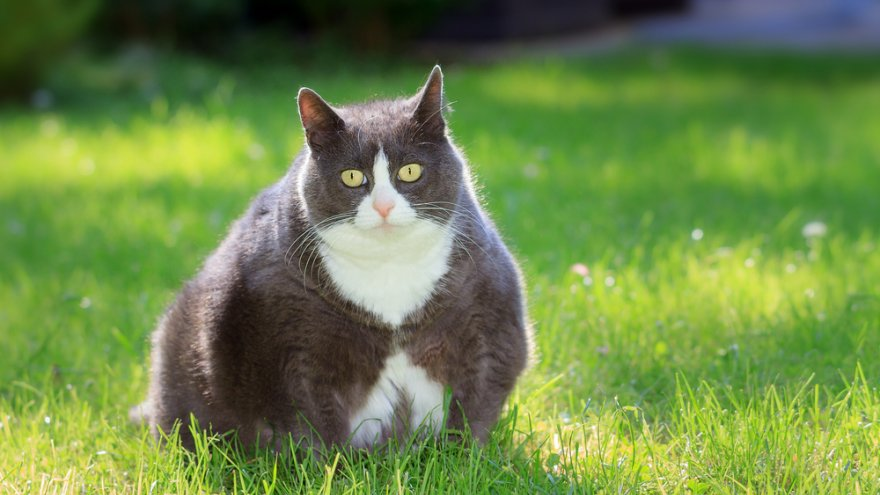

In [63]:
img

In [64]:
pred_class,pred_idx,pred_idx = learn.predict(img)
pred_class

'cat'

# Bonus exercises

_(NB, these are optional exercises!)_


## Bonus exercise 1 (2 bonus points):

<font color='red'> [Stable Diffusion](https://stability.ai/blog/stable-diffusion-announcement) model has been recently shown to produce trully impressive results in image generation. Let's explore some of its power in this auxiliarly exercise. Use Stable Diffusion model from this [colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb?hl=en). Generate several tricky images to test the model you trained in the exercise 3. Report the images that you have generated with Stable Diffusion, prompt that you have used for generating them, the number of iterations that you used to generate images and the classification results from your CNN model. Shortly summarise the results you have obtained. </font>


## Bonus exercise 2 (2 bonus points):

<font color='red'> [Pytorch](https://pytorch.org/) is another widely used and deeply loved deep learning library. In this task, you will get a chance to try it out. Firstly, re-implement one of the CNNs you were working with in EX 2 (or you can try a different architecture) in Pytorch. Train and validate the model on the dataset you collected in EX3. Secondly, use a ResNet model from [torchhub](https://pytorch.org/docs/stable/hub.html) and train it on the same data. Compare the results of these two models and the one from fastai library.


# Comments (optional feedback to the course instructors)

Here, please, leave your comments regarding the homework, possibly answering the following questions:

-   how much time did you spend on this homework?
-   was it too hard/easy for you?
-   what would you suggest to add or remove?
-   anything else you would like to tell us


Your comments:


# <font color='red'> End of the homework. Please don't delete this cell.</font>
